<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px"
height="250px">


 # <center> **01. Python review!** </center>




##  **Outline**
1. [**Librerias**](#eje1)
2. [**Importación de datos**](#eje2)
3. [**Relación masa-radio para cada E.O.S y respectivo ajuste**](#eje3)
4. [**rcontact/risco**](#eje4)
5. [**rcontact/rms**](#eje5)
5. [**risco/rms**](#eje6)

## Librerias  <a name="eje1"></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as sci
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

## Importación de datos <a name="eje2"></a>
### Los subíndices no dan cuenta de la estrella sino de la E.O.S

In [ ]:
# %%

#datos1 = np.loadtxt("MassRadius_TM1L.dat")
#datos2= np.loadtxt("MassRadius_NL3L.dat")
#datos3= np.loadtxt("MassRadius_GM1L.dat")
#m1 = datos1[:, 1]*(2*(10**30)) #en kg
#m2 = datos2[:, 1]*(2*(10**30)) #en kg
#m3 = datos3[:, 1]*(2*(10**30)) #en kg
#r1 = datos1[:, 0]*(10**3) # en metros
#r2 = datos2[:, 0]*(10**3) # en metros
#r3 = datos3[:, 0]*(10**3) # en metros

datos1 = np.loadtxt("StaticSeq_eL3wr_AllnpT0.txt")
datos2= np.loadtxt("StaticSeq_NL3wr_Allnp.txt")
datos3= np.loadtxt("MassRadius_TM1L.dat")
m1 = datos1[:, 1]*(2*(10**30)) #en kg
m2 = datos2[:, 1]*(2*(10**30)) #en kg
m3 = datos3[:, 1]*(2*(10**30)) #en kg
r1 = datos1[:, 3]*(10**3) # en metros
r2 = datos2[:, 3]*(10**3) # en metros
r3 = datos3[:, 0]*(10**3) # en metros
print(m1.min()/(2*10**30), m1.max()/(2*10**30), m2.min()/(2*10**30), m2.max()/(2*10**30), m3.min()/(2*10**30), m3.max()/(2*10**30))
print('m2 tiene el mínimo de los mínimos y el máximo de los máximos')

0.3294558 2.303669 0.3289216 2.756302 0.54902051 2.199386179
m2 tiene el mínimo de los mínimos y el máximo de los máximos


## Relación masa radio para cada E.O.S y ajuste <a name="eje3"></a>

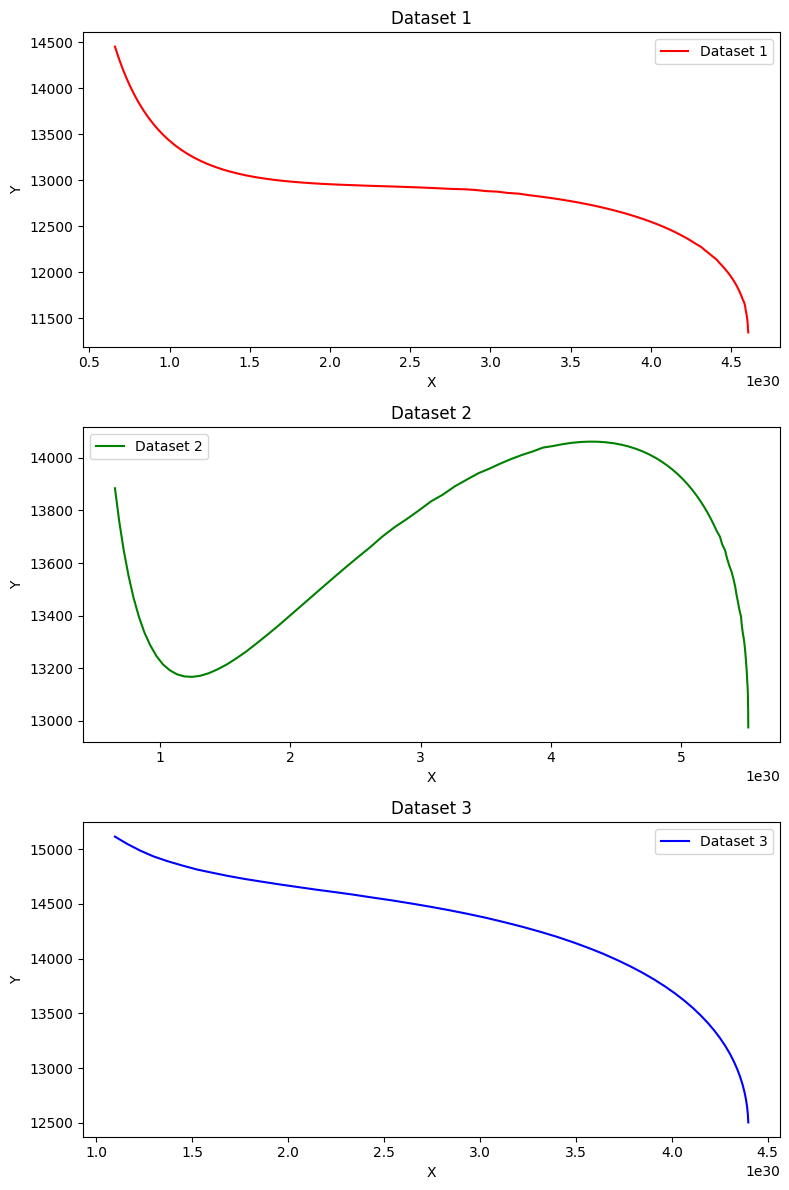

In [ ]:
# masa contra radio

# Crear subgráficos
plt.figure(figsize=(8, 12))

# Subplot 1
plt.subplot(3, 1, 1)
plt.plot(m1, r1, 'r-', label='Dataset 1')
plt.title('Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 2
plt.subplot(3, 1, 2)
plt.plot(m2, r2, 'g-', label='Dataset 2')
plt.title('Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 3
plt.subplot(3, 1, 3)
plt.plot(m3, r3, 'b-', label='Dataset 3')
plt.title('Dataset 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
# AJUSTAMOS PARA TENER LA RELACIÓN MASA-RADIO PARA CADA ECUACIÓN DE ESTADO

def func(x, a, b, c, d, e, f):
    return f*(x**5)+ a*(x**4) + b*(x**3) + c*(x**2) +d*x +e

popt1, pcov1 = curve_fit(func, m1, r1)
popt1

popt2, pcov2 = curve_fit(func, m2, r2)
popt2

popt3, pcov3 = curve_fit(func, m3, r3)
popt3

#print(np.corrcoef(m1,r1))
print(popt1)
###############################
############################### (este es otro método)
# Interpolación
f1 = interp1d(m1, r1, fill_value="extrapolate")
f2 = interp1d(m2, r2, fill_value="extrapolate")
f3 = interp1d(m3, r3, fill_value="extrapolate")

# Masa para los ajustes
m_fit1 = np.linspace(m1.min(), m1.max(), 1000)
m_fit2 = np.linspace(m2.min(), m2.max(), 1000)
m_fit3 = np.linspace(m3.min(), m3.max(), 1000)

# Radio ajustado
r_fit1 = f1(m_fit1)
r_fit2 = f2(m_fit2)
r_fit3 = f3(m_fit3)

[ 8.88875000e-118 -4.66717564e-087  1.18748931e-056 -1.46917327e-026
  2.00978490e+004 -6.59968399e-149]


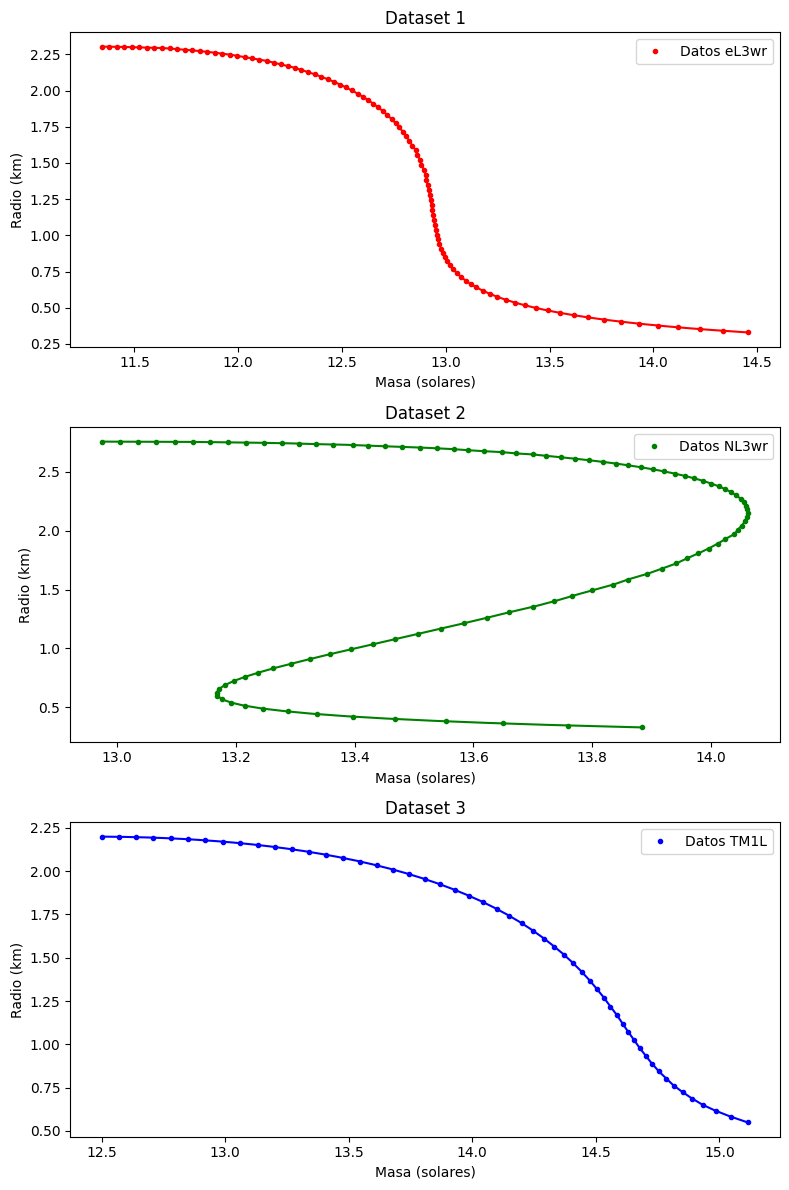

In [ ]:
# Gráficos
plt.figure(figsize=(8, 12))

# Dataset 1
plt.subplot(3, 1, 1)
plt.plot(r1*(10**-3), m1/(2*10**30), 'r.', label='Datos eL3wr')
plt.plot(r_fit1*(10**-3), m_fit1/(2*10**30),  'r-')
plt.title('Dataset 1')
plt.xlabel('Masa (solares)')
plt.ylabel('Radio (km)')
plt.legend()

# Dataset 2
plt.subplot(3, 1, 2)
plt.plot(r2*(10**-3), m2/(2*10**30), 'g.', label='Datos NL3wr')
plt.plot(r_fit2*(10**-3), m_fit2/(2*10**30),  'g-')
plt.title('Dataset 2')
plt.xlabel('Masa (solares)')
plt.ylabel('Radio (km)')
plt.legend()

# Dataset 3
plt.subplot(3, 1, 3)
plt.plot( r3*(10**-3), m3/(2*10**30), 'b.', label='Datos TM1L')
plt.plot(r_fit3*(10**-3), m_fit3/(2*10**30),  'b-')
plt.title('Dataset 3')
plt.xlabel('Masa (solares)')
plt.ylabel('Radio (km)')
plt.legend()

plt.tight_layout()
plt.show()

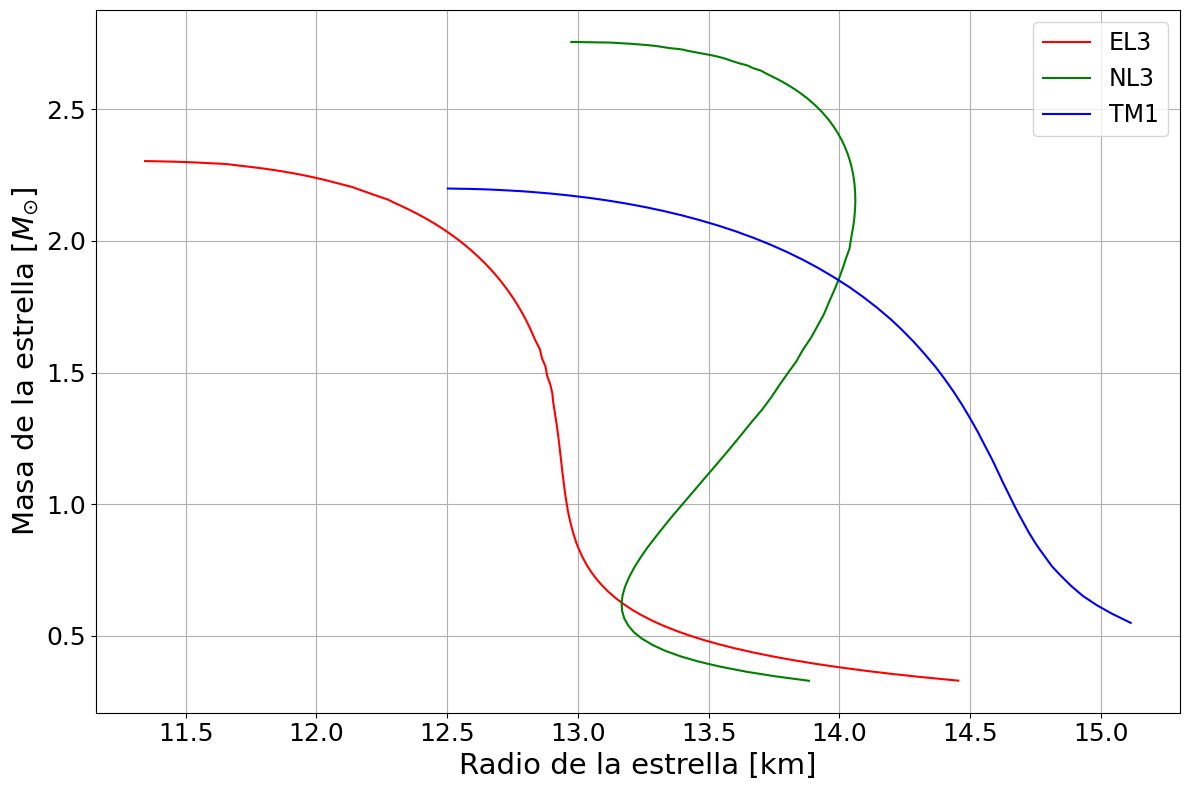

In [ ]:
# Crear la figura
plt.figure(figsize=(12, 8))

# Dataset 1
#plt.plot(r1 * (10**-3), m1 / (2 * 10**30),  'r', label='EL3')
plt.plot( r_fit1 * (10**-3), m_fit1 / (2 * 10**30), 'r-', label='EL3')

# Dataset 2
#plt.plot( r2 * (10**-3), m2 / (2 * 10**30), 'g', label='NL3')
plt.plot( r_fit2 * (10**-3), m_fit2 / (2 * 10**30), 'g-', label='NL3')

# Dataset 3
#plt.plot(r3 * (10**-3), m3 / (2 * 10**30),  'b', label='TM1')
plt.plot( r_fit3 * (10**-3), m_fit3 / (2 * 10**30), 'b-', label='TM1')

# Añadir título y etiquetas
#plt.title('Relación masa-radio de las tres ecuaciones de estado',size=23)
plt.xlabel('Radio de la estrella [km]',size=21)
plt.ylabel('Masa de la estrella [$M_{\odot}$]',size=21)
plt.legend(fontsize=17)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_masa_radio.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()


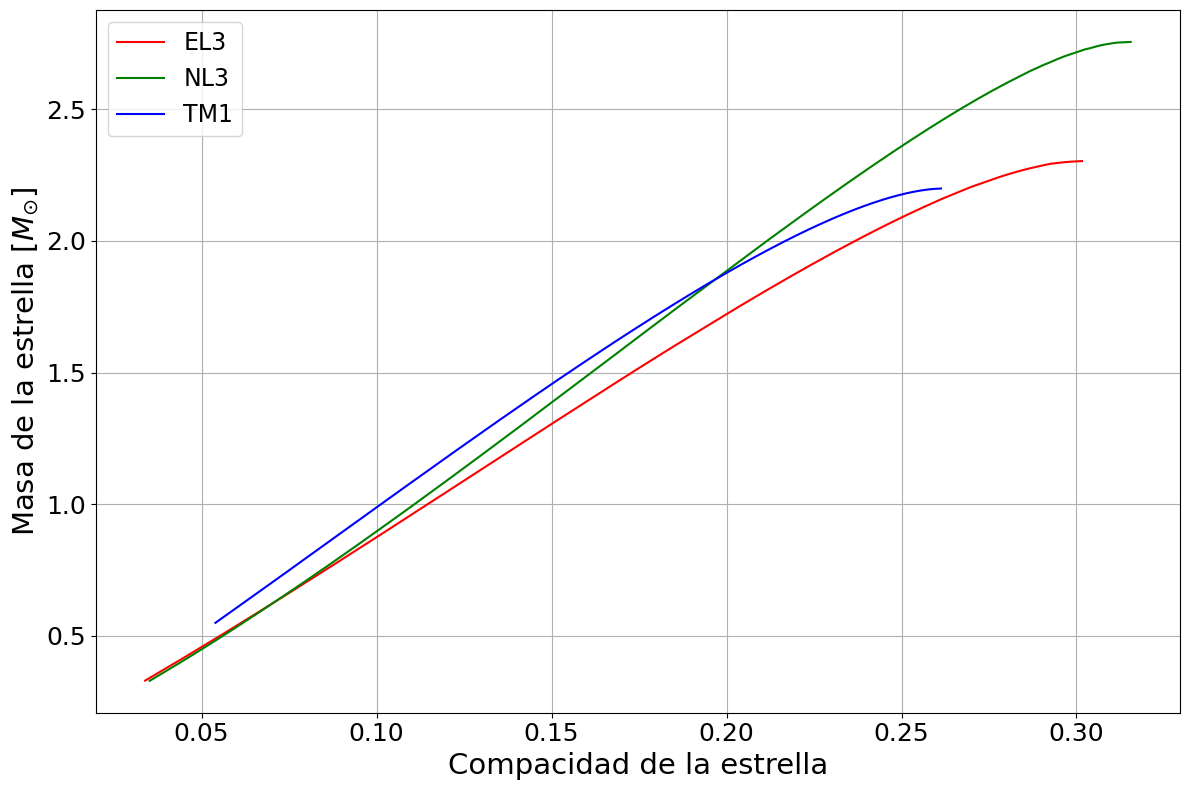

In [ ]:
C1111=sci.G*m_fit1/(((sci.c)**2)*r_fit1)
C2222=sci.G*m_fit2/(((sci.c)**2)*r_fit2)
C3333=sci.G*m_fit3/(((sci.c)**2)*r_fit3)

# Crear la figura
plt.figure(figsize=(12, 8))

# Dataset 1
#plt.plot(r1 * (10**-3), m1 / (2 * 10**30),  'r', label='EL3')
plt.plot( C1111, m_fit1 / (2 * 10**30), 'r-', label='EL3')

# Dataset 2
#plt.plot( r2 * (10**-3), m2 / (2 * 10**30), 'g', label='NL3')
plt.plot( C2222, m_fit2 / (2 * 10**30), 'g-', label='NL3')

# Dataset 3
#plt.plot(r3 * (10**-3), m3 / (2 * 10**30),  'b', label='TM1')
plt.plot( C3333, m_fit3 / (2 * 10**30), 'b-', label='TM1')

# Añadir título y etiquetas
#plt.title('Relación masa-radio de las tres ecuaciones de estado',size=23)
plt.xlabel('Compacidad de la estrella',size=21)
plt.ylabel('Masa de la estrella [$M_{\odot}$]',size=21)
plt.legend(fontsize=17)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_masa_compacidad.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()

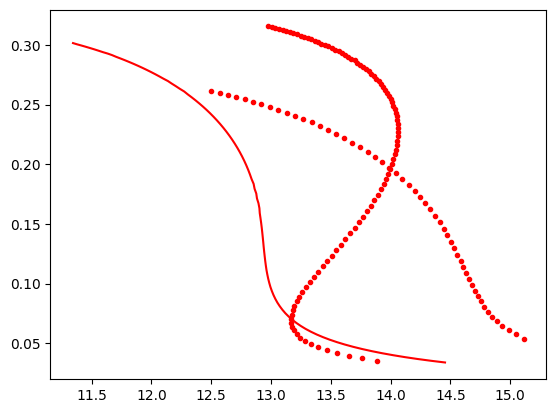

In [ ]:
q1=sci.G*(m1)/((sci.c**2)*(r1))
q2=sci.G*(m2)/((sci.c**2)*(r2))
q3=sci.G*(m3)/((sci.c**2)*(r3))


plt.plot(r1 * (10**-3),q1,  'r-', label='EL3')
plt.plot(r2 * (10**-3),q2,  'r.', label='NL3')
plt.plot(r3 * (10**-3),q3,  'r.', label='TM1')
#plt.plot( r_fit1 * (10**-3), m_fit1 / (2 * 10**30), 'r-')

In [ ]:
R=sci.G*(2.48*2*10**30)/((sci.c**2)*0.32)
R

11510.54841713393

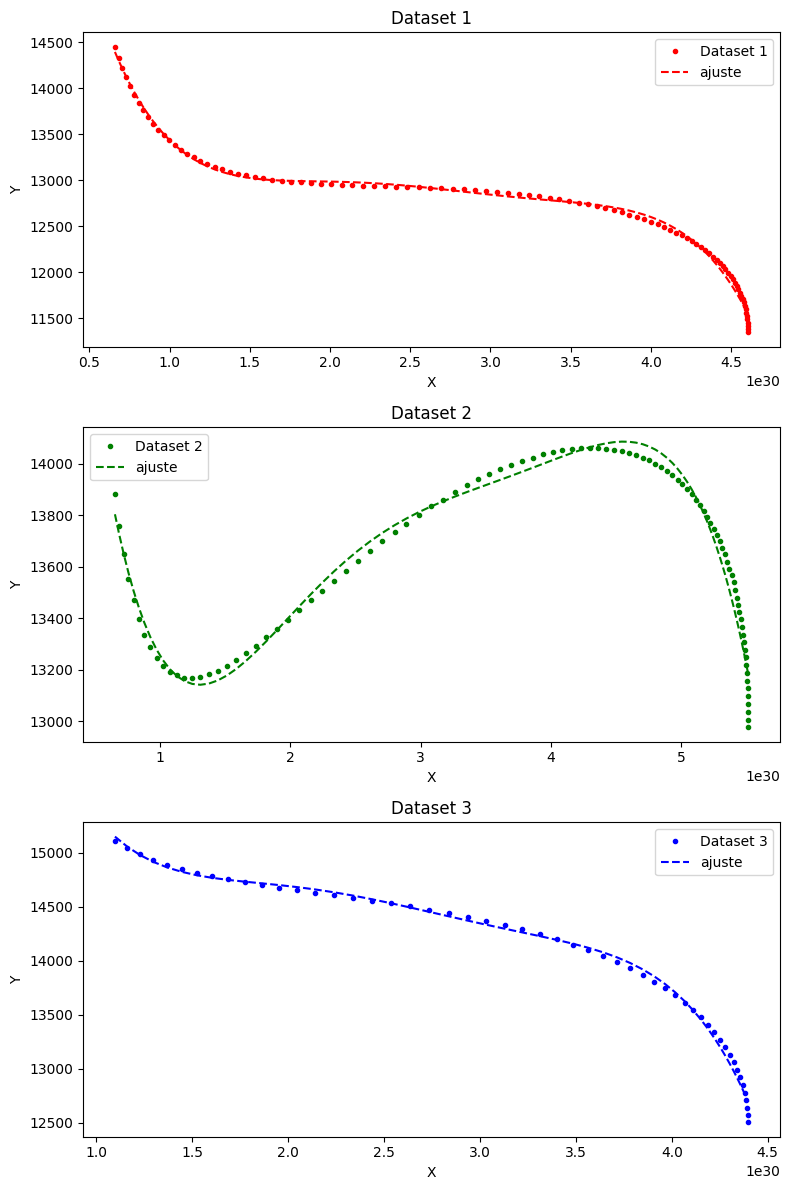

In [ ]:
# VERIFICAMOS EL AJUSTE

# masa contra radio

# Crear subgráficos
plt.figure(figsize=(8, 12))

# Subplot 1
plt.subplot(3, 1, 1)
plt.plot(m1, r1, 'r.', label='Dataset 1')
plt.plot(m1, func(m1, *popt1), 'r--', label='ajuste')
plt.title('Dataset 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 2
plt.subplot(3, 1, 2)
plt.plot(m2, r2, 'g.', label='Dataset 2')
plt.plot(m2, func(m2, *popt2), 'g--', label='ajuste')
plt.title('Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Subplot 3
plt.subplot(3, 1, 3)
plt.plot(m3, r3, 'b.', label='Dataset 3')
plt.plot(m3, func(m3, *popt3), 'b--', label='ajuste')
plt.title('Dataset 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## Redefinimos el set de datos m1, m2, y m3 para que cuando se necesite m12, m22 y m32 no se tenga que usar la función de ajuste en datos extrapolados sino en datos interpolados

### Importante: Cada vez que haya que llamar de nuevo a los datos tras alguna modificación, se deberá emplear todo este bloque de código

In [ ]:
datos1 = np.loadtxt("StaticSeq_eL3wr_AllnpT0.txt")
datos2= np.loadtxt("StaticSeq_NL3wr_Allnp.txt")
datos3= np.loadtxt("MassRadius_TM1L.dat")
m1 = datos1[:, 1]*(2*(10**30)) #en kg
m2 = datos2[:, 1]*(2*(10**30)) #en kg
m3 = datos3[:, 1]*(2*(10**30)) #en kg
r1 = datos1[:, 3]*(10**3) # en metros
r2 = datos2[:, 3]*(10**3) # en metros
r3 = datos3[:, 0]*(10**3) # en metros

# Función para encontrar el índice del valor más cercano
def find_closest_index(array, value):
    return (np.abs(array - value)).argmin()

# Calcular los valores objetivo
target_m1 = m1.min() / 0.4
target_m2 = m2.min() / 0.4
target_m3 = m3.min() / 0.4

# Encontrar los índices del valor más cercano en m1, m2 y m3
closest_index_m1 = find_closest_index(m1, target_m1)
closest_index_m2 = find_closest_index(m2, target_m2)
closest_index_m3 = find_closest_index(m3, target_m3)

# Ajustar m1, m2 y m3 para que comiencen desde el valor más cercano a sus respectivos objetivos
m1 = m1[closest_index_m1:]
m2 = m2[closest_index_m2:]
m3 = m3[closest_index_m3:]

# Ajustar r1, r2 y r3 de acuerdo a los mismos índices
r1 = r1[closest_index_m1:]
r2 = r2[closest_index_m2:]
r3 = r3[closest_index_m3:]

print("Valor objetivo m1:", target_m1)
print("Índice del valor más cercano en m1:", closest_index_m1)
#print("m1 ajustado:", m1)

print("Valor objetivo m2:", target_m2)
print("Índice del valor más cercano en m2:", closest_index_m2)
#print("m2 ajustado:", m2)

print("Valor objetivo m3:", target_m3)
print("Índice del valor más cercano en m3:", closest_index_m3)
#print("m3 ajustado:", m3)

Valor objetivo m1: 1.6472790000000002e+30
Índice del valor más cercano en m1: 26
Valor objetivo m2: 1.6446079999999997e+30
Índice del valor más cercano en m2: 19
Valor objetivo m3: 2.7451025499999994e+30
Índice del valor más cercano en m3: 19


## rcont/risco <a name="eje4"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [ ]:
# rcont/risco q=1 funcion de la masa total

g1=((sci.c)**2)*r1/(2*m1) * (1/(3*sci.G))
g2=((sci.c)**2)*r2/(2*m2) * (1/(3*sci.G))
g3=((sci.c)**2)*r3/(2*m3) * (1/(3*sci.G))

# rcont/risco q=0.8 funcion de la masa total

def C2(m1):
    #r12=func(0.8*m1, *popt1)
    r12=f1(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

h1=(C2(m1)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.8*m1, *popt2)
    r12=f2(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

h2=(C2(m2)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.8*m1, *popt3)
    r12=f3(np.array(0.8*m1,dtype=np.float64))
    C2=sci.G*(0.8*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

h3=(C2(m3)+ 0.8*C1)/(6*(1+0.8)*C1*C2(m3))
#############################################

# rcont/risco q=0.6 funcion de la masa total

def C2(m1):
    #r12=func(0.6*m1, *popt1)
    r12=f1(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

I1=(C2(m1)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.6*m1, *popt2)
    r12=f2(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

I2=(C2(m2)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.6*m1, *popt3)
    r12=f3(np.array(0.6*m1,dtype=np.float64))
    C2=sci.G*(0.6*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

I3=(C2(m3)+ 0.6*C1)/(6*(1+0.6)*C1*C2(m3))
#############################################

# rcont/risco q=0.4, funcion de la masa total

def C2(m1):
    #r12=func(0.4*m1, *popt1)
    r12=f1(np.array(0.4*m1,dtype=np.float64))
    C2=sci.G*(0.4*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m1/(((sci.c)**2)*r1)

J1=(C2(m1)+ 0.4*C1)/(6*(1+0.4)*C1*C2(m1))
#########################################
def C2(m1):
    #r12=func(0.4*m1, *popt2)
    r12=f2(np.array(0.4*m1,dtype=np.float64))
    C2=sci.G*(0.4*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m2/(((sci.c)**2)*r2)

J2=(C2(m2)+ 0.4*C1)/(6*(1+0.4)*C1*C2(m2))
#############################################
def C2(m1):
    #r12=func(0.4*m1, *popt3)
    r12=f3(np.array(0.4*m1,dtype=np.float64))
    C2=sci.G*(0.4*m1)/(((sci.c)**2)*r12)
    return C2

C1=sci.G*m3/(((sci.c)**2)*r3)

J3=(C2(m3)+ 0.4*C1)/(6*(1+0.4)*C1*C2(m3))
#############################################

# rcont/risco q=0.45 funcion de la masa total
def C2(m1):
    # r12=func(0.45*m1, *popt1)
    r12 = f1(np.array(0.45 * m1, dtype=np.float64))
    C2 = sci.G * (0.45 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

K1 = (C2(m1) + 0.45 * C1) / (6 * (1 + 0.45) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.45*m1, *popt2)
    r12 = f2(np.array(0.45 * m1, dtype=np.float64))
    C2 = sci.G * (0.45 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

K2 = (C2(m2) + 0.45 * C1) / (6 * (1 + 0.45) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.45*m1, *popt3)
    r12 = f3(np.array(0.45 * m1, dtype=np.float64))
    C2 = sci.G * (0.45 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

K3 = (C2(m3) + 0.45 * C1) / (6 * (1 + 0.45) * C1 * C2(m3))
#############################################

# rcont/risco q=0.5 funcion de la masa total
def C2(m1):
    # r12=func(0.5*m1, *popt1)
    r12 = f1(np.array(0.5 * m1, dtype=np.float64))
    C2 = sci.G * (0.5 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

L1 = (C2(m1) + 0.5 * C1) / (6 * (1 + 0.5) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.5*m1, *popt2)
    r12 = f2(np.array(0.5 * m1, dtype=np.float64))
    C2 = sci.G * (0.5 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

L2 = (C2(m2) + 0.5 * C1) / (6 * (1 + 0.5) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.5*m1, *popt3)
    r12 = f3(np.array(0.5 * m1, dtype=np.float64))
    C2 = sci.G * (0.5 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

L3 = (C2(m3) + 0.5 * C1) / (6 * (1 + 0.5) * C1 * C2(m3))
#############################################

# rcont/risco q=0.55 funcion de la masa total
def C2(m1):
    # r12=func(0.55*m1, *popt1)
    r12 = f1(np.array(0.55 * m1, dtype=np.float64))
    C2 = sci.G * (0.55 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

M1 = (C2(m1) + 0.55 * C1) / (6 * (1 + 0.55) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.55*m1, *popt2)
    r12 = f2(np.array(0.55 * m1, dtype=np.float64))
    C2 = sci.G * (0.55 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

M2 = (C2(m2) + 0.55 * C1) / (6 * (1 + 0.55) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.55*m1, *popt3)
    r12 = f3(np.array(0.55 * m1, dtype=np.float64))
    C2 = sci.G * (0.55 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

M3 = (C2(m3) + 0.55 * C1) / (6 * (1 + 0.55) * C1 * C2(m3))
#############################################

# rcont/risco q=0.65 funcion de la masa total
def C2(m1):
    # r12=func(0.65*m1, *popt1)
    r12 = f1(np.array(0.65 * m1, dtype=np.float64))
    C2 = sci.G * (0.65 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

N1 = (C2(m1) + 0.65 * C1) / (6 * (1 + 0.65) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.65*m1, *popt2)
    r12 = f2(np.array(0.65 * m1, dtype=np.float64))
    C2 = sci.G * (0.65 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

N2 = (C2(m2) + 0.65 * C1) / (6 * (1 + 0.65) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.65*m1, *popt3)
    r12 = f3(np.array(0.65 * m1, dtype=np.float64))
    C2 = sci.G * (0.65 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

N3 = (C2(m3) + 0.65 * C1) / (6 * (1 + 0.65) * C1 * C2(m3))
#############################################

# rcont/risco q=0.7 funcion de la masa total
def C2(m1):
    # r12=func(0.7*m1, *popt1)
    r12 = f1(np.array(0.7 * m1, dtype=np.float64))
    C2 = sci.G * (0.7 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

O1 = (C2(m1) + 0.7 * C1) / (6 * (1 + 0.7) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.7*m1, *popt2)
    r12 = f2(np.array(0.7 * m1, dtype=np.float64))
    C2 = sci.G * (0.7 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

O2 = (C2(m2) + 0.7 * C1) / (6 * (1 + 0.7) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.7*m1, *popt3)
    r12 = f3(np.array(0.7 * m1, dtype=np.float64))
    C2 = sci.G * (0.7 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

O3 = (C2(m3) + 0.7 * C1) / (6 * (1 + 0.7) * C1 * C2(m3))
#############################################

# rcont/risco q=0.75 funcion de la masa total
def C2(m1):
    # r12=func(0.75*m1, *popt1)
    r12 = f1(np.array(0.75 * m1, dtype=np.float64))
    C2 = sci.G * (0.75 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

P1 = (C2(m1) + 0.75 * C1) / (6 * (1 + 0.75) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.75*m1, *popt2)
    r12 = f2(np.array(0.75 * m1, dtype=np.float64))
    C2 = sci.G * (0.75 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

P2 = (C2(m2) + 0.75 * C1) / (6 * (1 + 0.75) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.75*m1, *popt3)
    r12 = f3(np.array(0.75 * m1, dtype=np.float64))
    C2 = sci.G * (0.75 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

P3 = (C2(m3) + 0.75 * C1) / (6 * (1 + 0.75) * C1 * C2(m3))
#############################################

# rcont/risco q=0.85 funcion de la masa total
def C2(m1):
    # r12=func(0.85*m1, *popt1)
    r12 = f1(np.array(0.85 * m1, dtype=np.float64))
    C2 = sci.G * (0.85 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

Q1 = (C2(m1) + 0.85 * C1) / (6 * (1 + 0.85) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.85*m1, *popt2)
    r12 = f2(np.array(0.85 * m1, dtype=np.float64))
    C2 = sci.G * (0.85 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

Q2 = (C2(m2) + 0.85 * C1) / (6 * (1 + 0.85) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.85*m1, *popt3)
    r12 = f3(np.array(0.85 * m1, dtype=np.float64))
    C2 = sci.G * (0.85 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

Q3 = (C2(m3) + 0.85 * C1) / (6 * (1 + 0.85) * C1 * C2(m3))
#############################################

# rcont/risco q=0.9 funcion de la masa total
def C2(m1):
    # r12=func(0.9*m1, *popt1)
    r12 = f1(np.array(0.9 * m1, dtype=np.float64))
    C2 = sci.G * (0.9 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

R1 = (C2(m1) + 0.9 * C1) / (6 * (1 + 0.9) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.9*m1, *popt2)
    r12 = f2(np.array(0.9 * m1, dtype=np.float64))
    C2 = sci.G * (0.9 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

R2 = (C2(m2) + 0.9 * C1) / (6 * (1 + 0.9) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.9*m1, *popt3)
    r12 = f3(np.array(0.9 * m1, dtype=np.float64))
    C2 = sci.G * (0.9 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

R3 = (C2(m3) + 0.9 * C1) / (6 * (1 + 0.9) * C1 * C2(m3))
#############################################

# rcont/risco q=0.95 funcion de la masa total
def C2(m1):
    # r12=func(0.95*m1, *popt1)
    r12 = f1(np.array(0.95 * m1, dtype=np.float64))
    C2 = sci.G * (0.95 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m1 / (((sci.c) ** 2) * r1)

S1 = (C2(m1) + 0.95 * C1) / (6 * (1 + 0.95) * C1 * C2(m1))
#########################################
def C2(m1):
    # r12=func(0.95*m1, *popt2)
    r12 = f2(np.array(0.95 * m1, dtype=np.float64))
    C2 = sci.G * (0.95 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m2 / (((sci.c) ** 2) * r2)

S2 = (C2(m2) + 0.95 * C1) / (6 * (1 + 0.95) * C1 * C2(m2))
#############################################
def C2(m1):
    # r12=func(0.95*m1, *popt3)
    r12 = f3(np.array(0.95 * m1, dtype=np.float64))
    C2 = sci.G * (0.95 * m1) / (((sci.c) ** 2) * r12)
    return C2

C1 = sci.G * m3 / (((sci.c) ** 2) * r3)

S3 = (C2(m3) + 0.95 * C1) / (6 * (1 + 0.95) * C1 * C2(m3))
#############################################

# Continúa con los bloques correspondientes para q=0.65, 0.7, 0.75, 0.85, 0.9, 0.95...
# Siguiendo el mismo patrón de nomenclatura y código, ajusta q para cada valor y genera K1, K2, K3, etc.


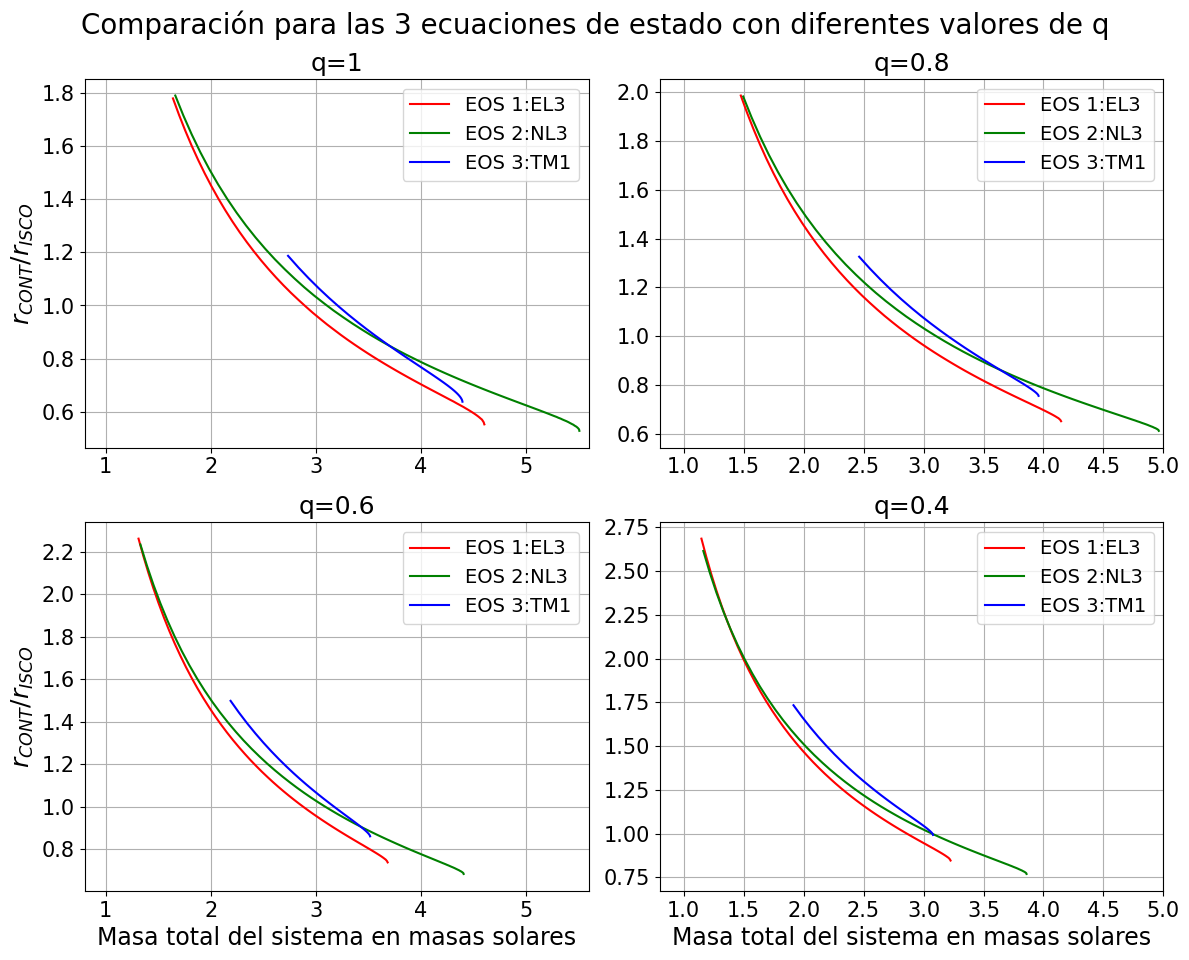

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

plt.suptitle('Comparación para las 3 ecuaciones de estado con diferentes valores de q',
             size=20, y=0.99)
# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), g1, 'r-', label='EOS 1:EL3')
plt.plot(2*m2/(2* 10**30), g2, 'g-', label='EOS 2:NL3')
plt.plot(2*m3/(2* 10**30), g3, 'b-', label='EOS 3:TM1')
plt.title('q=1',size=18)
#plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel(r'$r_{CONT}/r_{ISCO}$',size=18)
plt.legend(fontsize=14)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlim(0.8,5.6)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), h1, 'r-', label='EOS 1:EL3')
plt.plot(1.8*m2/(2* 10**30), h2, 'g-', label='EOS 2:NL3')
plt.plot(1.8*m3/(2* 10**30), h3, 'b-', label='EOS 3:TM1')
plt.title('q=0.8',size=18)
#plt.xlabel('Masa total del sistema en masas solares')
#plt.ylabel('rcont/risco')
plt.legend(fontsize=14)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlim(0.8,5)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.6*m1/(2* 10**30), I1, 'r-', label='EOS 1:EL3')
plt.plot(1.6*m2/(2* 10**30), I2, 'g-', label='EOS 2:NL3')
plt.plot(1.6*m3/(2* 10**30), I3, 'b-', label='EOS 3:TM1')
plt.title('q=0.6',size=18)
plt.xlabel('Masa total del sistema en masas solares',size=17)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$',size=18)
plt.legend(fontsize=14)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlim(0.8,5.6)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.4*m1/(2* 10**30), J1, 'r-', label='EOS 1:EL3')
plt.plot(1.4*m2/(2* 10**30), J2, 'g-', label='EOS 2:NL3')
plt.plot(1.4*m3/(2* 10**30), J3, 'b-', label='EOS 3:TM1')
plt.title('q=0.4',size=18)
plt.xlabel('Masa total del sistema en masas solares',size=17)
#plt.ylabel('rcont/risco')
plt.legend(fontsize=14)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlim(0.8,5)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_comparacion.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()

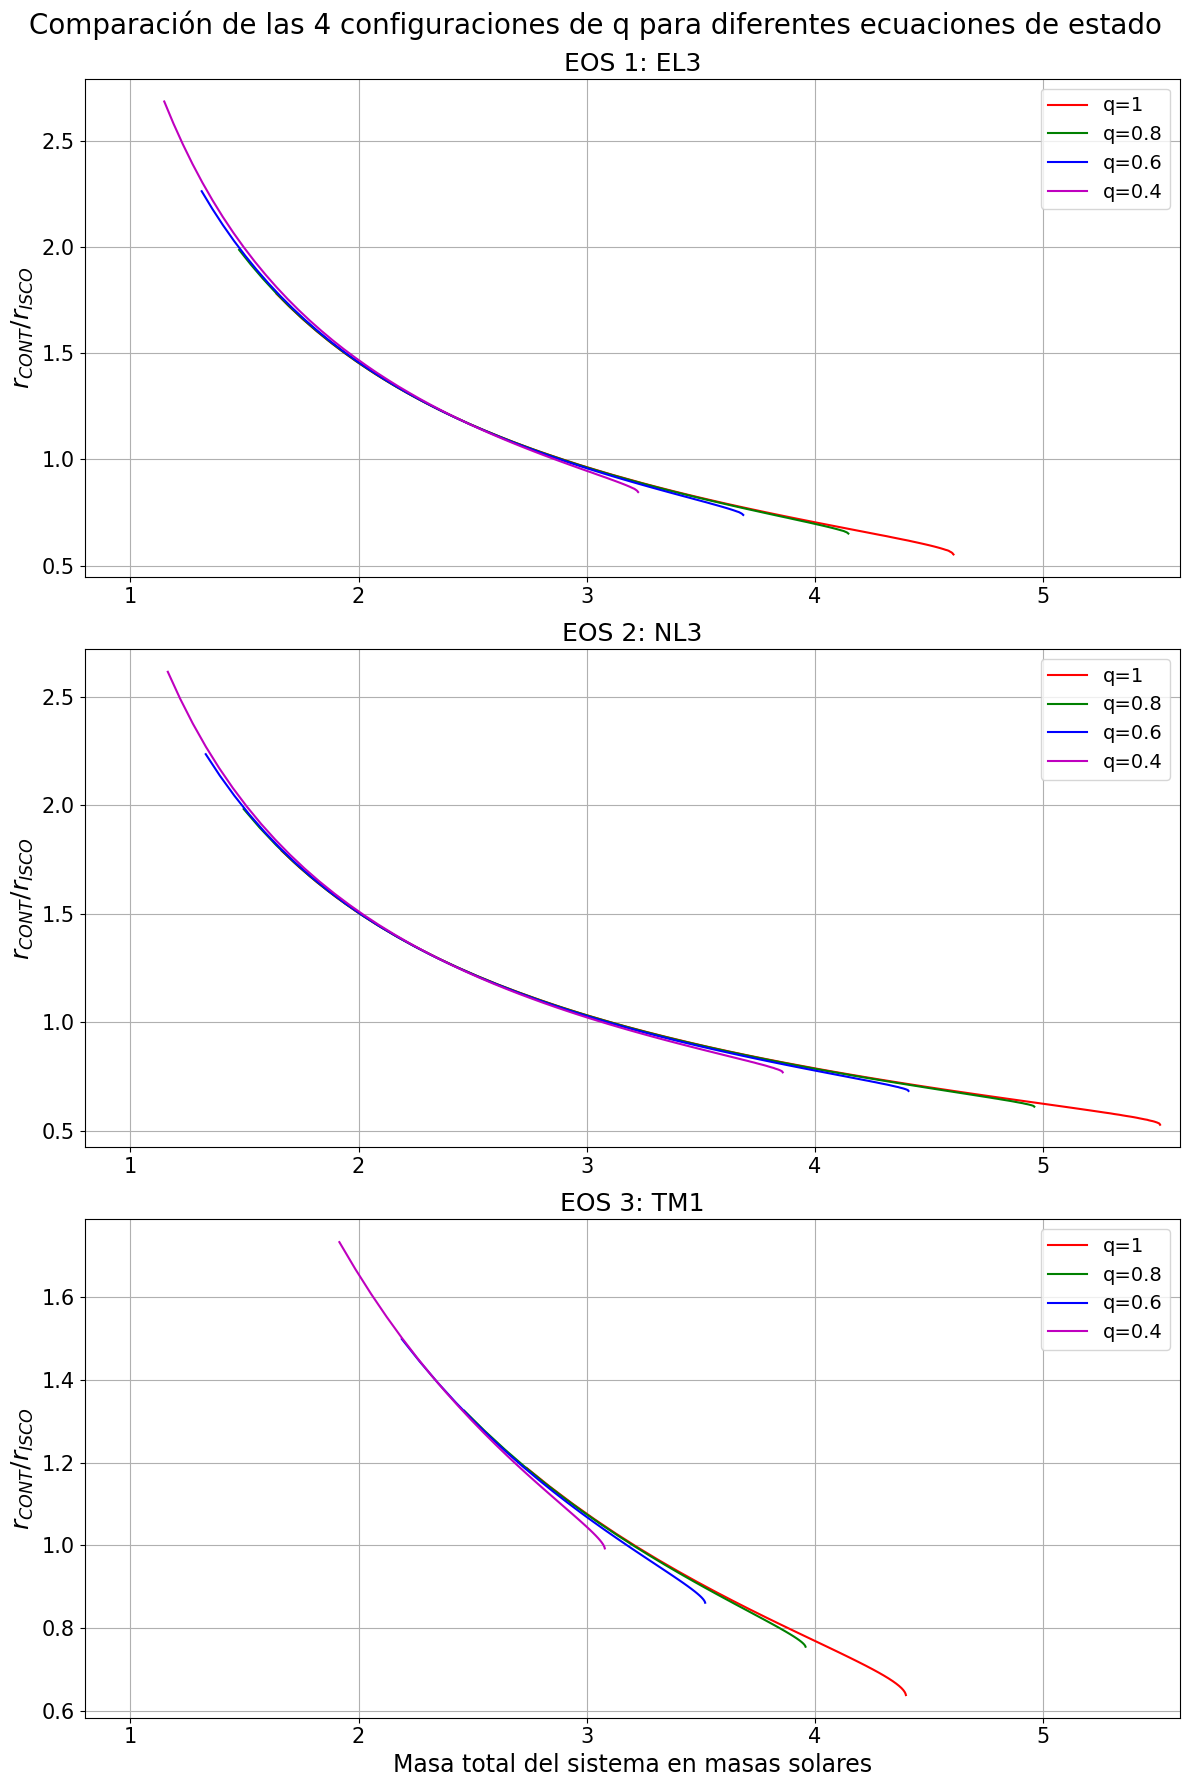

In [ ]:
import matplotlib.pyplot as plt

# Crear subgráficos
plt.figure(figsize=(12, 18))

plt.suptitle('Comparación de las 4 configuraciones de q para diferentes ecuaciones de estado',
             size=20, y=0.99)

# Subplot para EOS 1
plt.subplot(3, 1, 1)
plt.plot(2*m1/(2* 10**30), g1, 'r-', label='q=1')
plt.plot(1.8*m1/(2* 10**30), h1, 'g-', label='q=0.8')
plt.plot(1.6*m1/(2* 10**30), I1, 'b-', label='q=0.6')
plt.plot(1.4*m1/(2* 10**30), J1, 'm-', label='q=0.4')
plt.title('EOS 1: EL3', size=18)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot para EOS 2
plt.subplot(3, 1, 2)
plt.plot(2*m2/(2* 10**30), g2, 'r-', label='q=1')
plt.plot(1.8*m2/(2* 10**30), h2, 'g-', label='q=0.8')
plt.plot(1.6*m2/(2* 10**30), I2, 'b-', label='q=0.6')
plt.plot(1.4*m2/(2* 10**30), J2, 'm-', label='q=0.4')
plt.title('EOS 2: NL3', size=18)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot para EOS 3
plt.subplot(3, 1, 3)
plt.plot(2*m3/(2* 10**30), g3, 'r-', label='q=1')
plt.plot(1.8*m3/(2* 10**30), h3, 'g-', label='q=0.8')
plt.plot(1.6*m3/(2* 10**30), I3, 'b-', label='q=0.6')
plt.plot(1.4*m3/(2* 10**30), J3, 'm-', label='q=0.4')
plt.title('EOS 3: TM1', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_comparacion_reorganizada.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()


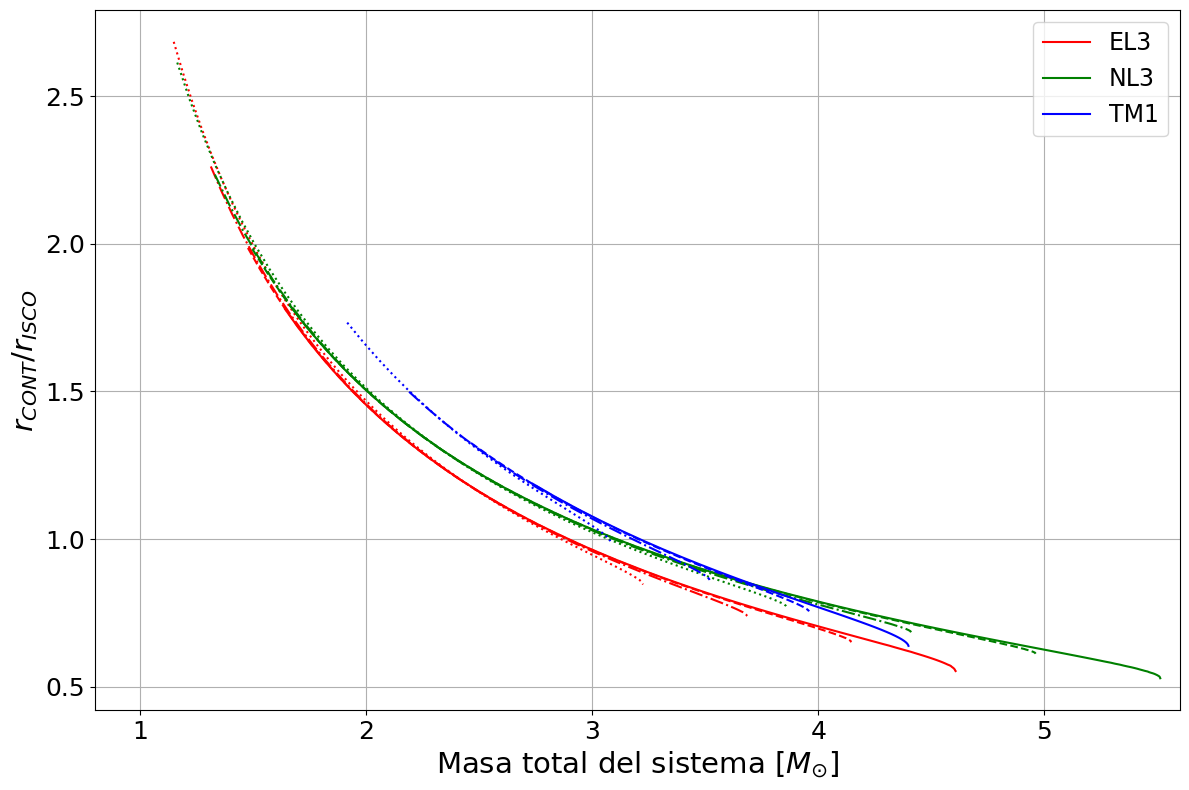

In [ ]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(12, 8))
#plt.title('Comparación entre $r_{CONT}$ y $r_{ISCO}$ para distintas configuraciones de binarias', size=23)

# Curvas para EOS 1 (EL3)
plt.plot(2*m1/(2*10**30), g1, 'r-', label='EL3')
plt.plot(1.8*m1/(2*10**30), h1, 'r--')  # q=0.8
plt.plot(1.6*m1/(2*10**30), I1, 'r-.')  # q=0.6
plt.plot(1.4*m1/(2*10**30), J1, 'r:')   # q=0.4

# Curvas para EOS 2 (NL3)
plt.plot(2*m2/(2*10**30), g2, 'g-', label='NL3')
plt.plot(1.8*m2/(2*10**30), h2, 'g--')  # q=0.8
plt.plot(1.6*m2/(2*10**30), I2, 'g-.')  # q=0.6
plt.plot(1.4*m2/(2*10**30), J2, 'g:')   # q=0.4

# Curvas para EOS 3 (TM1)
plt.plot(2*m3/(2*10**30), g3, 'b-', label='TM1')
plt.plot(1.8*m3/(2*10**30), h3, 'b--')  # q=0.8
plt.plot(1.6*m3/(2*10**30), I3, 'b-.')  # q=0.6
plt.plot(1.4*m3/(2*10**30), J3, 'b:')   # q=0.4

# Etiquetas y personalización
plt.xlabel('Masa total del sistema [$M_{\odot}$]', size=21)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$', size=21)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlim(0.8, 5.6)
plt.grid()
plt.legend(fontsize=17)

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafica_todas_curvas_juntas.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()


## rcont/rms <a name="eje5"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [ ]:
##############################################
# rcont/rms q=0.9 funcion de la masa total
##############################################

q=0.9

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))

    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

gg1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

gg2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

gg3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.8 funcion de la masa total
##############################################

q=0.8

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

hh1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

hh2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

hh3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.6 funcion de la masa total
##############################################

q=0.6

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

II1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

II2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

II3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)

##############################################
# rcont/rms q=0.4 funcion de la masa total
##############################################

q=0.4

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m1/(((sci.c)**2)*r1)

JJ1=((C2(m1)+ q*C1)/((1+q)*C1*C2(m1))) * (sci.G*(m1 + q*m1))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def C2(m1):
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m2/(((sci.c)**2)*r2)

JJ2=((C2(m2)+ q*C1)/((1+q)*C1*C2(m2))) * (sci.G*(m2 + q*m2))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)

#############################################

def C2(m1):
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

C1=sci.G*m3/(((sci.c)**2)*r3)

JJ3=((C2(m3)+ q*C1)/((1+q)*C1*C2(m3))) * (sci.G*(m3 + q*m3))/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

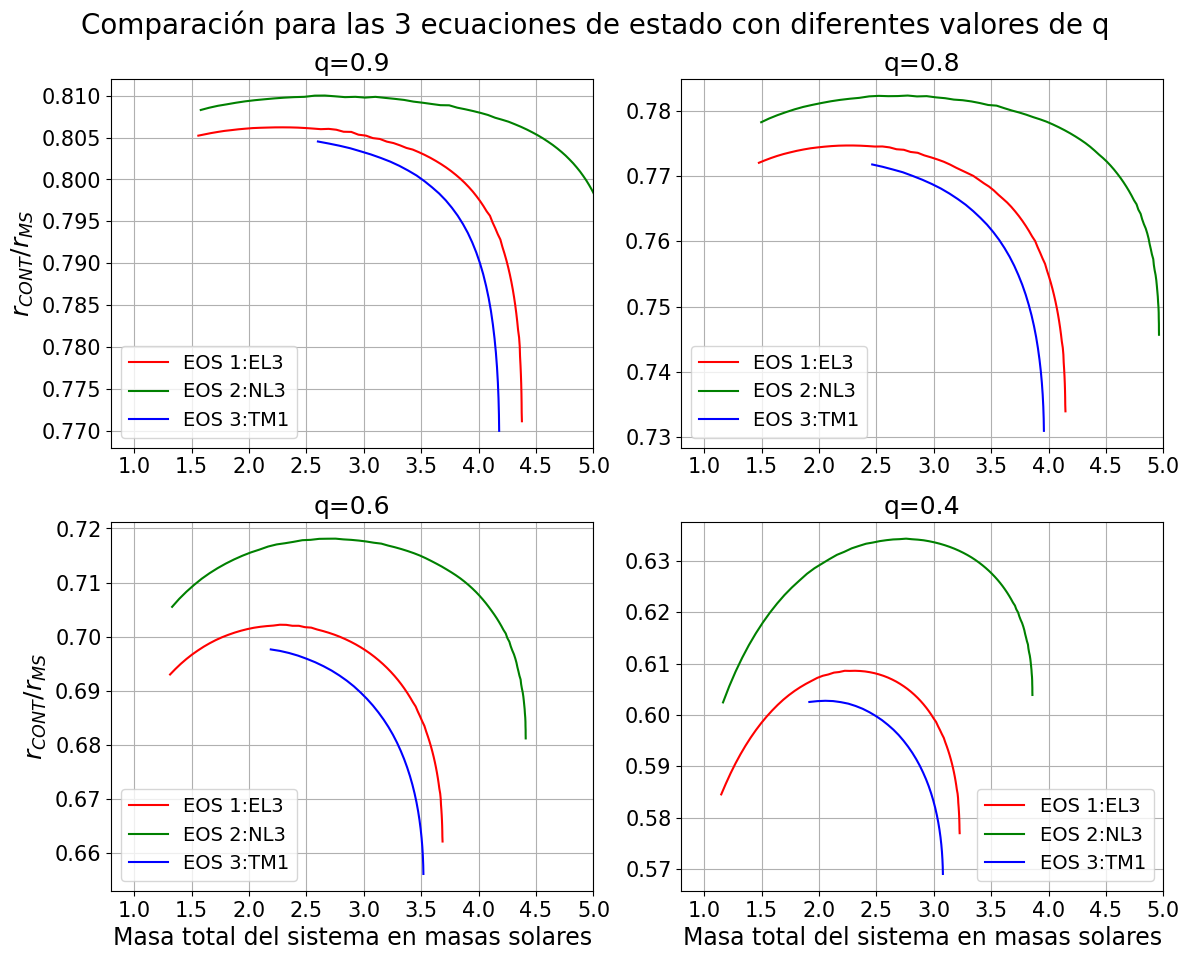

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

plt.suptitle('Comparación para las 3 ecuaciones de estado con diferentes valores de q',
             size=20, y=0.99)

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(1.9*m1/(2* 10**30), gg1, 'r-', label='EOS 1:EL3')
plt.plot(1.9*m2/(2* 10**30), gg2, 'g-', label='EOS 2:NL3')
plt.plot(1.9*m3/(2* 10**30), gg3, 'b-', label='EOS 3:TM1')
plt.title('q=0.9', size=18)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), hh1, 'r-', label='EOS 1:EL3')
plt.plot(1.8*m2/(2* 10**30), hh2, 'g-', label='EOS 2:NL3')
plt.plot(1.8*m3/(2* 10**30), hh3, 'b-', label='EOS 3:TM1')
plt.title('q=0.8', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.6*m1/(2* 10**30), II1, 'r-', label='EOS 1:EL3')
plt.plot(1.6*m2/(2* 10**30), II2, 'g-', label='EOS 2:NL3')
plt.plot(1.6*m3/(2* 10**30), II3, 'b-', label='EOS 3:TM1')
plt.title('q=0.6', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.4*m1/(2* 10**30), JJ1, 'r-', label='EOS 1:EL3')
plt.plot(1.4*m2/(2* 10**30), JJ2, 'g-', label='EOS 2:NL3')
plt.plot(1.4*m3/(2* 10**30), JJ3, 'b-', label='EOS 3:TM1')
plt.title('q=0.4', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_comparacion2.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()


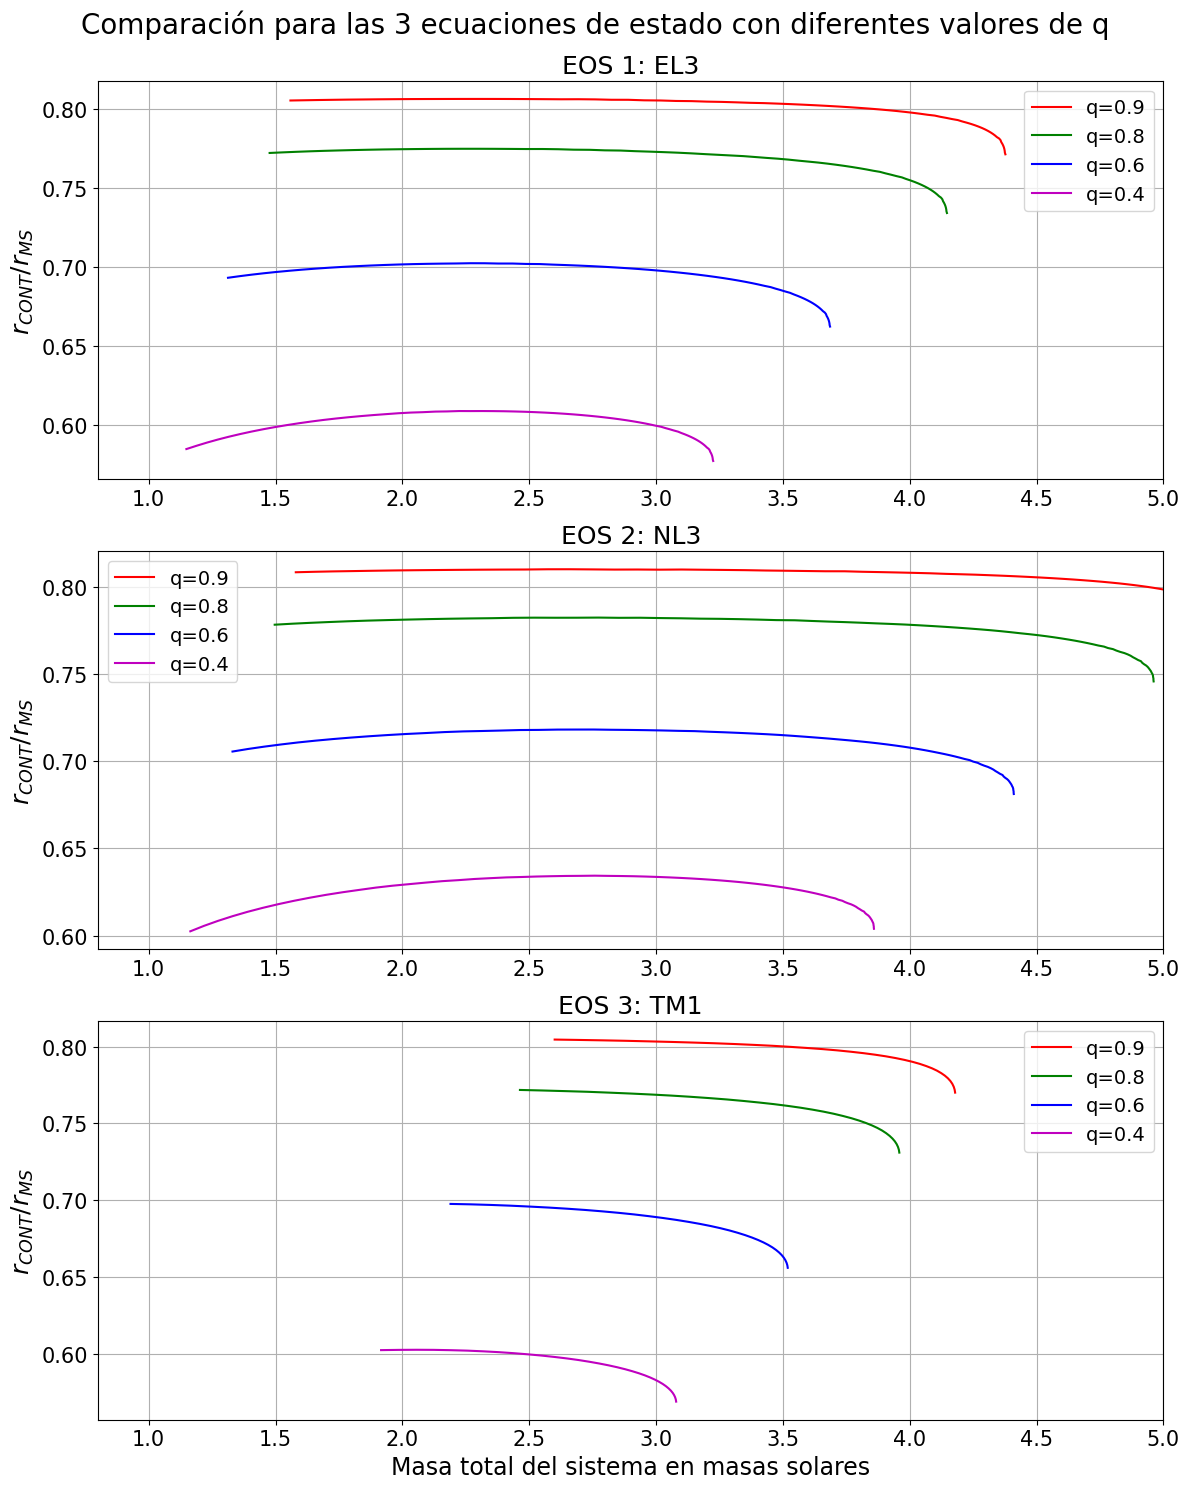

In [ ]:
import matplotlib.pyplot as plt

# Crear subgráficos
plt.figure(figsize=(12, 15))

plt.suptitle('Comparación para las 3 ecuaciones de estado con diferentes valores de q',
             size=20, y=0.99)

# Subplot 1: EOS 1 (EL3)
plt.subplot(3, 1, 1)
plt.plot(1.9*m1/(2*10**30), gg1, 'r-', label='q=0.9')
plt.plot(1.8*m1/(2*10**30), hh1, 'g-', label='q=0.8')
plt.plot(1.6*m1/(2*10**30), II1, 'b-', label='q=0.6')
plt.plot(1.4*m1/(2*10**30), JJ1, 'm-', label='q=0.4')
plt.title('EOS 1: EL3', size=18)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 2: EOS 2 (NL3)
plt.subplot(3, 1, 2)
plt.plot(1.9*m2/(2*10**30), gg2, 'r-', label='q=0.9')
plt.plot(1.8*m2/(2*10**30), hh2, 'g-', label='q=0.8')
plt.plot(1.6*m2/(2*10**30), II2, 'b-', label='q=0.6')
plt.plot(1.4*m2/(2*10**30), JJ2, 'm-', label='q=0.4')
plt.title('EOS 2: NL3', size=18)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 3: EOS 3 (TM1)
plt.subplot(3, 1, 3)
plt.plot(1.9*m3/(2*10**30), gg3, 'r-', label='q=0.9')
plt.plot(1.8*m3/(2*10**30), hh3, 'g-', label='q=0.8')
plt.plot(1.6*m3/(2*10**30), II3, 'b-', label='q=0.6')
plt.plot(1.4*m3/(2*10**30), JJ3, 'm-', label='q=0.4')
plt.title('EOS 3: TM1', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafica_reducida_3.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


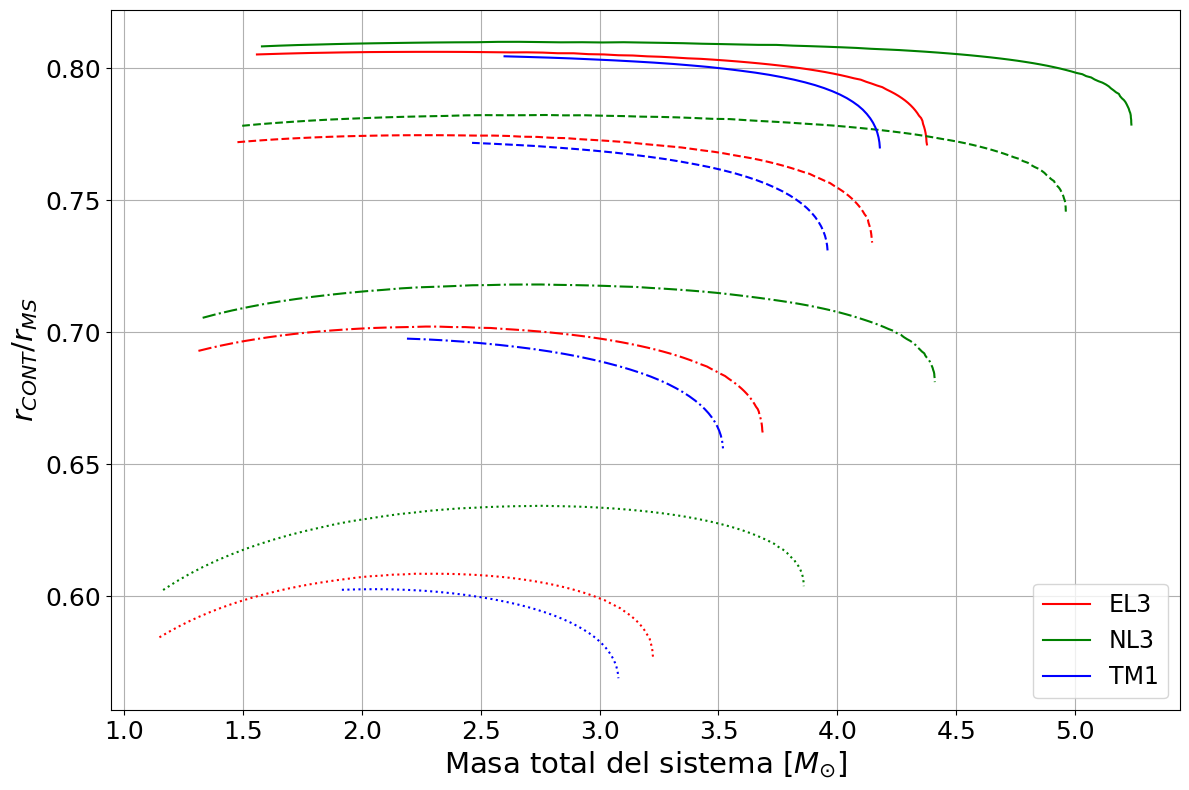

In [ ]:
# Crear la figura
plt.figure(figsize=(12, 8))
#plt.title('Comparación entre $r_{CONT}$ y $r_{MS}$ para distintas configuraciones de binarias', size=23)

# EOS 1 (EL3)
plt.plot(1.9*m1/(2*10**30), gg1, 'r-', label='EL3')
plt.plot(1.8*m1/(2*10**30), hh1, 'r--')
plt.plot(1.6*m1/(2*10**30), II1, 'r-.')
plt.plot(1.4*m1/(2*10**30), JJ1, 'r:')

# EOS 2 (NL3)
plt.plot(1.9*m2/(2*10**30), gg2, 'g-', label='NL3')
plt.plot(1.8*m2/(2*10**30), hh2, 'g--')
plt.plot(1.6*m2/(2*10**30), II2, 'g-.')
plt.plot(1.4*m2/(2*10**30), JJ2, 'g:')

# EOS 3 (TM1)
plt.plot(1.9*m3/(2*10**30), gg3, 'b-', label='TM1')
plt.plot(1.8*m3/(2*10**30), hh3, 'b--')
plt.plot(1.6*m3/(2*10**30), II3, 'b-.')
plt.plot(1.4*m3/(2*10**30), JJ3, 'b:')

# Etiquetas y personalización
plt.xlabel('Masa total del sistema [$M_{\odot}$]', size=21)
plt.ylabel(r'$r_{CONT}/r_{MS}$', size=21)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.xlim(0.8, 5)
plt.grid()
plt.legend(fontsize=17)  # Leyendas solo para las EOS

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafica_rcont_rms.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


## risco/rms <a name="eje6"></a>
### Recordar que por cada "q" hay 3 ecuaciones de estado

In [ ]:
##############################################
# risco/rms q=0.9 funcion de la masa total
##############################################

q=0.9

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

ggg1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

ggg2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

ggg3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=0.8 funcion de la masa total
##############################################

q=0.8

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

hhh1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

hhh2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

hhh3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=0.6 funcion de la masa total
##############################################

q=0.6

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

III1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

III2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

III3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

##############################################
# risco/rms q=1 funcion de la masa total
##############################################

q=0.4

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f1(np.array(q*m1,dtype=np.float64))
    return r12

JJJ1= 6*(m1 + q*m1) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m1)
#############################################

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt2)
    r12=f2(np.array(q*m1,dtype=np.float64))
    return r12

JJJ2= 6*(m2 + q*m2) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m2)
#############################################


def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt3)
    r12=f3(np.array(q*m1,dtype=np.float64))
    return r12

JJJ3= 6*(m3 + q*m3) * (sci.G)/((sci.c)**2) * ((0.27**(2/3))*(q**(1/3)))/r12(m3)
#############################################

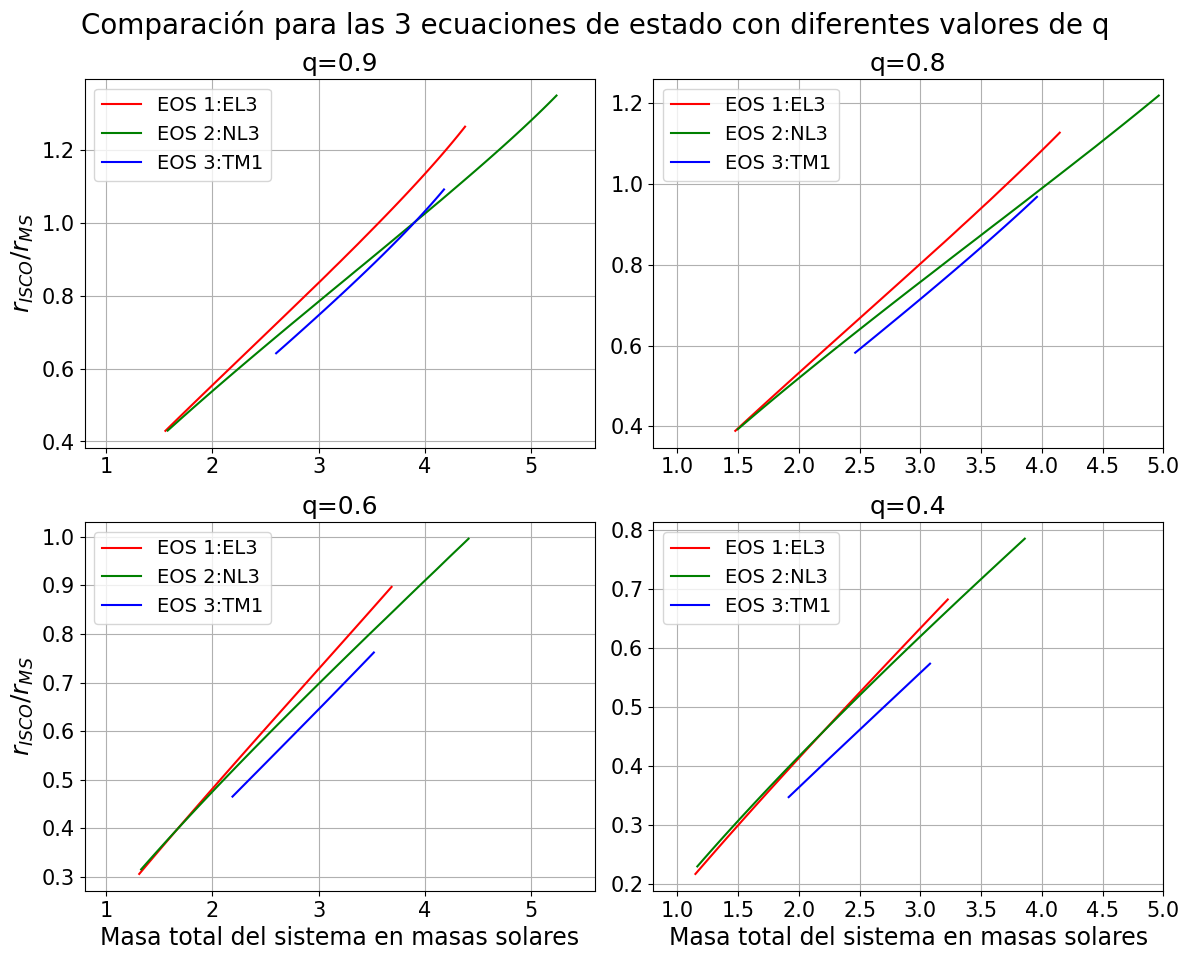

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

plt.suptitle('Comparación para las 3 ecuaciones de estado con diferentes valores de q',
             size=20, y=0.99)

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(1.9*m1/(2*10**30), ggg1, 'r-', label='EOS 1:EL3')
plt.plot(1.9*m2/(2*10**30), ggg2, 'g-', label='EOS 2:NL3')
plt.plot(1.9*m3/(2*10**30), ggg3, 'b-', label='EOS 3:TM1')
plt.title('q=0.9', size=18)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2*10**30), hhh1, 'r-', label='EOS 1:EL3')
plt.plot(1.8*m2/(2*10**30), hhh2, 'g-', label='EOS 2:NL3')
plt.plot(1.8*m3/(2*10**30), hhh3, 'b-', label='EOS 3:TM1')
plt.title('q=0.8', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.6*m1/(2*10**30), III1, 'r-', label='EOS 1:EL3')
plt.plot(1.6*m2/(2*10**30), III2, 'g-', label='EOS 2:NL3')
plt.plot(1.6*m3/(2*10**30), III3, 'b-', label='EOS 3:TM1')
plt.title('q=0.6', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.4*m1/(2*10**30), JJJ1, 'r-', label='EOS 1:EL3')
plt.plot(1.4*m2/(2*10**30), JJJ2, 'g-', label='EOS 2:NL3')
plt.plot(1.4*m3/(2*10**30), JJJ3, 'b-', label='EOS 3:TM1')
plt.title('q=0.4', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_comparacion_risco_rms3.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()


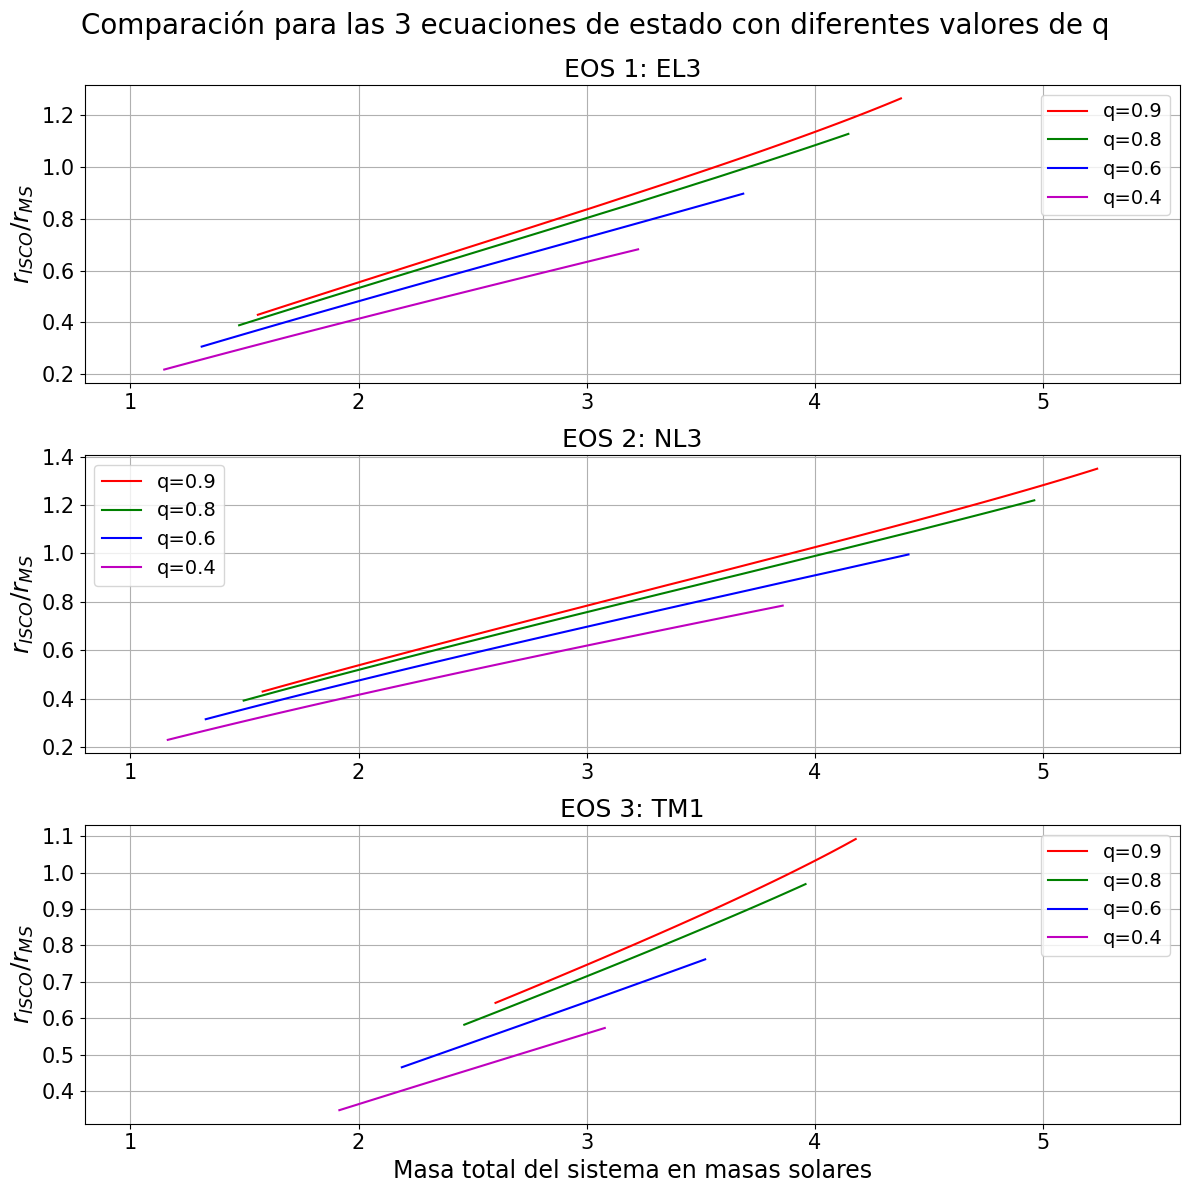

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 12))

plt.suptitle('Comparación para las 3 ecuaciones de estado con diferentes valores de q',
             size=20, y=0.99)

# Subplot 1: EOS 1 (EL3)
plt.subplot(3, 1, 1)
plt.plot(1.9*m1/(2*10**30), ggg1, 'r-', label='q=0.9')
plt.plot(1.8*m1/(2*10**30), hhh1, 'g-', label='q=0.8')
plt.plot(1.6*m1/(2*10**30), III1, 'b-', label='q=0.6')
plt.plot(1.4*m1/(2*10**30), JJJ1, 'm-', label='q=0.4')
plt.title('EOS 1: EL3', size=18)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 2: EOS 2 (NL3)
plt.subplot(3, 1, 2)
plt.plot(1.9*m2/(2*10**30), ggg2, 'r-', label='q=0.9')
plt.plot(1.8*m2/(2*10**30), hhh2, 'g-', label='q=0.8')
plt.plot(1.6*m2/(2*10**30), III2, 'b-', label='q=0.6')
plt.plot(1.4*m2/(2*10**30), JJJ2, 'm-', label='q=0.4')
plt.title('EOS 2: NL3', size=18)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 3: EOS 3 (TM1)
plt.subplot(3, 1, 3)
plt.plot(1.9*m3/(2*10**30), ggg3, 'r-', label='q=0.9')
plt.plot(1.8*m3/(2*10**30), hhh3, 'g-', label='q=0.8')
plt.plot(1.6*m3/(2*10**30), III3, 'b-', label='q=0.6')
plt.plot(1.4*m3/(2*10**30), JJJ3, 'm-', label='q=0.4')
plt.title('EOS 3: TM1', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()

# Mostrar y guardar
plt.tight_layout()
plt.savefig('grafica_comparacion_reducida3.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


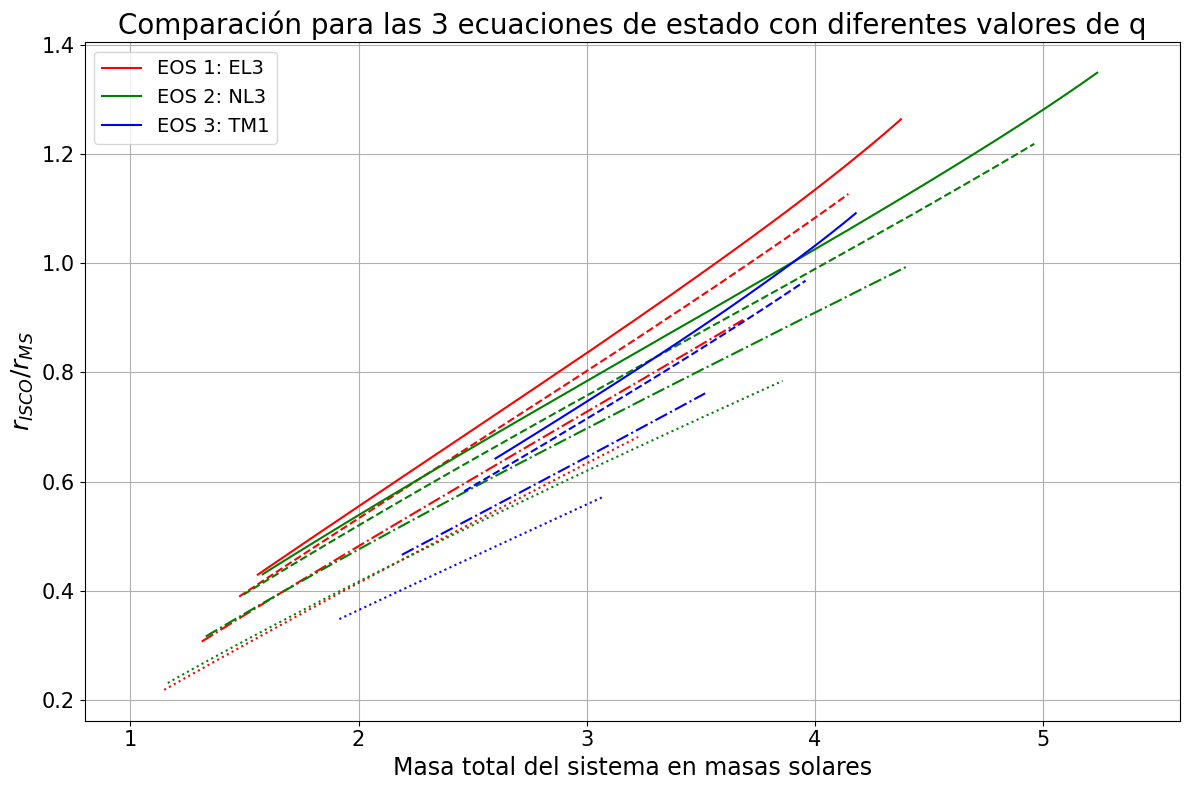

In [ ]:
# Crear figura única
plt.figure(figsize=(12, 8))
plt.title('Comparación para las 3 ecuaciones de estado con diferentes valores de q', size=20)

# EOS 1 (EL3) en rojo
plt.plot(1.9*m1/(2*10**30), ggg1, 'r-', label='EOS 1: EL3')
plt.plot(1.8*m1/(2*10**30), hhh1, 'r--')
plt.plot(1.6*m1/(2*10**30), III1, 'r-.')
plt.plot(1.4*m1/(2*10**30), JJJ1, 'r:')

# EOS 2 (NL3) en verde
plt.plot(1.9*m2/(2*10**30), ggg2, 'g-', label='EOS 2: NL3')
plt.plot(1.8*m2/(2*10**30), hhh2, 'g--')
plt.plot(1.6*m2/(2*10**30), III2, 'g-.')
plt.plot(1.4*m2/(2*10**30), JJJ2, 'g:')

# EOS 3 (TM1) en azul
plt.plot(1.9*m3/(2*10**30), ggg3, 'b-', label='EOS 3: TM1')
plt.plot(1.8*m3/(2*10**30), hhh3, 'b--')
plt.plot(1.6*m3/(2*10**30), III3, 'b-.')
plt.plot(1.4*m3/(2*10**30), JJJ3, 'b:')

# Personalización
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{ISCO}/r_{MS}$', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0.8, 5.6)
plt.grid()
plt.legend(fontsize=14)

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafica_comparacion_unica.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#WOW ES INDEPENDIENTE DE q jummmm

## rms vs risco vs rcont

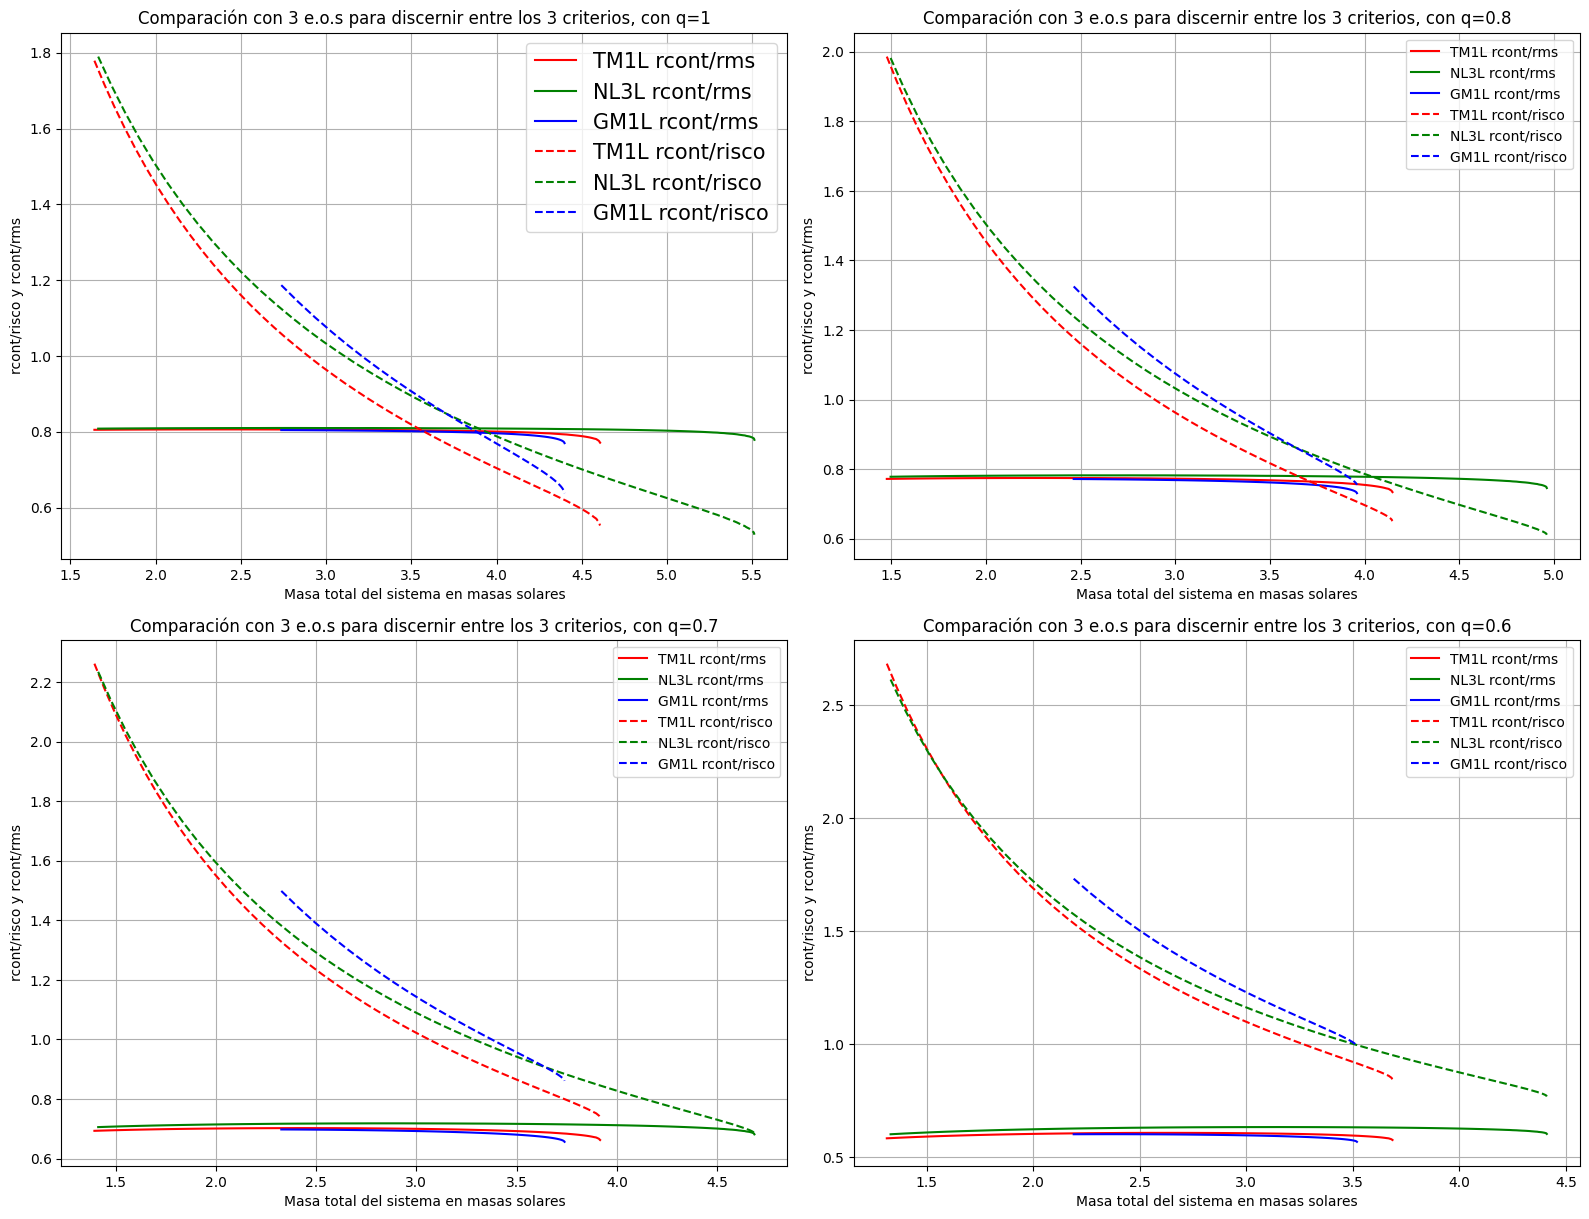

In [ ]:

# Crear subgráficos
plt.figure(figsize=(16, 24))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2* 10**30), gg1, 'r-', label='TM1L rcont/rms')
plt.plot(2*m2/(2* 10**30), gg2, 'g-', label='NL3L rcont/rms')
plt.plot(2*m3/(2* 10**30), gg3, 'b-', label='GM1L rcont/rms')
plt.plot(2*m1/(2* 10**30), g1, 'r--', label='TM1L rcont/risco')
plt.plot(2*m2/(2* 10**30), g2, 'g--', label='NL3L rcont/risco')
plt.plot(2*m3/(2* 10**30), g3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=1')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend(fontsize=15)
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2* 10**30), hh1, 'r-', label='TM1L rcont/rms')
plt.plot(1.8*m2/(2* 10**30), hh2, 'g-', label='NL3L rcont/rms')
plt.plot(1.8*m3/(2* 10**30), hh3, 'b-', label='GM1L rcont/rms')
plt.plot(1.8*m1/(2* 10**30), h1, 'r--', label='TM1L rcont/risco')
plt.plot(1.8*m2/(2* 10**30), h2, 'g--', label='NL3L rcont/risco')
plt.plot(1.8*m3/(2* 10**30), h3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.8')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2* 10**30), II1, 'r-', label='TM1L rcont/rms')
plt.plot(1.7*m2/(2* 10**30), II2, 'g-', label='NL3L rcont/rms')
plt.plot(1.7*m3/(2* 10**30), II3, 'b-', label='GM1L rcont/rms')
plt.plot(1.7*m1/(2* 10**30), I1, 'r--', label='TM1L rcont/risco')
plt.plot(1.7*m2/(2* 10**30), I2, 'g--', label='NL3L rcont/risco')
plt.plot(1.7*m3/(2* 10**30), I3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.7')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2* 10**30), JJ1, 'r-', label='TM1L rcont/rms')
plt.plot(1.6*m2/(2* 10**30), JJ2, 'g-', label='NL3L rcont/rms')
plt.plot(1.6*m3/(2* 10**30), JJ3, 'b-', label='GM1L rcont/rms')
plt.plot(1.6*m1/(2* 10**30), J1, 'r--', label='TM1L rcont/risco')
plt.plot(1.6*m2/(2* 10**30), J2, 'g--', label='NL3L rcont/risco')
plt.plot(1.6*m3/(2* 10**30), J3, 'b--', label='GM1L rcont/risco')
plt.title('Comparación con 3 e.o.s para discernir entre los 3 criterios, con q=0.6')
plt.xlabel('Masa total del sistema en masas solares')
plt.ylabel('rcont/risco y rcont/rms')
plt.legend()
#plt.xticks(size = 15)
#plt.yticks(size = 15)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

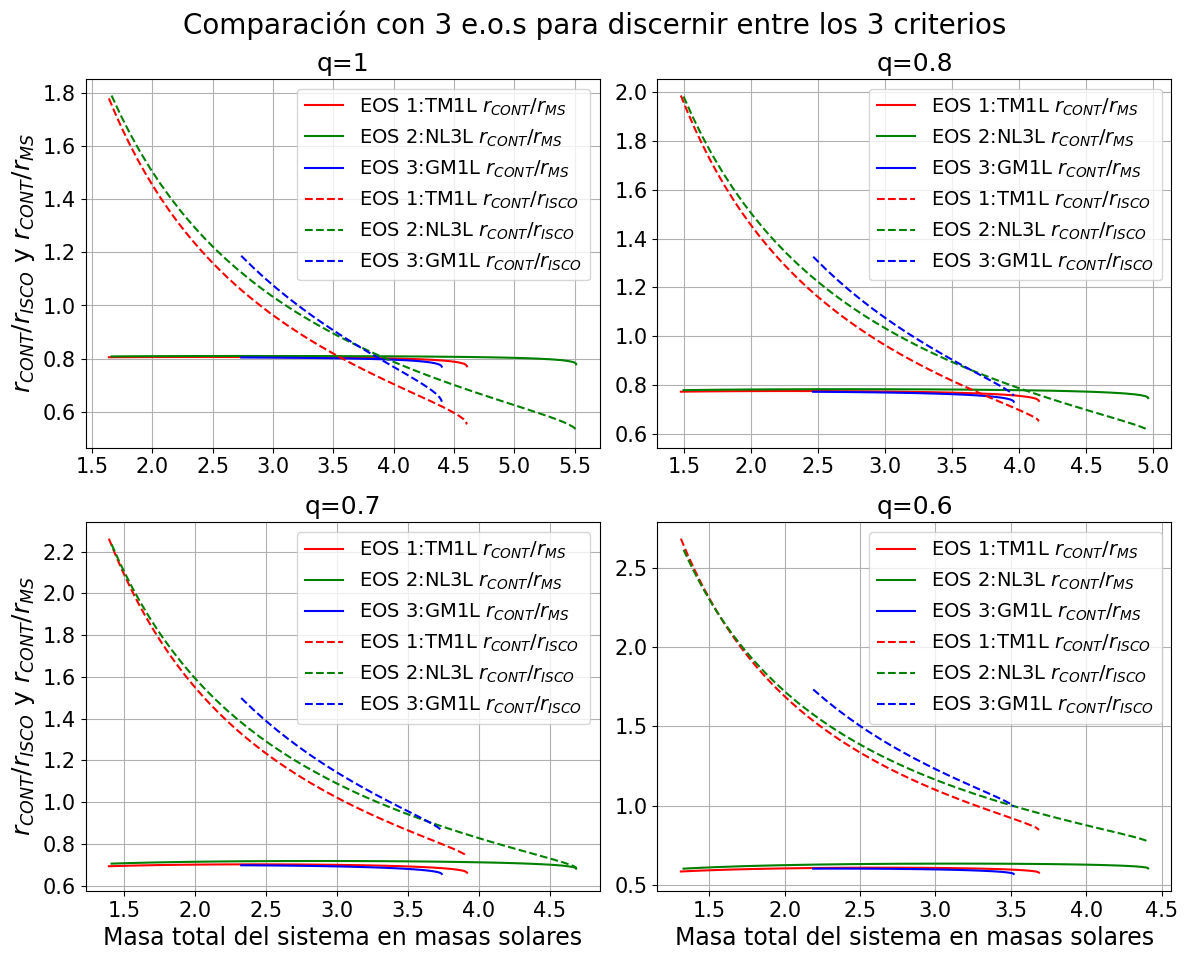

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 18))

plt.suptitle('Comparación con 3 e.o.s para discernir entre los 3 criterios',
             size=20, y=0.99)

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(2*m1/(2*10**30), gg1, 'r-', label='EOS 1:TM1L $r_{CONT}/r_{MS}$')
plt.plot(2*m2/(2*10**30), gg2, 'g-', label='EOS 2:NL3L $r_{CONT}/r_{MS}$')
plt.plot(2*m3/(2*10**30), gg3, 'b-', label='EOS 3:GM1L $r_{CONT}/r_{MS}$')
plt.plot(2*m1/(2*10**30), g1, 'r--', label='EOS 1:TM1L $r_{CONT}/r_{ISCO}$')
plt.plot(2*m2/(2*10**30), g2, 'g--', label='EOS 2:NL3L $r_{CONT}/r_{ISCO}$')
plt.plot(2*m3/(2*10**30), g3, 'b--', label='EOS 3:GM1L $r_{CONT}/r_{ISCO}$')
plt.title('q=1', size=18)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$ y $r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(1.8*m1/(2*10**30), hh1, 'r-', label='EOS 1:TM1L $r_{CONT}/r_{MS}$')
plt.plot(1.8*m2/(2*10**30), hh2, 'g-', label='EOS 2:NL3L $r_{CONT}/r_{MS}$')
plt.plot(1.8*m3/(2*10**30), hh3, 'b-', label='EOS 3:GM1L $r_{CONT}/r_{MS}$')
plt.plot(1.8*m1/(2*10**30), h1, 'r--', label='EOS 1:TM1L $r_{CONT}/r_{ISCO}$')
plt.plot(1.8*m2/(2*10**30), h2, 'g--', label='EOS 2:NL3L $r_{CONT}/r_{ISCO}$')
plt.plot(1.8*m3/(2*10**30), h3, 'b--', label='EOS 3:GM1L $r_{CONT}/r_{ISCO}$')
plt.title('q=0.8', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0.8, 5)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(1.7*m1/(2*10**30), II1, 'r-', label='EOS 1:TM1L $r_{CONT}/r_{MS}$')
plt.plot(1.7*m2/(2*10**30), II2, 'g-', label='EOS 2:NL3L $r_{CONT}/r_{MS}$')
plt.plot(1.7*m3/(2*10**30), II3, 'b-', label='EOS 3:GM1L $r_{CONT}/r_{MS}$')
plt.plot(1.7*m1/(2*10**30), I1, 'r--', label='EOS 1:TM1L $r_{CONT}/r_{ISCO}$')
plt.plot(1.7*m2/(2*10**30), I2, 'g--', label='EOS 2:NL3L $r_{CONT}/r_{ISCO}$')
plt.plot(1.7*m3/(2*10**30), I3, 'b--', label='EOS 3:GM1L $r_{CONT}/r_{ISCO}$')
plt.title('q=0.7', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.ylabel(r'$r_{CONT}/r_{ISCO}$ y $r_{CONT}/r_{MS}$', size=18)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0.8, 5.6)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(1.6*m1/(2*10**30), JJ1, 'r-', label='EOS 1:TM1L $r_{CONT}/r_{MS}$')
plt.plot(1.6*m2/(2*10**30), JJ2, 'g-', label='EOS 2:NL3L $r_{CONT}/r_{MS}$')
plt.plot(1.6*m3/(2*10**30), JJ3, 'b-', label='EOS 3:GM1L $r_{CONT}/r_{MS}$')
plt.plot(1.6*m1/(2*10**30), J1, 'r--', label='EOS 1:TM1L $r_{CONT}/r_{ISCO}$')
plt.plot(1.6*m2/(2*10**30), J2, 'g--', label='EOS 2:NL3L $r_{CONT}/r_{ISCO}$')
plt.plot(1.6*m3/(2*10**30), J3, 'b--', label='EOS 3:GM1L $r_{CONT}/r_{ISCO}$')
plt.title('q=0.6', size=18)
plt.xlabel('Masa total del sistema en masas solares', size=17)
plt.legend(fontsize=14)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0.8, 5)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('grafica_comparacion_criterios4.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()



In [ ]:
# para sistemas altamente simétricas y muy masivos (más de 4 masas solares el total aprox) manda risco
# para sistemas altamente simétricas y poco masivos (menos de 3.5 masas solares el total aprox) manda rms, excepto si el sistema
# es simétrico q=1 ya que no habría rms y entonces (entre 3.2 y 3.7 aprox) manda risco pero si es aún menos masivo entonces
# (menor a 3 aprox) entonces manda rcontact
# para sistemas poco simétricos independientemente de que tan masivo sea se cumple que manda rms
# (salvo al final en la 3cera gráfica línea verde)

## Puntos de corte en función de q

In [ ]:
# Puntos de corte para q=1
idx_cut1_m1 = np.argmin(np.abs(g1 - 1))
idx_cut1_m2 = np.argmin(np.abs(g2 - 1))
idx_cut1_m3 = np.argmin(np.abs(g3 - 1))

q_cut1_m1 = 2*m1[idx_cut1_m1]/(2*10**30)
q_cut1_m2 = 2*m2[idx_cut1_m2]/(2*10**30)
q_cut1_m3 = 2*m3[idx_cut1_m3]/(2*10**30)

print("Punto de corte para q=1 en Dataset 1:", q_cut1_m1)
print("Punto de corte para q=1 en Dataset 2:", q_cut1_m2)
print("Punto de corte para q=1 en Dataset 3:", q_cut1_m3)

# Puntos de corte para q=0.8
idx_cut08_m1 = np.argmin(np.abs(h1 - 1))
idx_cut08_m2 = np.argmin(np.abs(h2 - 1))
idx_cut08_m3 = np.argmin(np.abs(h3 - 1))

q_cut08_m1 = 1.8 * m1[idx_cut08_m1]/(2*10**30)
q_cut08_m2 = 1.8 * m2[idx_cut08_m2]/(2*10**30)
q_cut08_m3 = 1.8 * m3[idx_cut08_m3]/(2*10**30)

print("\nPunto de corte para q=0.8 en Dataset 1:", q_cut08_m1)
print("Punto de corte para q=0.8 en Dataset 2:", q_cut08_m2)
print("Punto de corte para q=0.8 en Dataset 3:", q_cut08_m3)

# Puntos de corte para q=0.6
idx_cut06_m1 = np.argmin(np.abs(I1 - 1))
idx_cut06_m2 = np.argmin(np.abs(I2 - 1))
idx_cut06_m3 = np.argmin(np.abs(I3 - 1))

q_cut06_m1 = 1.6 * m1[idx_cut06_m1]/(2*10**30)
q_cut06_m2 = 1.6 * m2[idx_cut06_m2]/(2*10**30)
q_cut06_m3 = 1.6 * m3[idx_cut06_m3]/(2*10**30)

print("\nPunto de corte para q=0.6 en Dataset 1:", q_cut06_m1)
print("Punto de corte para q=0.6 en Dataset 2:", q_cut06_m2)
print("Punto de corte para q=0.6 en Dataset 3:", q_cut06_m3)

# Puntos de corte para q=0.4
idx_cut04_m1 = np.argmin(np.abs(J1 - 1))
idx_cut04_m2 = np.argmin(np.abs(J2 - 1))
idx_cut04_m3 = np.argmin(np.abs(J3 - 1))

q_cut04_m1 = 1.4 * m1[idx_cut04_m1]/(2*10**30)
q_cut04_m2 = 1.4 * m2[idx_cut04_m2]/(2*10**30)
q_cut04_m3 = 1.4 * m3[idx_cut04_m3]/(2*10**30)

print("\nPunto de corte para q=0.4 en Dataset 1:", q_cut04_m1)
print("Punto de corte para q=0.4 en Dataset 2:", q_cut04_m2)
print("Punto de corte para q=0.4 en Dataset 3:", q_cut04_m3)


##########################################################

# Puntos de corte para q=0.45
idx_cut045_m1 = np.argmin(np.abs(K1 - 1))
idx_cut045_m2 = np.argmin(np.abs(K2 - 1))
idx_cut045_m3 = np.argmin(np.abs(K3 - 1))

q_cut045_m1 = 1.45 * m1[idx_cut045_m1]/(2*10**30)
q_cut045_m2 = 1.45 * m2[idx_cut045_m2]/(2*10**30)
q_cut045_m3 = 1.45 * m3[idx_cut045_m3]/(2*10**30)


# Puntos de corte para q=0.5
idx_cut05_m1 = np.argmin(np.abs(L1 - 1))
idx_cut05_m2 = np.argmin(np.abs(L2 - 1))
idx_cut05_m3 = np.argmin(np.abs(L3 - 1))

q_cut05_m1 = 1.5 * m1[idx_cut05_m1]/(2*10**30)
q_cut05_m2 = 1.5 * m2[idx_cut05_m2]/(2*10**30)
q_cut05_m3 = 1.5 * m3[idx_cut05_m3]/(2*10**30)

# Puntos de corte para q=0.55
idx_cut055_m1 = np.argmin(np.abs(M1 - 1))
idx_cut055_m2 = np.argmin(np.abs(M2 - 1))
idx_cut055_m3 = np.argmin(np.abs(M3 - 1))

q_cut055_m1 = 1.55 * m1[idx_cut055_m1]/(2*10**30)
q_cut055_m2 = 1.55 * m2[idx_cut055_m2]/(2*10**30)
q_cut055_m3 = 1.55 * m3[idx_cut055_m3]/(2*10**30)

# Puntos de corte para q=0.65
idx_cut065_m1 = np.argmin(np.abs(N1 - 1))
idx_cut065_m2 = np.argmin(np.abs(N2 - 1))
idx_cut065_m3 = np.argmin(np.abs(N3 - 1))

q_cut065_m1 = 1.65 * m1[idx_cut065_m1]/(2*10**30)
q_cut065_m2 = 1.65 * m2[idx_cut065_m2]/(2*10**30)
q_cut065_m3 = 1.65 * m3[idx_cut065_m3]/(2*10**30)

# Puntos de corte para q=0.7
idx_cut07_m1 = np.argmin(np.abs(O1 - 1))
idx_cut07_m2 = np.argmin(np.abs(O2 - 1))
idx_cut07_m3 = np.argmin(np.abs(O3 - 1))

q_cut07_m1 = 1.7 * m1[idx_cut07_m1]/(2*10**30)
q_cut07_m2 = 1.7 * m2[idx_cut07_m2]/(2*10**30)
q_cut07_m3 = 1.7 * m3[idx_cut07_m3]/(2*10**30)

# Puntos de corte para q=0.75
idx_cut075_m1 = np.argmin(np.abs(P1 - 1))
idx_cut075_m2 = np.argmin(np.abs(P2 - 1))
idx_cut075_m3 = np.argmin(np.abs(P3 - 1))

q_cut075_m1 = 1.75 * m1[idx_cut075_m1]/(2*10**30)
q_cut075_m2 = 1.75 * m2[idx_cut075_m2]/(2*10**30)
q_cut075_m3 = 1.75 * m3[idx_cut075_m3]/(2*10**30)

# Puntos de corte para q=0.85
idx_cut085_m1 = np.argmin(np.abs(Q1 - 1))
idx_cut085_m2 = np.argmin(np.abs(Q2 - 1))
idx_cut085_m3 = np.argmin(np.abs(Q3 - 1))

q_cut085_m1 = 1.85 * m1[idx_cut085_m1]/(2*10**30)
q_cut085_m2 = 1.85 * m2[idx_cut085_m2]/(2*10**30)
q_cut085_m3 = 1.85 * m3[idx_cut085_m3]/(2*10**30)

# Puntos de corte para q=0.9
idx_cut09_m1 = np.argmin(np.abs(R1 - 1))
idx_cut09_m2 = np.argmin(np.abs(R2 - 1))
idx_cut09_m3 = np.argmin(np.abs(R3 - 1))

q_cut09_m1 = 1.9 * m1[idx_cut09_m1]/(2*10**30)
q_cut09_m2 = 1.9 * m2[idx_cut09_m2]/(2*10**30)
q_cut09_m3 = 1.9 * m3[idx_cut09_m3]/(2*10**30)

# Puntos de corte para q=0.95
idx_cut095_m1 = np.argmin(np.abs(S1 - 1))
idx_cut095_m2 = np.argmin(np.abs(S2 - 1))
idx_cut095_m3 = np.argmin(np.abs(S3 - 1))

q_cut095_m1 = 1.95 * m1[idx_cut095_m1]/(2*10**30)
q_cut095_m2 = 1.95 * m2[idx_cut095_m2]/(2*10**30)
q_cut095_m3 = 1.95 * m3[idx_cut095_m3]/(2*10**30)


Punto de corte para q=1 en Dataset 1: 2.905608
Punto de corte para q=1 en Dataset 2: 3.080724
Punto de corte para q=1 en Dataset 3: 3.221847862

Punto de corte para q=0.8 en Dataset 1: 2.9167506
Punto de corte para q=0.8 en Dataset 2: 3.0986784
Punto de corte para q=0.8 en Dataset 3: 3.2084088174000005

Punto de corte para q=0.6 en Dataset 1: 2.884856
Punto de corte para q=0.6 en Dataset 2: 3.0879776000000008
Punto de corte para q=0.6 en Dataset 3: 3.1727090880000004

Punto de corte para q=0.4 en Dataset 1: 2.8581798
Punto de corte para q=0.4 en Dataset 2: 3.052784
Punto de corte para q=0.4 en Dataset 3: 3.0750122844000005


In [ ]:
# Puntos de corte de las curvas de risco/rms para diferentes valores de q

# Función para calcular el punto de corte de la curva
def punto_de_corte(m, ggg):
    for i in range(len(m) - 1):
        if ggg[i] <= 1 and ggg[i+1] >= 1:
            return m[i]
    return 0  # Si no hay punto de corte, se devuelve 0

# Puntos de corte para q=1
q_cut1_m1_risco = punto_de_corte(m1, ggg1)
q_cut1_m2_risco = punto_de_corte(m2, ggg2)
q_cut1_m3_risco = punto_de_corte(m3, ggg3)

# Puntos de corte para q=0.8
q_cut08_m1_risco = punto_de_corte(m1, hhh1)
q_cut08_m2_risco = punto_de_corte(m2, hhh2)
q_cut08_m3_risco = punto_de_corte(m3, hhh3)

# Puntos de corte para q=0.7
q_cut07_m1_risco = punto_de_corte(m1, III1)
q_cut07_m2_risco = punto_de_corte(m2, III2)
q_cut07_m3_risco = punto_de_corte(m3, III3)

# Puntos de corte para q=0.6
q_cut06_m1_risco = punto_de_corte(m1, JJJ1)
q_cut06_m2_risco = punto_de_corte(m2, JJJ2)
q_cut06_m3_risco = punto_de_corte(m3, JJJ3)



In [ ]:
q_cut07_m1_risco

0

In [ ]:
[q_cut1_m3, q_cut08_m3, q_cut06_m3, q_cut04_m3, q_cut045_m3, q_cut05_m3, q_cut055_m3, q_cut065_m3, q_cut07_m3, q_cut075_m3, q_cut085_m3, q_cut09_m3, q_cut095_m3]

[np.float64(3.221847862),
 np.float64(3.2084088174000005),
 np.float64(3.1727090880000004),
 np.float64(3.0750122844000005),
 np.float64(3.1194783118499996),
 np.float64(3.1417906949999996),
 np.float64(3.1517929245000005),
 np.float64(3.175096651649999),
 np.float64(3.2162629102999998),
 np.float64(3.1865875457500006),
 np.float64(3.2228225199500002),
 np.float64(3.2299977485000007),
 np.float64(3.2294730409500003)]

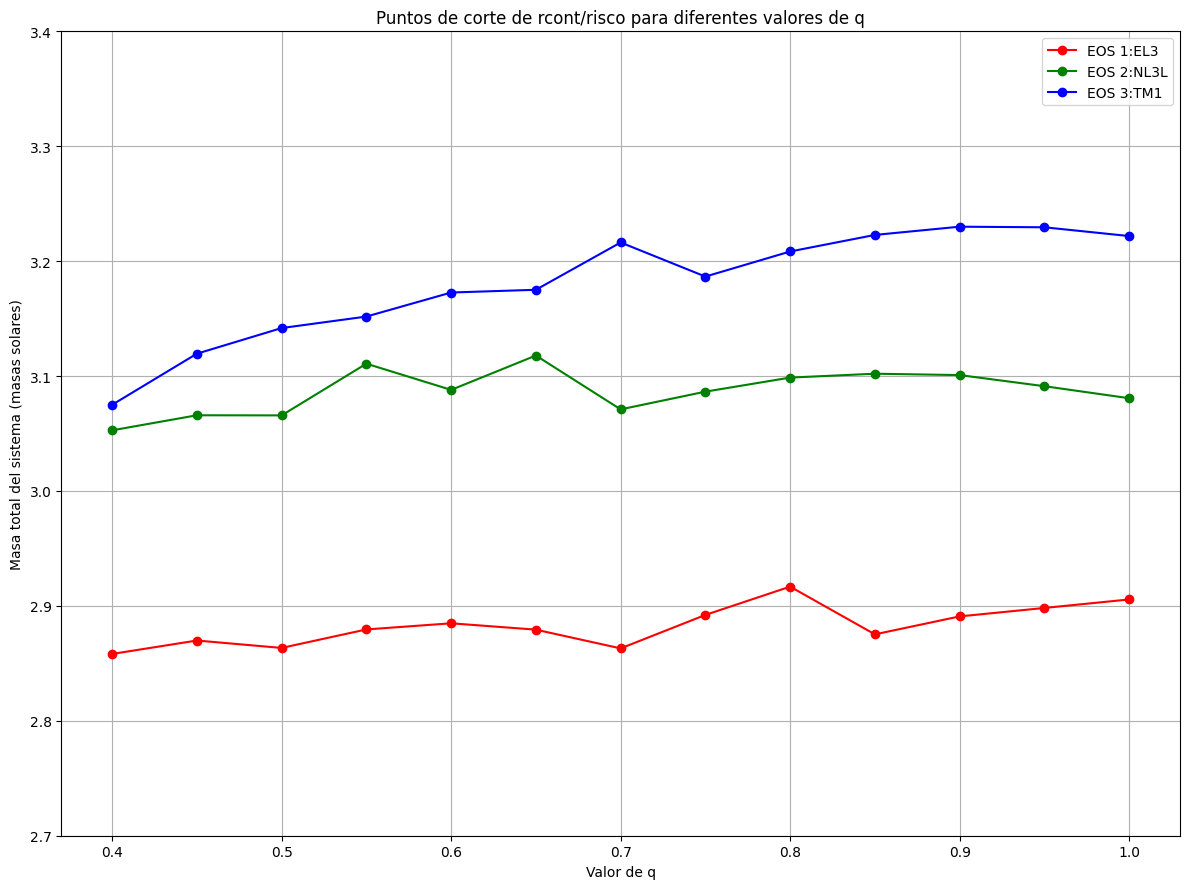

In [ ]:
# Crear subgráficos
plt.figure(figsize=(12, 9))
ques=[1, 0.8, 0.6, 0.4, 0.45, 0.5, 0.55, 0.65, 0.7, 0.75, 0.85, 0.9, 0.95]
cortes1=[q_cut1_m1, q_cut08_m1, q_cut06_m1, q_cut04_m1, q_cut045_m1, q_cut05_m1, q_cut055_m1, q_cut065_m1, q_cut07_m1, q_cut075_m1, q_cut085_m1, q_cut09_m1, q_cut095_m1]
cortes2=[q_cut1_m2, q_cut08_m2, q_cut06_m2, q_cut04_m2, q_cut045_m2, q_cut05_m2, q_cut055_m2, q_cut065_m2, q_cut07_m2, q_cut075_m2, q_cut085_m2, q_cut09_m2, q_cut095_m2]
cortes3=[q_cut1_m3, q_cut08_m3, q_cut06_m3, q_cut04_m3, q_cut045_m3, q_cut05_m3, q_cut055_m3, q_cut065_m3, q_cut07_m3, q_cut075_m3, q_cut085_m3, q_cut09_m3, q_cut095_m3]

# Combinamos las listas y las ordenamos según los valores de `ques`
sorted_data = sorted(zip(ques, cortes1, cortes2, cortes3), key=lambda x: x[0])

# Desempaquetamos las listas ordenadas
ques_sorted, cortes1_sorted, cortes2_sorted, cortes3_sorted = zip(*sorted_data)

# Convertimos de nuevo a listas (opcional)
ques_sorted = list(ques_sorted)
cortes1_sorted = list(cortes1_sorted)
cortes2_sorted = list(cortes2_sorted)
cortes3_sorted = list(cortes3_sorted)

# Subplot 1
#plt.subplot(2, 1, 1)
plt.plot(ques_sorted, cortes1_sorted, 'ro-', label='EOS 1:EL3')
plt.plot(ques_sorted, cortes2_sorted, 'go-', label='EOS 2:NL3L')
plt.plot(ques_sorted, cortes3_sorted, 'bo-', label='EOS 3:TM1')
plt.title('Puntos de corte de rcont/risco para diferentes valores de q')
plt.xlabel('Valor de q')
plt.ylabel('Masa total del sistema (masas solares)')
plt.legend()
plt.ylim(2.7,3.4)
plt.grid()

# Subplot 2
#plt.subplot(2, 1, 2)
#plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m1_risco, q_cut08_m1_risco, q_cut07_m1_risco, q_cut06_m1_risco], 'ro-', label='EOS 1:EL3')
#plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m2_risco, q_cut08_m2_risco, q_cut07_m2_risco, q_cut06_m2_risco], 'go-', label='EOS 2:NL3L')
#plt.plot([1, 0.8, 0.7, 0.6], [q_cut1_m3_risco, q_cut08_m3_risco, q_cut07_m3_risco, q_cut06_m3_risco], 'bo-', label='EOS 3:TM1')
#plt.title('Puntos de corte de risco/rms para diferentes valores de q')
#plt.xlabel('Valor de q')
#plt.ylabel('Masa total del sistema (masas solares)')
#plt.legend()
#plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#print('Solo se hicieron para risco/rms y rcont/risco, ya que no habían cortes en rcont/rms\ny se le asignó el valor de cero para aquellas gráficas donde no había corte')


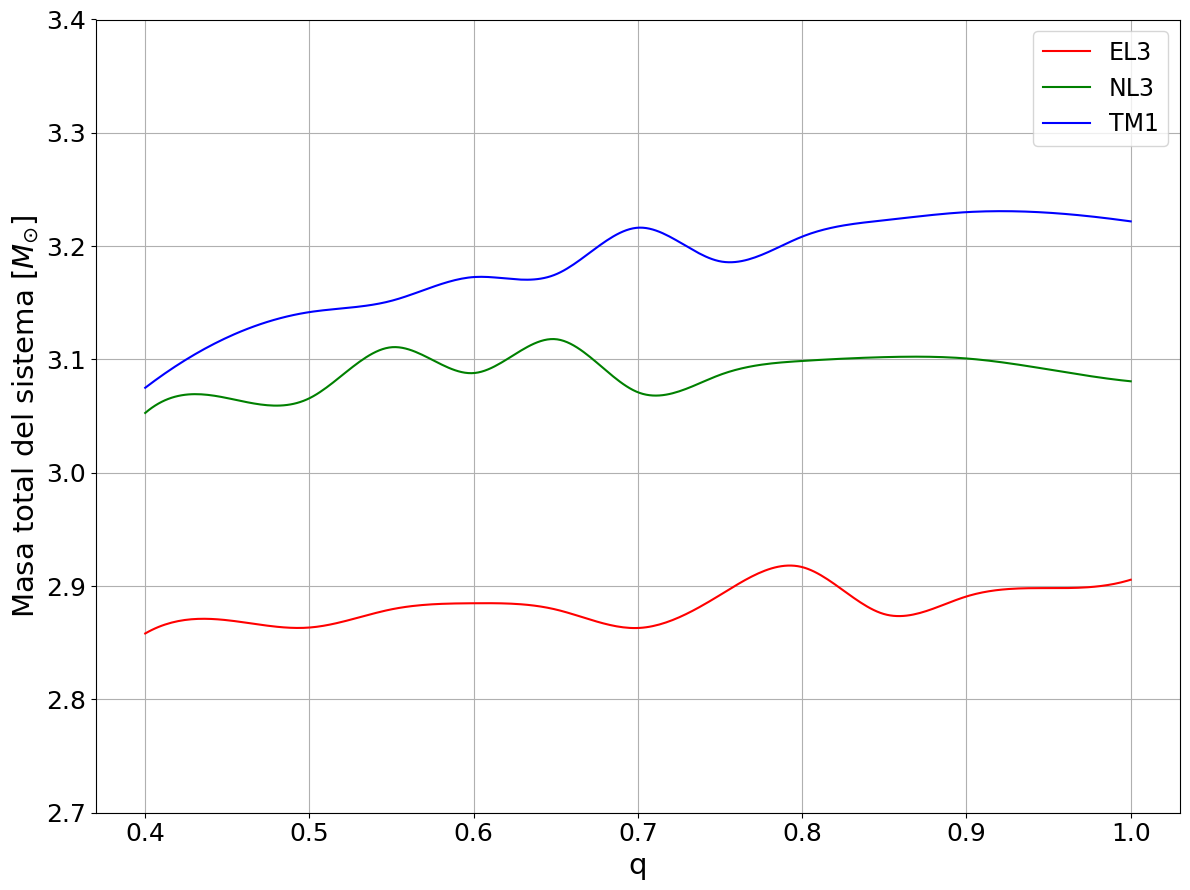

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(12, 9))

# Generamos un conjunto más denso de puntos para interpolar
x_new = np.linspace(min(ques_sorted), max(ques_sorted), 300)  # 300 puntos para suavizar las curvas

# Interpolamos los valores para cada conjunto de datos
spl1 = make_interp_spline(ques_sorted, cortes1_sorted, k=3)  # k=3 para interpolación cúbica
spl2 = make_interp_spline(ques_sorted, cortes2_sorted, k=3)
spl3 = make_interp_spline(ques_sorted, cortes3_sorted, k=3)

cortes1_smooth = spl1(x_new)
cortes2_smooth = spl2(x_new)
cortes3_smooth = spl3(x_new)

# Graficamos las curvas suavizadas
plt.plot(x_new, cortes1_smooth, 'r-', label='EL3')
plt.plot(x_new, cortes2_smooth, 'g-', label='NL3')
plt.plot(x_new, cortes3_smooth, 'b-', label='TM1')

# Opcional: también puedes mostrar los puntos originales
#plt.scatter(ques_sorted, cortes1_sorted, color='red')  # Puntos de EOS 1
#plt.scatter(ques_sorted, cortes2_sorted, color='green')  # Puntos de EOS 2
#plt.scatter(ques_sorted, cortes3_sorted, color='blue')  # Puntos de EOS 3

# Etiquetas y personalización del gráfico
#plt.title(r'Puntos de corte de $\frac{r_{CONT}}{r_{ISCO}}$ para diferentes valores de q',size=23)
plt.xlabel('q',size=21)
plt.ylabel('Masa total del sistema [$M_{\odot}$]',size=21)
plt.ylim(2.7, 3.4)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=17)  # Leyendas solo para las EOS
plt.grid()

# Guardar y mostrar
plt.tight_layout()
plt.savefig('grafica_cortes.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


# Relaciones masas

## Sin masa del disco y con jc=0.7 y ji=0

### mc vs mtotal

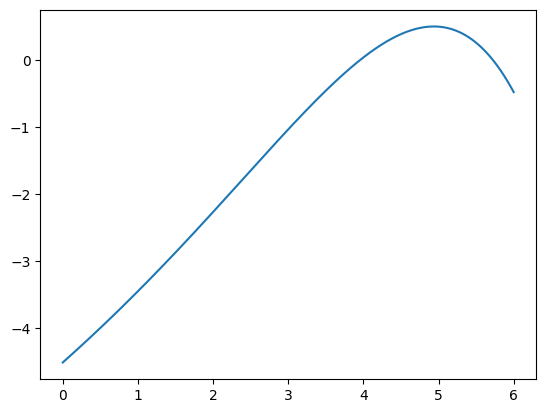

In [ ]:
#ESTO SOLO ERA PARA ENTENDER DONDE ESTABAN LAS RAICES
# QUE PASA CON ESOS VALORES DE MASA? Apenas se permiten tener hasta 4 masas solares para la masa total del sistema pre-fusión

Msun = 1
q = 1
m11 = 2 # 2 masas solares la binarias más grande
mc=np.linspace(0,3*m11,1000)
k=mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)
plt.plot(mc,k)

In [ ]:
datos1 = np.loadtxt("StaticSeq_eL3wr_AllnpT0.txt")
datos2= np.loadtxt("StaticSeq_NL3wr_Allnp.txt")
datos3= np.loadtxt("MassRadius_TM1L.dat")
m1 = datos1[:, 1]*(2*(10**30)) #en kg
m2 = datos2[:, 1]*(2*(10**30)) #en kg
m3 = datos3[:, 1]*(2*(10**30)) #en kg
r1 = datos1[:, 3]*(10**3) # en metros
r2 = datos2[:, 3]*(10**3) # en metros
r3 = datos3[:, 0]*(10**3) # en metros
print(m1.min()/(2*10**30), m1.max()/(2*10**30), m2.min()/(2*10**30), m2.max()/(2*10**30), m3.min()/(2*10**30), m3.max()/(2*10**30))
print('m2 tiene el mínimo de los mínimos y el máximo de los máximos')

m1 = m1/(2*10**30) #en masas solares
m2 = m2/(2*10**30) #en masas solares
m3 = m3/(2*10**30) #en masas solares

from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun y q
Msun = 1
q = 1

# Valores de m11
m11_values = np.linspace(m2.min(), 2, 100)

# Solución para cada valor de m11
mc_solution = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution.append(root)

mc_solution = np.array(mc_solution)
#print(mc_solution)
################################################
################################################
q = 0.8

# Solución para cada valor de m11
mc_solution08 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution08.append(root)

mc_solution08 = np.array(mc_solution08)
################################################
################################################
q = 0.7

# Solución para cada valor de m11
mc_solution07 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution07.append(root)

mc_solution07 = np.array(mc_solution07)
################################################
################################################
q = 0.6

# Solución para cada valor de m11
mc_solution06 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution06.append(root)

mc_solution06 = np.array(mc_solution06)
################################################
##############################################

0.3294558 2.303669 0.3289216 2.756302 0.54902051 2.199386179
m2 tiene el mínimo de los mínimos y el máximo de los máximos


In [ ]:
m2.min()

np.float64(0.3289216)

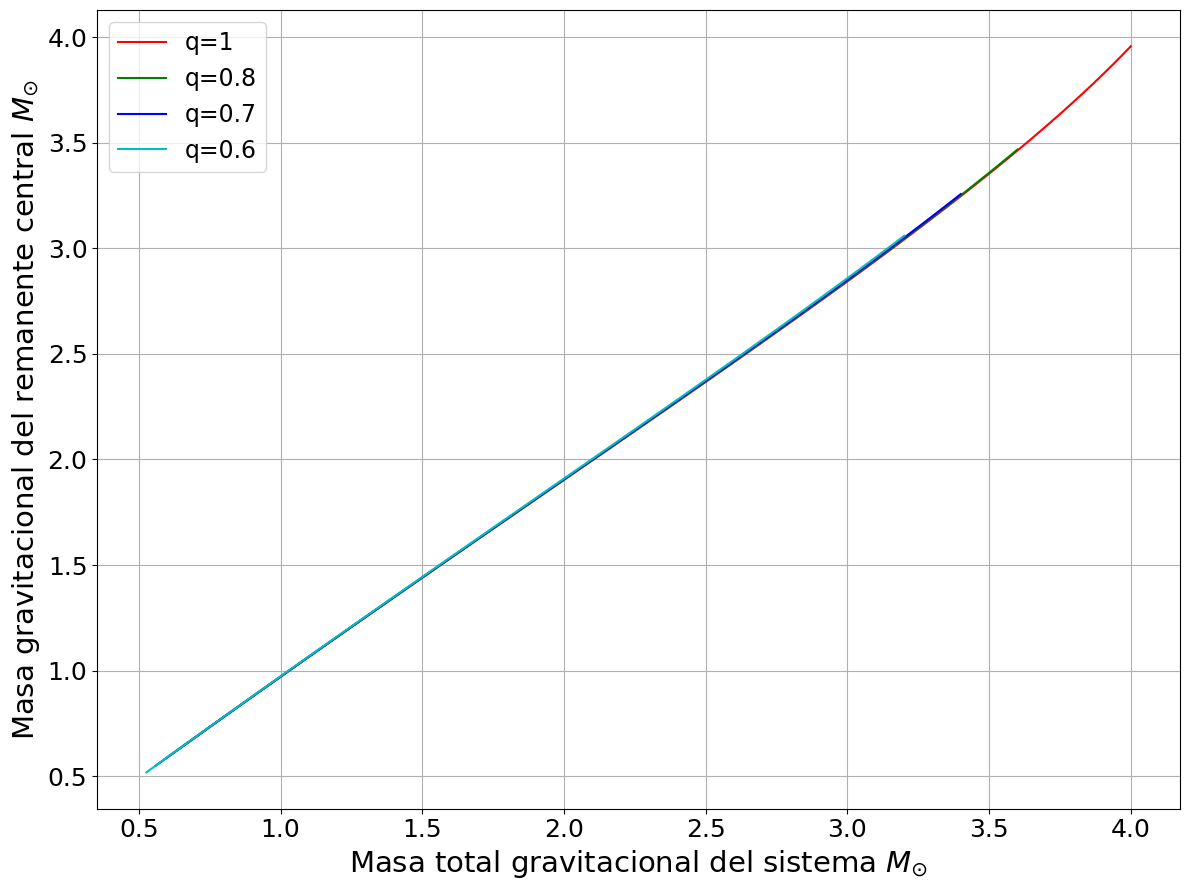

In [ ]:
#ACÁ NO HAY DEPENDENCIA CON LAS E.O.S PUESTO QUE LA ECUACIÓN A RESOLVER NO DEPENDE DE LA RELACION MASA RADIO DE LAS BINARIAS
plt.figure(figsize=(12, 9))
q=1
plt.plot((m11_values+q*m11_values),mc_solution, 'r-', label='q=1')
q=0.8
plt.plot((m11_values+q*m11_values),mc_solution08, 'g-', label='q=0.8')
q=0.7
plt.plot((m11_values+q*m11_values),mc_solution07, 'b-', label='q=0.7')
q=0.6
plt.plot((m11_values+q*m11_values),mc_solution06, 'c-', label='q=0.6')
#plt.title('Comportamiento del remanente en función de q, para j=0.7',fontsize=15)
plt.xlabel(r'Masa total gravitacional del sistema $M_{\odot}$',fontsize=21)
plt.ylabel('Masa gravitacional del remanente central $M_{\odot}$',fontsize=21)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.legend(fontsize=17)
plt.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.savefig('discocero.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()

# LAS E.O.S DAN MASA GRAV O MASAS BARIÓNICA? (CABE ACLARAR QUE TODO HASTA EL MOMENTO SE HA HECHO COMO SI DIERAN MASA GRAV)
# LO ANTERIOR PODRÍA EXPLICAR POR QUÉ LA MASA GRAV DEL REMANENTE ES MAYOR A LA SUMA ¿no?
# Por qué todas parecen terminar en el mismo lugar? alrededor de 4? deberían terminar en puntos menores, no?

## Sin masa del disco con jc=0.7 y ji=0 pero acotando

In [ ]:
from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54*0/130)*(mc**3.4/Msun**3.4)) - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun y q
Msun = 1
q = 1

# Valores de m110
m11_values = np.linspace(m2.min(), 2, 100) # OJO IMPORTANTE: ESCOJO ESTE LÍMITE INFERIOR QUE CORRESPONDE AL MÍNIMO DE LOS MÍNIMOS EN LAS MASAS M123
# Solución para cada valor de m11
mc_solution = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution.append(root)

mc_solution = np.array(mc_solution)
#print(mc_solution)
################################################
################################################
q = 0.8

# Solución para cada valor de m11
mc_solution08 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution08.append(root)

mc_solution08 = np.array(mc_solution08)
################################################
################################################
q = 0.7

# Solución para cada valor de m11
mc_solution07 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution07.append(root)

mc_solution07 = np.array(mc_solution07)
################################################
################################################
q = 0.6

# Solución para cada valor de m11
mc_solution06 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q))
    mc_solution06.append(root)

mc_solution06 = np.array(mc_solution06)
################################################
##############################################

Observese que la masa del remanente central es menor cuando j=0 que cuando j=0.7, ¿podrá esto indicar una relación entre jc y  delta j? ya que así influiría en el valor de la masa del disco y por lo tanto en el valor de la masa del remanente central
O tal vez simplemente este resultado es producto de la conservación de la masa bariónica lo cual fue lo único empleado en este procedimiento.


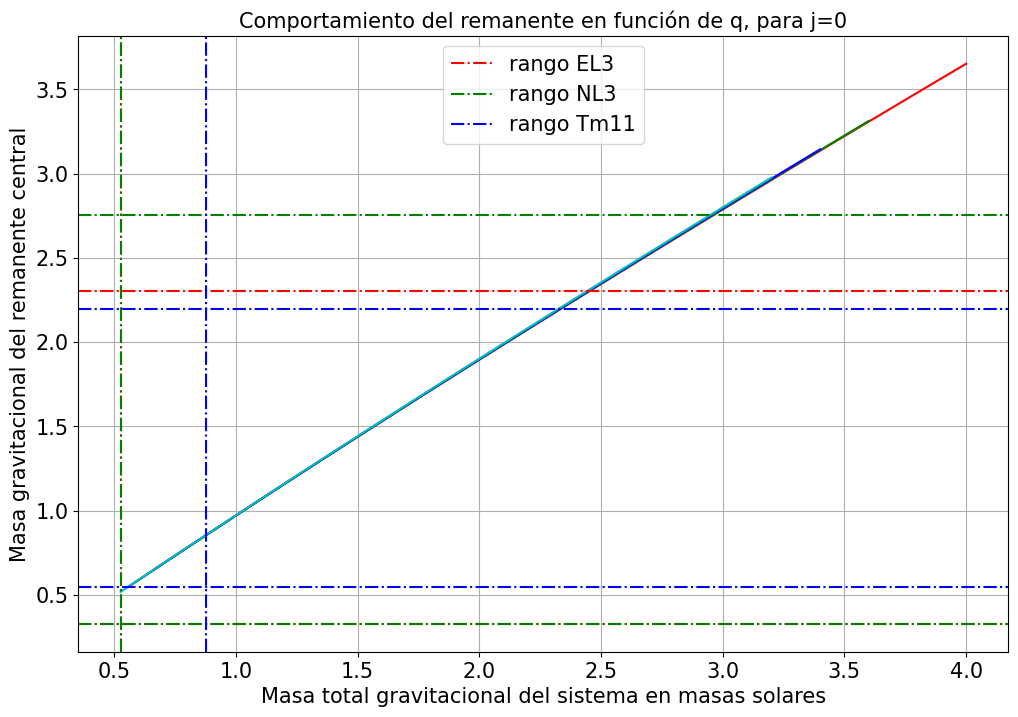

In [ ]:
#ACÁ NO HAY DEPENDENCIA CON LAS E.O.S PUESTO QUE LA ECUACIÓN A RESOLVER NO DEPENDE DE LA RELACION MASA RADIO DE LAS BINARIAS
plt.figure(figsize=(12, 8))
q=1
plt.plot((m11_values+q*m11_values),mc_solution, 'r-')
q=0.8
plt.plot((m11_values+q*m11_values),mc_solution08, 'g-')
q=0.7
plt.plot((m11_values+q*m11_values),mc_solution07, 'b-')
q=0.6
plt.plot((m11_values+q*m11_values),mc_solution06, 'c-')

plt.axhline(y=m1.min(), color='r', linestyle='-.',label='rango EL3')
plt.axhline(y=m2.min(), color='g', linestyle='-.',label='rango NL3')
plt.axhline(y=m3.min(), color='b', linestyle='-.',label='rango Tm11')
plt.axhline(y=m1.max(), color='r', linestyle='-.')
plt.axhline(y=m2.max(), color='g', linestyle='-.')
plt.axhline(y=m3.max(), color='b', linestyle='-.')

plt.axvline(x=1.6*m1.min(), color='r', linestyle='-.')
plt.axvline(x=1.6*m2.min(), color='g', linestyle='-.')
plt.axvline(x=1.6*m3.min(), color='b', linestyle='-.')
#plt.axvline(x=2*m1.max(), color='r', linestyle='-.')
#plt.axvline(x=2*m2.max(), color='g', linestyle='-.')
#plt.axvline(x=2*m3.max(), color='b', linestyle='-.')

plt.title('Comportamiento del remanente en función de q, para j=0',fontsize=15)
plt.xlabel('Masa total gravitacional del sistema en masas solares',fontsize=15)
plt.ylabel('Masa gravitacional del remanente central',fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(fontsize=15)
plt.grid()

print('Observese que la masa del remanente central es menor cuando j=0 que cuando j=0.7, ¿podrá esto indicar una relación entre jc y  delta j? ya que así influiría en el valor de la masa del disco y por lo tanto en el valor de la masa del remanente central')
print('O tal vez simplemente este resultado es producto de la conservación de la masa bariónica lo cual fue lo único empleado en este procedimiento.')
# LAS E.O.S DAN MASA GRAV O MASAS BARIÓNICA? (CABE ACLARAR QUE TODO HASTA EL MOMENTO SE HA HECHO COMO SI DIERAN MASA GRAV)
# LO ANTERIOR PODRÍA EXPLICAR POR QUÉ LA MASA GRAV DEL REMANENTE ES MAYOR A LA SUMA ¿no?
# Por qué todas parecen terminar en el mismo lugar? alrededor de 4? deberían terminar en puntos menores, no?

In [ ]:
print('-Si bien el resultado depende de q, no depende de la e.o.s, por lo tanto en vez de 12 líneas se muestran únicamente 4 al emplear alguna e.o.s arbitrariamente. Sin embargo, cada e.o.s tiene una mínima masa inicial, así que se emplean líneas verticales tambien para mostrar el rango de validez')

print('-Si se requiere se puede acotar la misma gráfica para j=0.7 o en general cualquier gráfica que explicitamente muestre relaciones de masa')

print('-De momento se acotó con los valores extremales de nuestras e.o.s pero, es el único criterio? podría tomarse en cuenta por ejemplo la rotación no?')

-Si bien el resultado depende de q, no depende de la e.o.s, por lo tanto en vez de 12 líneas se muestran únicamente 4 al emplear alguna e.o.s arbitrariamente. Sin embargo, cada e.o.s tiene una mínima masa inicial, así que se emplean líneas verticales tambien para mostrar el rango de validez
-Si se requiere se puede acotar la misma gráfica para j=0.7 o en general cualquier gráfica que explicitamente muestre relaciones de masa
-De momento se acotó con los valores extremales de nuestras e.o.s pero, es el único criterio? podría tomarse en cuenta por ejemplo la rotación no?


## considerando la masa del disco y j=0.7

### mc vs mtotal para específicos valores de masa del disco

In [ ]:
from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q, md):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + md/Msun - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun y q
Msun = 1
q = 1

# Valores de m11
m11_values = np.linspace(m2.min(), 2, 100)

# Definir masa del disco
md1=0.02
md2=0.04
md3=0.06
md4=0.09

# Solución para cada valor de m11 con md1
mc_solution_md1 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md1))
    mc_solution_md1.append(root)

mc_solution_md1 = np.array(mc_solution_md1)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m11 con md2
mc_solution_md2 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md2))
    mc_solution_md2.append(root)

mc_solution_md2 = np.array(mc_solution_md2)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m11 con md3
mc_solution_md3 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md3))
    mc_solution_md3.append(root)

mc_solution_md3 = np.array(mc_solution_md3)
#print(mc_solution)
################################################
################################################

# Solución para cada valor de m11 con md4
mc_solution_md4 = []
for m11 in m11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md4))
    mc_solution_md4.append(root)

mc_solution_md4 = np.array(mc_solution_md4)
#print(mc_solution)
################################################
################################################

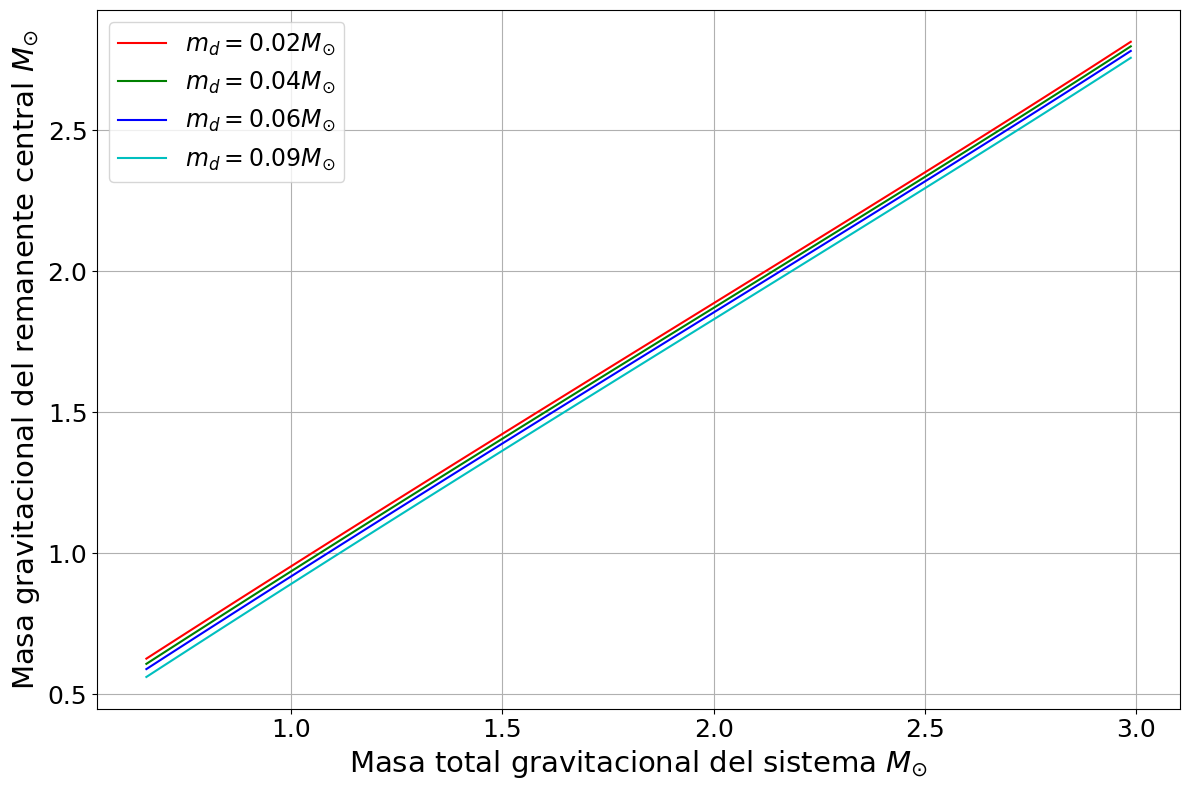

In [ ]:
#ACÁ NO HAY DEPENDENCIA CON LAS E.O.S PUESTO QUE LA ECUACIÓN A RESOLVER NO DEPENDE DE LA RELACION MASA RADIO DE LAS BINARIAS
plt.figure(figsize=(12, 8))
plt.plot((m11_values+q*m11_values)[:70],mc_solution_md1[:70], 'r-', label=r'$m_d=0.02M_{\odot}$')
plt.plot((m11_values+q*m11_values)[:70],mc_solution_md2[:70], 'g-', label=r'$m_d=0.04M_{\odot}$')
plt.plot((m11_values+q*m11_values)[:70],mc_solution_md3[:70], 'b-', label=r'$m_d=0.06M_{\odot}$')
plt.plot((m11_values+q*m11_values)[:70],mc_solution_md4[:70], 'c-', label=r'$m_d=0.09M_{\odot}$')
#plt.title('Comportamiento del remanente en función de la masa del disco, para j=0.7 y q=1',fontsize=15)
plt.xlabel(r'Masa total gravitacional del sistema $M_{\odot}$',fontsize=21)
plt.ylabel(r'Masa gravitacional del remanente central $M_{\odot}$',fontsize=21)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.legend(fontsize=17)
plt.grid()
# Mostrar los gráficos
plt.tight_layout()
plt.savefig('disco_max.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Guardar en PDF con alta calidad
plt.show()
#print('Observese que no se varió el valor de q, ya que como se mostró anteriormente, este no afecta el comportamiento de las gráficas')

In [ ]:
np.size(mc_solution_md1)

100

In [ ]:
#%matplotlib auto

### md vs mc para un específico valor de masa total

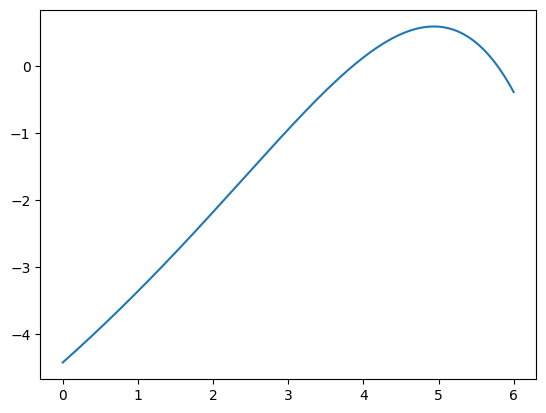

In [ ]:
#ESTO SOLO ERA PARA ENTENDER DONDE ESTABAN LAS RAICES
# QUE PASA CON ESOS VALORES DE MASA? Apenas se permiten tener hasta 4 masas solares para la masa total del sistema pre-fusión

Msun = 1
q = 1
m11 = 2 # 2 masas solares la binarias más grande
mc=np.linspace(0,3*m11,1000)
mdTm11=0.093 #masas solares
mdGm11=0.073 #masas solares
k=mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + mdTm11/Msun - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)
plt.plot(mc,k)

In [ ]:
from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q, md):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + md/Msun - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun, q y md
Msun = 1
q = 0.933
m11=2.909/1.933

# Valores de md
mdTm11_values = np.linspace(0, 0.093, 100)
mdGm11_values = np.linspace(0, 0.073, 100)
#

# Solución para cada valor de md con la E.O.S Tm11
mc_solution = []
for md in mdTm11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md))
    mc_solution.append(root)

mc_solutionTm11 = np.array(mc_solution)

# Solución para cada valor de md con la E.O.S Gm11
mc_solution = []
for md in mdGm11_values:
    root = brentq(equation, 1/2, 5, args=(m11, Msun, q, md))
    mc_solution.append(root)

mc_solutionGm11 = np.array(mc_solution)

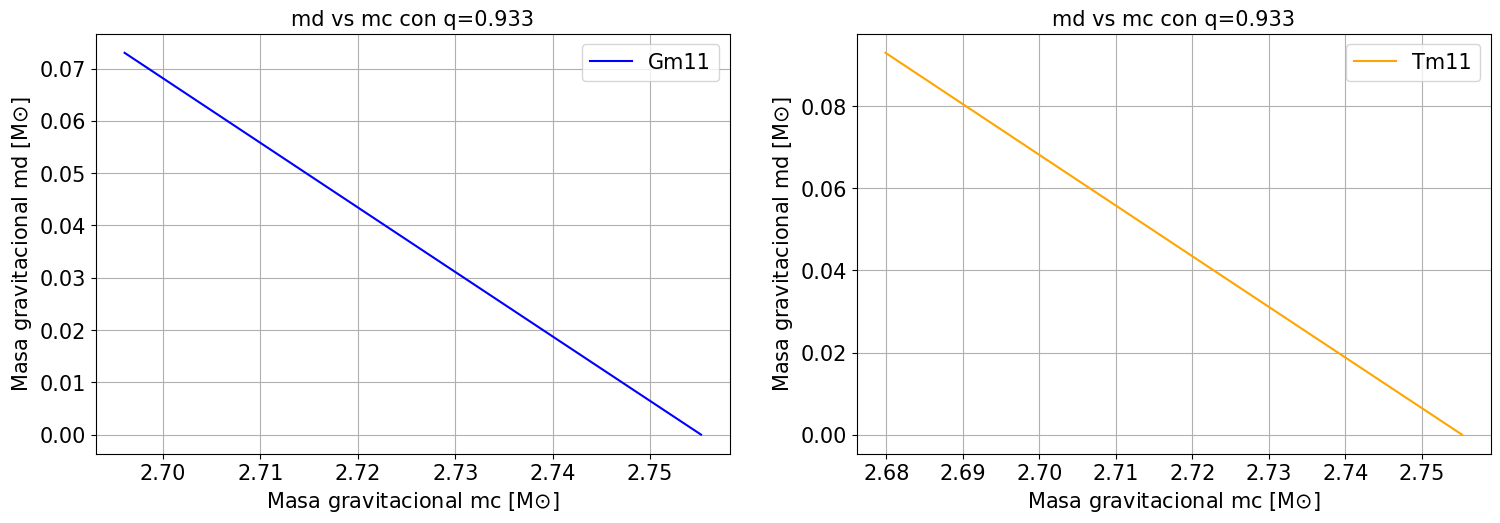

In [ ]:
plt.figure(figsize=(18, 12))

# Subplot 1
plt.subplot(2, 2, 1)
plt.plot(mc_solutionGm11,mdGm11_values, 'b-', label='Gm11')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(2, 2, 2)
plt.plot(mc_solutionTm11,mdTm11_values, '-', color='orange', label='Tm11')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

## Determinando la masa del disco (primera manera)

In [ ]:
from scipy.optimize import brentq
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def equation(mc, m11, Msun, q, Jmerger, deltaJ):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + (sci.c*(Jmerger - 0.7*sci.G*(mc**2)/sci.c -deltaJ)/(sci.G*mc*(2*np.sqrt(3) - 0.37 * (0.7*mc/Msun)**0.85)))/Msun - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun, q y md
Msun = 1
q = 0.933
m11=2.909/1.933

# Valores de Jmerger, deltaJ y md

JmergerGm11=5.42*(sci.G*(Msun**2)/sci.c) ####REALMENTE ES EL3 NO GM1
JmergerTm11=5.73*(sci.G*(Msun**2)/sci.c)
deltaJ_values=np.linspace(0, 0.5*(sci.G*(Msun**2)/sci.c), 1000) #Definimos un rango arbitrario, el mínimo valor evidentemente es cero, y el máximo será aquel que haga que md sea cero

#mdGm11_values = sci.c*(JmergerGm11 - 0.7*sci.G*(mc**2)/sci.c -deltaJ)/(sci.G*mc*(2*np.sqrt(3) - 0.37 * (0.7*mc/Msun)**0.85))
#mdTm11_values = sci.c*(JmergerTm11 - 0.7*sci.G*(mc**2)/sci.c -deltaJ)/(sci.G*mc*(2*np.sqrt(3) - 0.37 * (0.7*mc/Msun)**0.85))

#

# Solución para cada valor de deltaJ con la E.O.S Tm11
mc_solution = []
for deltaJ in deltaJ_values:
    root = brentq(equation, 2, 5, args=(m11, Msun, q, JmergerTm11,deltaJ))
    mc_solution.append(root)

mc_solutionTm11 = np.array(mc_solution)

# Solución para cada valor de deltaJ con la E.O.S Gm11
mc_solution = []
for deltaJ in deltaJ_values:
    root = brentq(equation, 2, 5, args=(m11, Msun, q, JmergerGm11,deltaJ))
    mc_solution.append(root)

mc_solutionGm11 = np.array(mc_solution)

#Tenemos mc, por lo tanto ahora tenemos md y escogemos valores físicamente aceptables

mdGm11_values = sci.c*(JmergerGm11 - 0.7*sci.G*(mc_solutionGm11**2)/sci.c -deltaJ_values)/(sci.G*mc_solutionGm11*(2*np.sqrt(3) - 0.37 * (0.7*mc_solutionGm11/Msun)**0.85))
mdTm11_values = sci.c*(JmergerTm11 - 0.7*sci.G*(mc_solutionTm11**2)/sci.c -deltaJ_values)/(sci.G*mc_solutionTm11*(2*np.sqrt(3) - 0.37 * (0.7*mc_solutionTm11/Msun)**0.85))

############ Nos quedamos con los valores físicamente aceptables (mdisk>0)

# Encuentra el índice del último valor mayor que cero para mdGm11
indice_ultimo_valor_positivo_Gm11 = -1
for i, valor in enumerate(mdGm11_values):
    if valor > 0:
        indice_ultimo_valor_positivo_Gm11 = i

# Verifica si se encontró un valor mayor que cero
if indice_ultimo_valor_positivo_Gm11 != -1:
    mdGm11_values_real = mdGm11_values[:indice_ultimo_valor_positivo_Gm11 + 1]
    deltaJ_values_Gm11= deltaJ_values[:indice_ultimo_valor_positivo_Gm11 + 1]
else:
    mdGm11_values_real = []
    deltaJ_values_Gm11=[]

# Encuentra el índice del último valor mayor que cero para mdTm11
indice_ultimo_valor_positivo_Tm11 = -1
for i, valor in enumerate(mdTm11_values):
    if valor > 0:
        indice_ultimo_valor_positivo_Tm11 = i

# Verifica si se encontró un valor mayor que cero
if indice_ultimo_valor_positivo_Tm11 != -1:
    mdTm11_values_real = mdTm11_values[:indice_ultimo_valor_positivo_Tm11 + 1]
    deltaJ_values_Tm11= deltaJ_values[:indice_ultimo_valor_positivo_Tm11 + 1]
else:
    mdTm11_values_real = []
    deltaJ_values_Tm11=[]

#print(f"Índice del último valor mayor que cero: {indice_ultimo_valor_positivo}")
print(f"Datos recortados: {deltaJ_values_Tm11/(sci.G*Msun**2/sci.c)}")

Datos recortados: [0.         0.0005005  0.001001   0.0015015  0.002002   0.0025025
 0.003003   0.0035035  0.004004   0.0045045  0.00500501 0.00550551
 0.00600601 0.00650651 0.00700701 0.00750751 0.00800801 0.00850851
 0.00900901 0.00950951 0.01001001 0.01051051 0.01101101 0.01151151
 0.01201201 0.01251251 0.01301301 0.01351351 0.01401401 0.01451451
 0.01501502 0.01551552 0.01601602 0.01651652 0.01701702 0.01751752
 0.01801802 0.01851852 0.01901902 0.01951952 0.02002002 0.02052052
 0.02102102 0.02152152 0.02202202 0.02252252 0.02302302 0.02352352
 0.02402402 0.02452452 0.02502503 0.02552553 0.02602603 0.02652653
 0.02702703 0.02752753 0.02802803 0.02852853 0.02902903 0.02952953
 0.03003003 0.03053053 0.03103103 0.03153153 0.03203203 0.03253253
 0.03303303 0.03353353 0.03403403 0.03453453 0.03503504 0.03553554
 0.03603604 0.03653654 0.03703704 0.03753754 0.03803804 0.03853854
 0.03903904 0.03953954 0.04004004 0.04054054 0.04104104 0.04154154
 0.04204204 0.04254254 0.04304304 0.04354354 

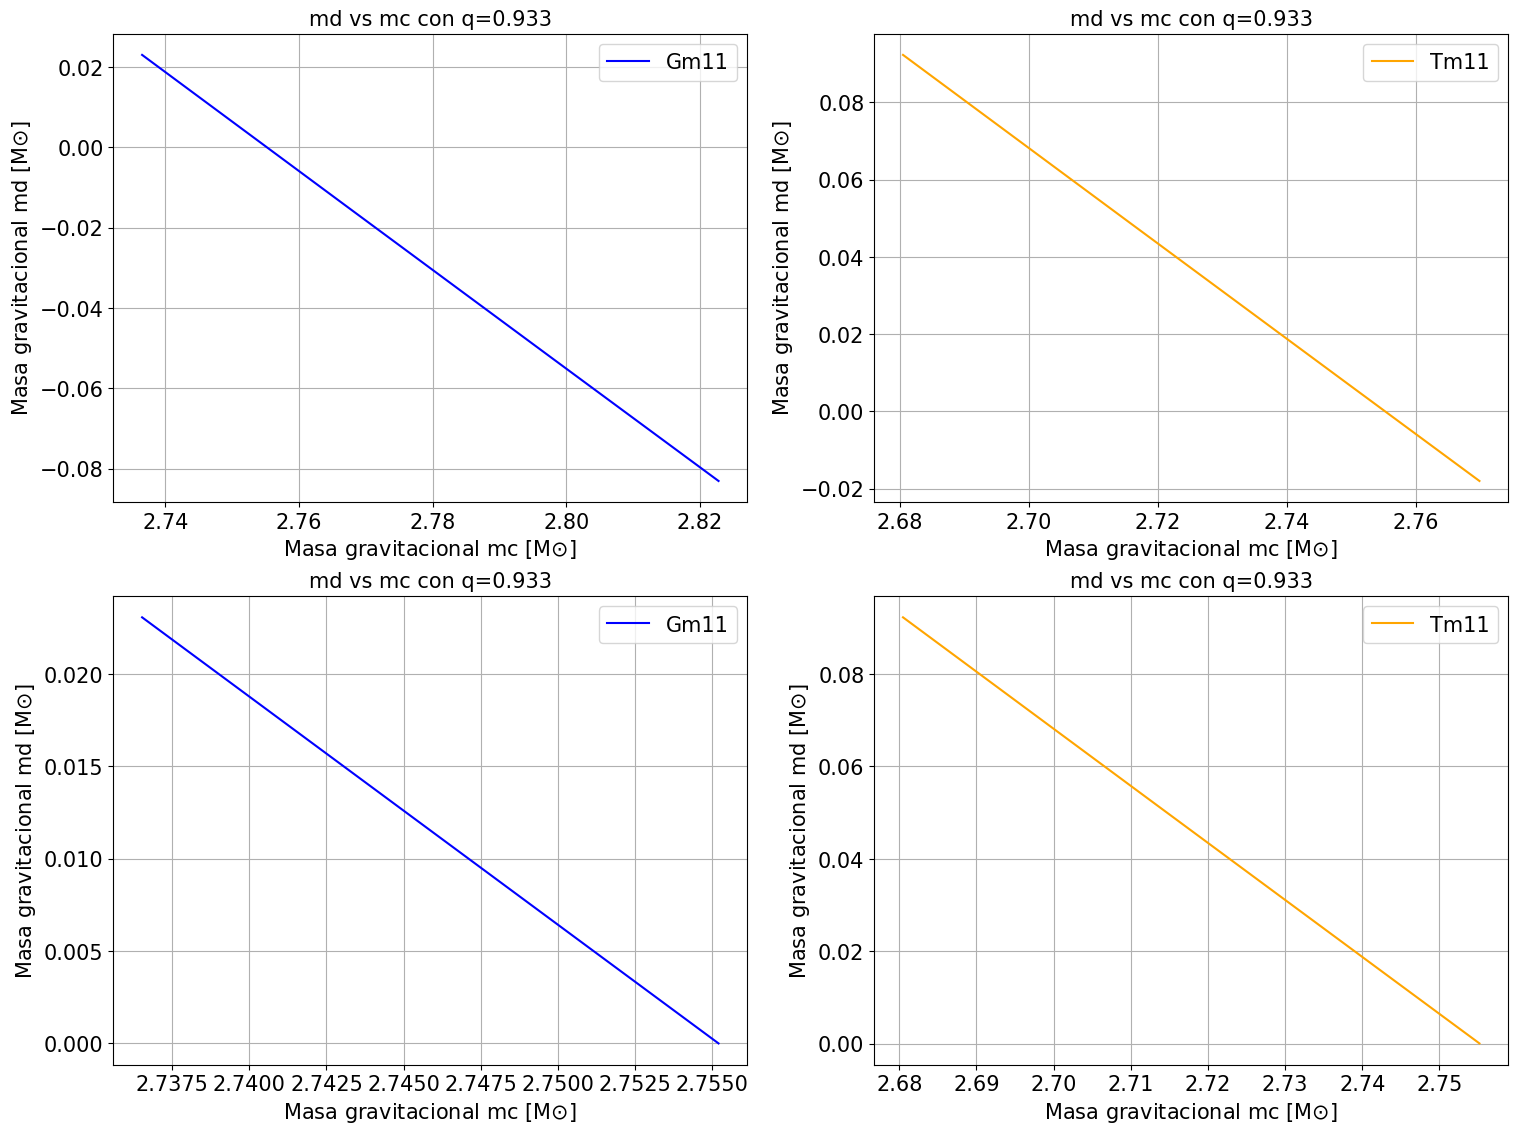

In [ ]:
#Puntos para ver



plt.figure(figsize=(18, 28))

# Subplot 1
plt.subplot(4, 2, 1)
plt.plot(mc_solutionGm11,mdGm11_values, 'b-', label='Gm11')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(4, 2, 2)
plt.plot(mc_solutionTm11,mdTm11_values, '-', color='orange', label='Tm11')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 3
plt.subplot(4, 2, 3)
plt.plot(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1],mdGm11_values_real, '-', color='blue', label='Gm11')
#plt.scatter()
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 4
plt.subplot(4, 2, 4)
plt.plot(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1],mdTm11_values_real, '-', color='orange', label='Tm11')
plt.title('md vs mc con q=0.933', fontsize=15)
plt.xlabel('Masa gravitacional mc [M$\odot$]', fontsize=15)
plt.ylabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

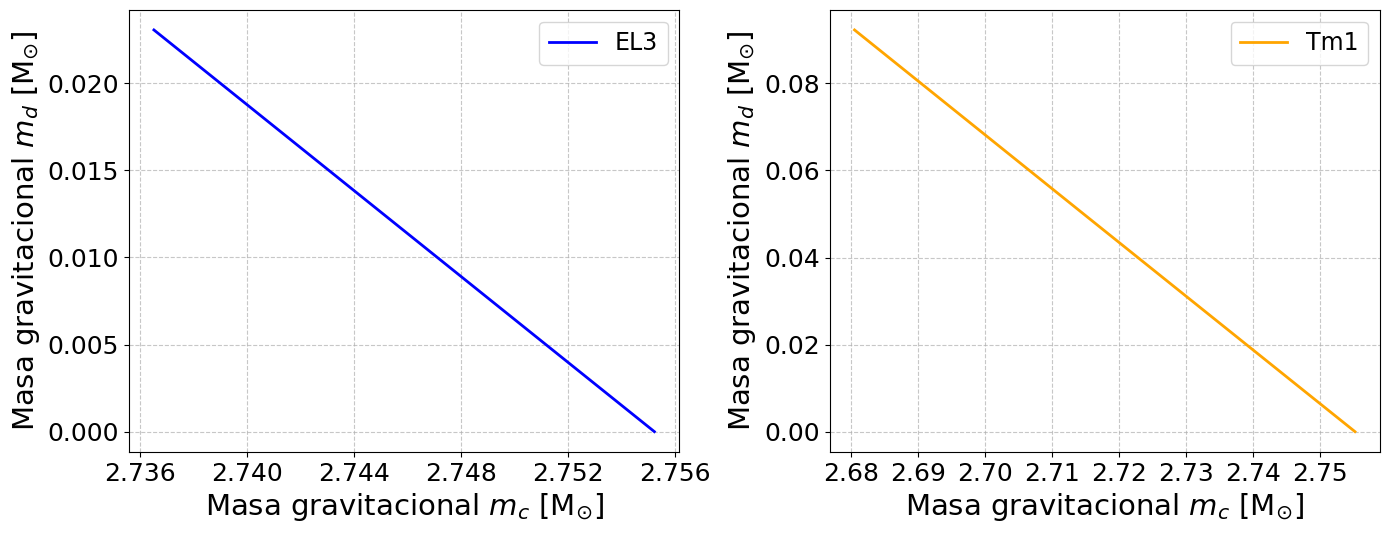

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  # Importar herramientas de formato


# Crear una figura con dos subplots
plt.figure(figsize=(14, 10))

# Subplot 1 (Tercer subplot original)
plt.subplot(2, 2, 1)
plt.plot(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1], mdGm11_values_real, '-', color='blue', label='EL3', linewidth=2)
plt.xlabel(r'Masa gravitacional $m_c$ [M$_{\odot}$]', fontsize=21)
plt.ylabel(r'Masa gravitacional $m_d$ [M$_{\odot}$]', fontsize=21)
plt.legend(fontsize=17, loc='upper right')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(linestyle='--', alpha=0.7)

# Formatear los ejes para mostrar 3 decimales y un paso de 0.005
ax1 = plt.gca()  # Obtener el eje actual
ax1.xaxis.set_major_locator(MultipleLocator(0.004))  # Paso de 0.005 en el eje X
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # 3 decimales en el eje X
#ax1.yaxis.set_major_locator(MultipleLocator(0.005))  # Paso de 0.005 en el eje Y
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # 3 decimales en el eje Y

# Subplot 2 (Cuarto subplot original)
plt.subplot(2, 2, 2)
plt.plot(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1], mdTm11_values_real, '-', color='orange', label='Tm1', linewidth=2)
plt.xlabel(r'Masa gravitacional $m_c$ [M$_{\odot}$]', fontsize=21)
plt.ylabel(r'Masa gravitacional $m_d$ [M$_{\odot}$]', fontsize=21)
plt.legend(fontsize=17, loc='upper right')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(linestyle='--', alpha=0.7)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Guardar la figura en formato PDF
plt.savefig('md_vs_mc_plots2.pdf', format='pdf', bbox_inches='tight')

# Mostrar la figura
plt.show()

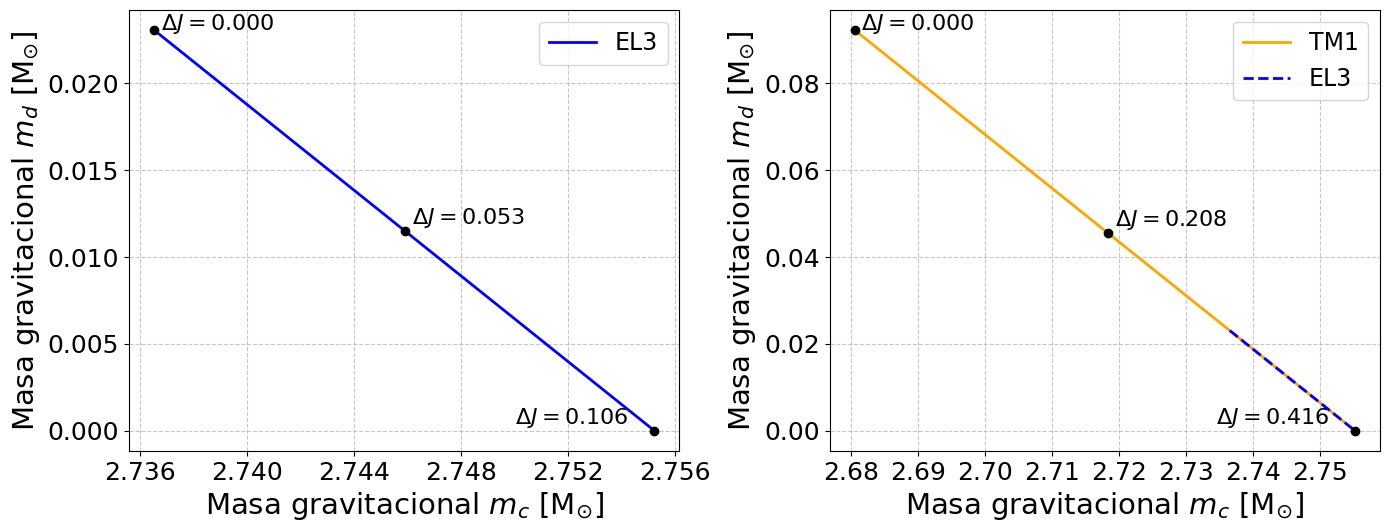

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Crear una figura con dos subplots
plt.figure(figsize=(14, 10))

# === Subplot 1: EL3 ===
plt.subplot(2, 2, 1)
plt.plot(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1], mdGm11_values_real, '-', color='blue', label='EL3', linewidth=2)
plt.xlabel(r'Masa gravitacional $m_c$ [M$_{\odot}$]', fontsize=21)
plt.ylabel(r'Masa gravitacional $m_d$ [M$_{\odot}$]', fontsize=21)
plt.legend(fontsize=17, loc='upper right')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(linestyle='--', alpha=0.7)

# Formato de ejes
ax1 = plt.gca()
ax1.xaxis.set_major_locator(MultipleLocator(0.004))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# Anotaciones EL3
indices_Gm11 = [0,
                len(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1]) // 2,
                len(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1]) - 1]

deltaJ_Gm11 = [r'$\Delta J = 0.000$', r'$\Delta J = 0.053$', r'$\Delta J = 0.106$']
offsets_Gm11 = [(5, 0), (5, 5), (-100, 5)]  # El último hacia la izquierda

for i, label, offset in zip(indices_Gm11, deltaJ_Gm11, offsets_Gm11):
    x = mc_solutionGm11[i]
    y = mdGm11_values_real[i]
    ax1.plot(x, y, 'o', color='black')  # punto negro
    ax1.annotate(label, xy=(x, y), xytext=offset, textcoords='offset points',
                 fontsize=16, color='black')

# === Subplot 2: TM1 ===
plt.subplot(2, 2, 2)
plt.plot(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1], mdTm11_values_real, '-', color='orange', label='TM1', linewidth=2)
plt.plot(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1], mdGm11_values_real, '--', color='blue', label='EL3', linewidth=2)
plt.xlabel(r'Masa gravitacional $m_c$ [M$_{\odot}$]', fontsize=21)
plt.ylabel(r'Masa gravitacional $m_d$ [M$_{\odot}$]', fontsize=21)
plt.legend(fontsize=17, loc='upper right')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(linestyle='--', alpha=0.7)

# Anotaciones TM1
indices_Tm11 = [0,
                len(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1]) // 2,
                len(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1]) - 1]

deltaJ_Tm11 = [r'$\Delta J = 0.000$', r'$\Delta J = 0.208$', r'$\Delta J = 0.416$']
offsets_Tm11 = [(5, 0), (5, 5), (-100, 5)]  # Último desplazado a la izquierda

for i, label, offset in zip(indices_Tm11, deltaJ_Tm11, offsets_Tm11):
    x = mc_solutionTm11[i]
    y = mdTm11_values_real[i]
    ax2 = plt.gca()
    ax2.plot(x, y, 'o', color='black')  # punto negro
    ax2.annotate(label, xy=(x, y), xytext=offset, textcoords='offset points',
                 fontsize=16, color='black')

# Ajustar el layout
plt.tight_layout()
plt.savefig('md_vs_mc_plots2.pdf', format='pdf', bbox_inches='tight')
plt.show()



In [ ]:
%matplotlib inline

In [ ]:
#mdTm11_values[0:indice_ultimo_valor_positivo_Tm11+1]
#mdTm11_values[0]
#mdGm11_values[0:indice_ultimo_valor_positivo_Gm11+1]
#mdGm11_values[0]
#mc_solutionTm11[0]
mc_solutionGm11[indice_ultimo_valor_positivo_Gm11+1]

np.float64(2.7553077618309922)

In [ ]:
#Verificando

#mdTm11_values[0:indice_ultimo_valor_positivo_Tm11+1]
#mdTm11_values[0]
#mdGm11_values[0:indice_ultimo_valor_positivo_Gm11+1]
#mdGm11_values[0]

len(deltaJ_values_Gm11)
[deltaJ_values_Gm11[0]/(sci.G*Msun**2/sci.c),deltaJ_values_Gm11[int(len(deltaJ_values_Gm11)/2)]/(sci.G*Msun**2/sci.c),deltaJ_values_Gm11[-1]/(sci.G*Msun**2/sci.c)]

[np.float64(0.0),
 np.float64(0.05305305305305306),
 np.float64(0.10610610610610612)]

In [ ]:
len(deltaJ_values_Tm11)
[deltaJ_values_Tm11[0]/(sci.G*Msun**2/sci.c),deltaJ_values_Tm11[int(len(deltaJ_values_Tm11)/2)]/(sci.G*Msun**2/sci.c),deltaJ_values_Tm11[-1]/(sci.G*Msun**2/sci.c)]

## E_other

In [ ]:
print('1) Efectivamente la masa del remanente central concuerda con Universe para $\Delta J=0$ y corresponde a',mc_solutionGm11[0])
print('2) Efectivamente para este valor de masa del remanente central, la masa del disco es máxima y corresponde a',mdGm11_values_real[0])
print('3) Para estos valores es intuitivo pensar que la emisión de ondas gravitacionales es nula, sin embargo el momento angular inicial se toma como si las estrellas estuvieran en el infinito, así que ¿Por qué Egw es cero si durante la fase espiral se emiten ondas gravitacionales? (Solo me queda pensar que la masa gravitacional dada en el artículo corresponde a justo antes de la fusión, ¿correcto?)')
print('4) Se procede a verificar el valor de E_other=', 2.909-(mc_solutionGm11[0]+mdGm11_values_real[0]),'c^2 recordad que acá la masa del disco es máxima y se dice que por lo tanto la emisión de ondas se apaga y que esta energía sería por lo tanto la máxima entrega como E_other')
print('5) A continuación verificaré el comportamiento general de E_other')

1) Efectivamente la masa del remanente central concuerda con Universe para $\Delta J=0$ y corresponde a 2.736517488452039
2) Efectivamente para este valor de masa del remanente central, la masa del disco es máxima y corresponde a 0.023060259166353354
3) Para estos valores es intuitivo pensar que la emisión de ondas gravitacionales es nula, sin embargo el momento angular inicial se toma como si las estrellas estuvieran en el infinito, así que ¿Por qué Egw es cero si durante la fase espiral se emiten ondas gravitacionales? (Solo me queda pensar que la masa gravitacional dada en el artículo corresponde a justo antes de la fusión, ¿correcto?)
4) Se procede a verificar el valor de E_other= 0.14942225238160756 c^2 recordad que acá la masa del disco es máxima y se dice que por lo tanto la emisión de ondas se apaga y que esta energía sería por lo tanto la máxima entrega como E_other
5) A continuación verificaré el comportamiento general de E_other


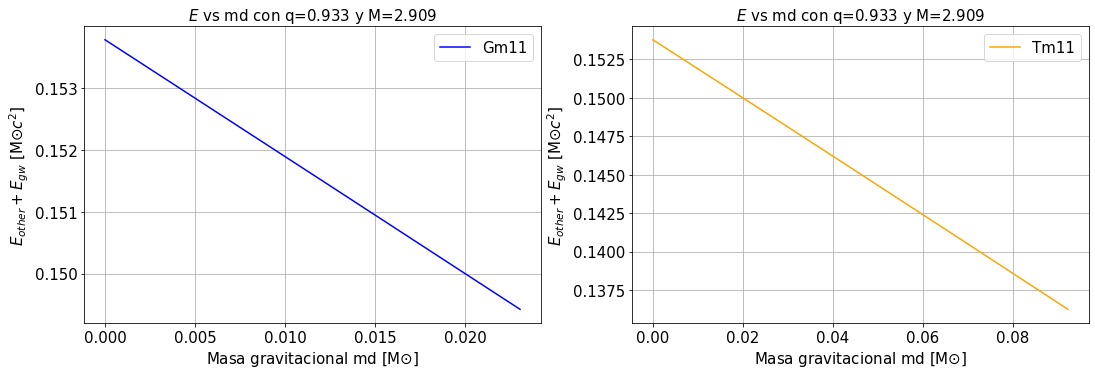

In [ ]:
E_otherGm11=2.909-(mc_solutionGm11[0:indice_ultimo_valor_positivo_Gm11+1]+mdGm11_values_real)
E_otherTm11=2.909-(mc_solutionTm11[0:indice_ultimo_valor_positivo_Tm11+1]+mdTm11_values_real)

plt.figure(figsize=(18, 12))

# Subplot 1
plt.subplot(2, 2, 1)
plt.plot(mdGm11_values_real,E_otherGm11, 'b-', label='Gm11')
plt.title('$E$ vs md con q=0.933 y M=2.909', fontsize=15)
plt.xlabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.ylabel('$E_{other}+E_{gw}$ [M$\odot c^2$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Subplot 2
plt.subplot(2, 2, 2)
plt.plot(mdTm11_values_real,E_otherTm11, '-', color='orange', label='Tm11')
plt.title('$E$ vs md con q=0.933 y M=2.909', fontsize=15)
plt.xlabel('Masa gravitacional md [M$\odot$]', fontsize=15)
plt.ylabel('$E_{other}+E_{gw}$ [M$\odot c^2$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

In [ ]:
print('¿Por qué hablar de upper limit cuando md es máximo si de por si la relación E_other+E_gw cambia?(creería que hay que tomar en  cuenta algo más para poder afirmar lo que se dice en Universe)')

¿Por qué hablar de upper limit cuando md es máximo si de por si la relación E_other+E_gw cambia?(creería que hay que tomar en  cuenta algo más para poder afirmar lo que se dice en Universe)


## Más sobre la energía caso de TM1 Universe

### VOLVER A CORRER FUNCIONES DE EOS AL INICIO!!!

In [ ]:
R11=f3(np.array(1.505/(2*10**30),dtype=np.float64))
R22=f3(np.array(1.404/(2*10**30),dtype=np.float64))
rcont=R11+R22
M11=1.505*2*10**30
M22=1.404*2*10**30
Mcentral=2.756*2*10**30

fcontact=(1/(2*np.pi)) * np.sqrt((sci.G*(M11+M22))/(rcont**3))

Einmersion=sci.G*((M11)*(M22))/(2*rcont)

print('E_{inmersión}=',Einmersion,'[Jules] lo que equivale a',Einmersion*10**7,'[ergs]')

deltaM=((M11+M22)-Mc)*sci.c**2

print('El defecto de masa es',deltaM,'[Jules] lo que equivale a',deltaM*10**7,'[ergs]')

print('El radio de contacto es',rcont)

print('la frecuencia correspondiente es fcontact=',fcontact)

risco=(6*sci.G*(10**6 * 2*(10**30))/(sci.c**2))
fisco=(1/(2*np.pi)) * np.sqrt((sci.G*(10**6 * 2*(10**30)))/(risco**3))

print('risco de bh-bh es,',risco,'metros, es decir',risco/1000,'km')

print('la frecuencia correspondiente es fisco=',fisco)


R222=f3(np.array(1.404/(2*10**30),dtype=np.float64))

rms=(0.27**(-2/3)) * (0.4666**(-1/3)) * R222

risco=(6*sci.G*(4.4 * 2*(10**30))/(sci.c**2))

fms=(1/(2*np.pi)) * np.sqrt((sci.G*(4.4 * 2 * 10**30))/(rms**3))


print('para bh-ns de 1,4 y 3 M_odot se tiene que el radio, la rms, risco son respectivamente:', R222, rms,risco,'todo en metros')

print('la frecuencia correspondiente es fms=',fms)

Mc1=(((M11*M22)**(3/5)) * (M11+M22)**(-1/5))

M11=3*10**5*2*10**30
M22=7*10**5*2*10**30

Mc2=(((M11*M22)**(3/5)) * (M11+M22)**(-1/5))


M11=1.4*2*10**30
M22=3*2*10**30

Mc3=(((M11*M22)**(3/5)) * (M11+M22)**(-1/5))

print('Las masas de chirrido en orden son en kg',Mc1/(2*10**30),Mc2/(2*10**30),Mc3/(2*10**30))

Erad1=(((np.pi * sci.G)**(2/3) * Mc1**(5/3))/2 ) * fcontact**(2/3)

Erad2=(((np.pi * sci.G)**(2/3) * Mc2**(5/3))/2 ) * fisco**(2/3)

Erad3=(((np.pi * sci.G)**(2/3) * Mc3**(5/3))/2 ) * fms**(2/3)

print('Las energías radiadas durante esta fase corresponden a:',Erad1,Erad2,Erad3)



##########EL3

q=0.9333

def C2(m1):
    #r12=func(q*m1, *popt1)
    r12=f3(np.array(q*m1,dtype=np.float64))
    C2=sci.G*(q*m1)/(((sci.c)**2)*r12)
    return C2

def r12(m1): # tuve que definirla aparte porque ahora si usaremos esta función aparte, no solo para definir C2 como anteriormente
    #r12=func(q*m1, *popt1)
    r12=f3(np.array(q*m1,dtype=np.float64))

    return r12

m111=1.505*2*10**30
m222=1.404*2*10**30
MTOT=m111+m222
nuuu=m111*m222/(MTOT**2)

C1=sci.G*m111/(((sci.c)**2)*f3(np.array(m111,dtype=np.float64)))

J=(nuuu*sci.G*(MTOT**2)/(sci.c))*np.sqrt((C2(m111) + q*C1)/(1+ (q*C1*C2(m111))))

print('El momento Jmerger para EL3 es',J/(sci.G * (2*10**30)**2 * 1/sci.c),'sci.GM_{\odot}**2/c')
print(C2(m111))

E_{inmersión}= 8.674536854548736e+45 [Jules] lo que equivale a 8.674536854548736e+52 [ergs]
El defecto de masa es 2.7501908469346587e+46 [Jules] lo que equivale a 2.7501908469346585e+53 [ergs]
El radio de contacto es 32515.694203557934
la frecuencia correspondiente es fcontact= 534.8971773261216
risco de bh-bh es, 8911392322.942398 metros, es decir 8911392.322942398 km
la frecuencia correspondiente es fisco= 0.0021858464243086394
para bh-ns de 1,4 y 3 M_odot se tiene que el radio, la rms, risco son respectivamente: 16257.847101778967 50177.1065191901 39210.12622094656 todo en metros
la frecuencia correspondiente es fms= 343.1673085864521
Las masas de chirrido en orden son en kg 1.2652997446207022 392041.07992363436 1.758972456445069
Las energías radiadas durante esta fase corresponden a: 5.4646157905674035e+45 1.9816309946869537e+51 7.038704484167238e+45
El momento Jmerger para EL3 es 1.125027636342598 sci.GM_{\odot}**2/c
0.14434925634934564


## Gw_170817

In [ ]:
#datos a emplear, acá el primer número indica la dupla y el segundo número la estrella

# PRIMERA DUPLA
gw17_1_m1=1.400
gw17_1_m2=1.330

gw17_1_Mchirp=((gw17_1_m1*gw17_1_m2)**(3/5))/((gw17_1_m1+gw17_1_m2)**(1/5))
gw17_1_q=gw17_1_m2/gw17_1_m1
gw17_1_mtot=gw17_1_m1+gw17_1_m2

print('CASO 1')
print('Mchirp debe valer 1.188:',gw17_1_Mchirp)
print('q debe valer 0.95:',gw17_1_q)
print('mtot debe valer entre 2.73 y 2.78:',gw17_1_mtot)

############################################################

#SEGUNDA DUPLA

gw17_2_m1=1.480
gw17_2_m2=1.258

gw17_2_Mchirp=((gw17_2_m1*gw17_2_m2)**(3/5))/((gw17_2_m1+gw17_2_m2)**(1/5))
gw17_2_q=gw17_2_m2/gw17_2_m1
gw17_2_mtot=gw17_2_m1+gw17_2_m2

print('CASO 2')
print('Mchirp debe valer 1.188:',gw17_2_Mchirp)
print('q debe valer 0.85:',gw17_2_q)
print('mtot debe valer entre 2.73 y 2.78:',gw17_2_mtot)

############################################################

#TERCERA DUPLA

gw17_3_m1=1.577
gw17_3_m2=1.183

gw17_3_Mchirp=((gw17_3_m1*gw17_3_m2)**(3/5))/((gw17_3_m1+gw17_3_m2)**(1/5))
gw17_3_q=gw17_3_m2/gw17_3_m1
gw17_3_mtot=gw17_3_m1+gw17_3_m2

print('CASO 3')
print('Mchirp debe valer 1.188:',gw17_3_Mchirp)
print('q debe valer 0.75:',gw17_3_q)
print('mtot debe valer entre 2.73 y 2.78:',gw17_3_mtot)

CASO 1
Mchirp debe valer 1.188: 1.1878326992465371
q debe valer 0.95: 0.9500000000000001
mtot debe valer entre 2.73 y 2.78: 2.73
CASO 2
Mchirp debe valer 1.188: 1.187076548100062
q debe valer 0.85: 0.85
mtot debe valer entre 2.73 y 2.78: 2.738
CASO 3
Mchirp debe valer 1.188: 1.186610115805832
q debe valer 0.75: 0.7501585288522512
mtot debe valer entre 2.73 y 2.78: 2.76


### Masa del objeto central para gw170817 sin masa del disco

In [ ]:
from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun
Msun = 1

# Resolver para gw17_1_m1
q = gw17_1_q
m11 = gw17_1_m1
mc_solution_1 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Resolver para gw17_2_m1
q = gw17_2_q
m11 = gw17_2_m1
mc_solution_2 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Resolver para gw17_3_m1
q = gw17_3_q
m11 = gw17_3_m1
mc_solution_3 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Imprimir las soluciones
print(f"Solución para gw17_1_m1: mc = {mc_solution_1}")
print(f"Solución para gw17_2_m1: mc = {mc_solution_2}")
print(f"Solución para gw17_3_m1: mc = {mc_solution_3}")
print('Ojo, esto es para j=0.7 y sin masa del disco')
print('Necesito jmerger de este evento para obtener el resto de datos')

Solución para gw17_1_m1: mc = 2.5838724971968485
Solución para gw17_2_m1: mc = 2.59262858014567
Solución para gw17_3_m1: mc = 2.616314026391562
Ojo, esto es para j=0.7 y sin masa del disco
Necesito jmerger de este evento para obtener el resto de datos


### Jmerger para cada dupla

In [ ]:
#### este es para q cercano a 1

def jmerger1(nu,q,C1,C2,m1,m2):
    return nu * np.sqrt((C2+q*C1)/((1+q)*C1*C2))  * ((m1+m2)**2)

#### este es para q menor que 1

def jmerger2(nu,q,C1,C2,m1,m2):
    return nu * q**(1/3) * ((2.2)**(-1) * (1+q)*C2)**(-1/2) * ((m1+m2)**2)

###Antes de comenzar, ya que f1,f2,f3 ajustan con unidades normales y lo mismo como se define C1 y C2 entonces
### redefiniremos nuestras masas de interés:

gw17_1_m1=1.400
gw17_1_m2=1.330
#gw17_1_m1=1.505
#gw17_1_m2=1.404

gw17_2_m1=1.480
gw17_2_m2=1.258

gw17_3_m1=1.577
gw17_3_m2=1.183

gw17_1_m1=gw17_1_m1*(2*10**30)
gw17_1_m2=gw17_1_m2*2*10**30

gw17_2_m1=gw17_2_m1*2*10**30
gw17_2_m2=gw17_2_m2*2*10**30

gw17_3_m1=gw17_3_m1*2*10**30
gw17_3_m2=gw17_3_m2*2*10**30

###((primer numero para referirse a la dupla, segundo número para referirse a la estrella))!!

###################### PRIMERA E.O.S ########################

q1=0.95 # dupla 1
q2=0.85 # dupla 2
q3=0.75 # dupla 3

##### Primera dupla q=0.95 ########

r11=f1(gw17_1_m1)
r12=f1(q1*gw17_1_m1)
nu1=q1/(1+q1)**2 ### nu1 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C11=sci.G*(gw17_1_m1)/((sci.c**2)*r11)
C12=sci.G*(gw17_1_m2)/((sci.c**2)*r12)

##### Segunda dupla q=0.85 ########

r21=f1(gw17_2_m1)
r22=f1(q2*gw17_2_m1)
nu2=q2/(1+q2)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C21=sci.G*(gw17_2_m1)/((sci.c**2)*r21)
C22=sci.G*(gw17_2_m2)/((sci.c**2)*r22)

##### Tercera dupla q=0.75 ########

r31=f1(gw17_3_m1)
r32=f1(q3*gw17_3_m1)
nu3=q3/(1+q3)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C31=sci.G*(gw17_3_m1)/((sci.c**2)*r31)
C32=sci.G*(gw17_3_m2)/((sci.c**2)*r32)

### La notación (PARA JMERGER) será primer número la ecuación de estado, segundo número la dupla

Jmerger11= jmerger1(nu1,q1,C11,C12,gw17_1_m1,q1*gw17_1_m1)
Jmerger12= jmerger2(nu2,q2,C21,C22,gw17_2_m1,q2*gw17_2_m1)
Jmerger13= jmerger2(nu3,q3,C31,C32,gw17_3_m1,q3*gw17_3_m1)

###################### SEGUNDA E.O.S ########################

q1=0.95 # dupla 1
q2=0.85 # dupla 2
q3=0.75 # dupla 3

##### Primera dupla q=0.95 ########

r11=f2(gw17_1_m1)
r12=f2(q1*gw17_1_m1)
nu1=q1/(1+q1)**2 ### nu1 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C11=sci.G*(gw17_1_m1)/((sci.c**2)*r11)
C12=sci.G*(gw17_1_m2)/((sci.c**2)*r12)

##### Segunda dupla q=0.85 ########

r21=f2(gw17_2_m1)
r22=f2(q2*gw17_2_m1)
nu2=q2/(1+q2)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C21=sci.G*(gw17_2_m1)/((sci.c**2)*r21)
C22=sci.G*(gw17_2_m2)/((sci.c**2)*r22)

##### Tercera dupla q=0.75 ########

r31=f2(gw17_3_m1)
r32=f2(q3*gw17_3_m1)
nu3=q3/(1+q3)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C31=sci.G*(gw17_3_m1)/((sci.c**2)*r31)
C32=sci.G*(gw17_3_m2)/((sci.c**2)*r32)

### La notación (PARA JMERGER) será primer número la ecuación de estado, segundo número la dupla

Jmerger21= jmerger1(nu1,q1,C11,C12,gw17_1_m1,q1*gw17_1_m1)
Jmerger22= jmerger2(nu2,q2,C21,C22,gw17_2_m1,q2*gw17_2_m1)
Jmerger23= jmerger2(nu3,q3,C31,C32,gw17_3_m1,q3*gw17_3_m1)

###################### TERCERA E.O.S ########################

q1=0.95 # dupla 1
q2=0.85 # dupla 2
q3=0.75 # dupla 3

##### Primera dupla q=0.95 ########

r11=f3(gw17_1_m1)
r12=f3(q1*gw17_1_m1)
nu1=q1/(1+q1)**2 ### nu1 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C11=sci.G*(gw17_1_m1)/((sci.c**2)*r11)
C12=sci.G*(gw17_1_m2)/((sci.c**2)*r12)

##### Segunda dupla q=0.85 ########

r21=f3(gw17_2_m1)
r22=f3(q2*gw17_2_m1)
nu2=q2/(1+q2)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C21=sci.G*(gw17_2_m1)/((sci.c**2)*r21)
C22=sci.G*(gw17_2_m2)/((sci.c**2)*r22)

##### Tercera dupla q=0.75 ########

r31=f3(gw17_3_m1)
r32=f3(q3*gw17_3_m1)
nu3=q3/(1+q3)**2 ### nu2 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C31=sci.G*(gw17_3_m1)/((sci.c**2)*r31)
C32=sci.G*(gw17_3_m2)/((sci.c**2)*r32)

### La notación (PARA JMERGER) será primer número la ecuación de estado, segundo número la dupla

Jmerger31= jmerger1(nu1,q1,C11,C12,gw17_1_m1,q1*gw17_1_m1)
Jmerger32= jmerger2(nu2,q2,C21,C22,gw17_2_m1,q2*gw17_2_m1)
Jmerger33= jmerger2(nu3,q3,C31,C32,gw17_3_m1,q3*gw17_3_m1)


################################################## dupla de UNIVERSE######################

###################### EL3 ########################

q1=0.933 # dupla 1
m111=1.505*2*10*30
m222=1.404*2*10*30
##### Primera dupla q=0.95 ########

r11=f1(m111)
r12=f1(q1*m111)
nu1=q1/(1+q1)**2 ### nu1 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C11=sci.G*(m111)/((sci.c**2)*r11)
C12=sci.G*(m222)/((sci.c**2)*r12)

JmergerEL3= jmerger1(nu1,q1,C11,C12,m111,m222)

###################### TM1 ########################

q1=0.933 # dupla 1
m111=1.505*2*10*30
m222=1.404*2*10*30
##### Primera dupla q=0.95 ########

r11=f3(m111)
r12=f3(q1*m111)
nu1=q1/(1+q1)**2 ### nu1 solo tiene un número porque es un valor característico de la dupla, no de la estrella como tal
C11=sci.G*(m111)/((sci.c**2)*r11)
C12=sci.G*(m222)/((sci.c**2)*r12)

JmergerTM1= jmerger1(nu1,q1,C11,C12,m111,m222)


### FINALMENTE

Jmergers=[Jmerger11, Jmerger12, Jmerger13, Jmerger21, Jmerger22, Jmerger23, Jmerger31, Jmerger32, Jmerger33]

Jmergers = [x/((2*10**30)**2) for x in Jmergers]

print('Lo que cambia al variar las E.O.S son las funciones f1, f2 y f3 que corresponden a los respecivos ajustes radio-masa\n')
print('Se obtuvieron entonces 9 valores de Jmerger como era de esperarse, ya que se tienen 3 duplas y cada dupla con 3 posibles E.O.S\n')
print('Estos valores son:',Jmergers,'los cuales tienen unidades de GMsun^2/c\n')
print('Observese que se obtuvieron valores en el mismo orden de magnitud que se encuentran reportados en la literatura ej:Universe\n')
print('Ya que se tiene Jmerger podemos tomar algún caso específico y obtener todos los datos de nuestro interés')
print(np.max(Jmergers))

Lo que cambia al variar las E.O.S son las funciones f1, f2 y f3 que corresponden a los respecivos ajustes radio-masa

Se obtuvieron entonces 9 valores de Jmerger como era de esperarse, ya que se tienen 3 duplas y cada dupla con 3 posibles E.O.S

Estos valores son: [4.6987066799051505, 5.058543189119703, 5.1552979081516135, 4.841757778610861, 5.192830088245905, 5.278094216992555, 4.975672483294273, 5.364946199380598, 5.473005391726781] los cuales tienen unidades de GMsun^2/c

Observese que se obtuvieron valores en el mismo orden de magnitud que se encuentran reportados en la literatura ej:Universe

Ya que se tiene Jmerger podemos tomar algún caso específico y obtener todos los datos de nuestro interés
5.473005391726781


In [ ]:
# Más adelante los necesitaremos en este orden de magnitud
Jmerger11=Jmergers[0]
Jmerger12=Jmergers[1]
Jmerger13=Jmergers[2]
Jmerger21=Jmergers[3]
Jmerger22=Jmergers[4]
Jmerger23=Jmergers[5]
Jmerger31=Jmergers[6]
Jmerger32=Jmergers[7]
Jmerger33=Jmergers[8]

# Recordemos las duplas:
gw17_1_m1=1.400 # Dupla 1 q=0.95
gw17_1_m2=1.330 # Dupla 1 q=0.95
Mt1=gw17_1_m1+gw17_1_m2

gw17_2_m1=1.480 # Dupla 2 q=0.85
gw17_2_m2=1.258 # Dupla 2 q=0.85
Mt2=gw17_2_m1+gw17_2_m2

gw17_3_m1=1.577 # Dupla 3 q=0.75
gw17_3_m2=1.183 # Dupla 3 q=0.75
Mt3=gw17_3_m1+gw17_3_m2

# E_other para las 9 duplas, (md=máximo so deltaj=0) y jc=0.7
## Para ello debemos emplear el código que determina la masa del disco en función de las masas de los objetos en cuestión y el Jmerger

In [ ]:
# ¡IMPORTANTE!: ACÁ SE DEBE CAMBIAR q, m11 y Jmergerdupla ACORDE A LA DUPLA EN CUESTIÓN y e.o.s Jmerger12 es e.o.s 1 y dupla 2

from scipy.optimize import brentq
import numpy as np

# Definir la función OBSERVESE QUE LA ECUACIÓN IMPLICA QUE jc=0.7
def equation(mc, m11, Msun, q, Jmerger, deltaJ):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) + (sci.c*(Jmerger - 0.7*sci.G*(mc**2)/sci.c -deltaJ)/(sci.G*mc*(2*np.sqrt(3) - 0.37 * (0.7*mc/Msun)**0.85)))/Msun - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun, q y md
Msun = 1
q = 0.75
m11=gw17_3_m1
#q=0.9333
#m11=2.909/(1+q)
# Valores de Jmerger, deltaJ y md

Jmergerdupla=Jmerger33*(sci.G*(Msun**2)/sci.c)
#Jmergerdupla=5.65*(sci.G*(Msun**2)/sci.c)

deltaJ_values=np.linspace(0, 5*(sci.G*(Msun**2)/sci.c), 10000) #Definimos un rango arbitrario, el mínimo valor evidentemente es cero, y el máximo será aquel que haga que md sea cero

# Solución para cada valor de deltaJ con la E.O.S dupla
mc_solution = []
for deltaJ in deltaJ_values:
    root = brentq(equation, 2, 5, args=(m11, Msun, q, Jmergerdupla,deltaJ))
    mc_solution.append(root)

mc_solutiondupla = np.array(mc_solution)

#Tenemos mc, por lo tanto ahora tenemos md y escogemos valores físicamente aceptables

mddupla_values = sci.c*(Jmergerdupla - 0.7*sci.G*(mc_solutiondupla**2)/sci.c -deltaJ_values)/(sci.G*mc_solutiondupla*(2*np.sqrt(3) - 0.37 * (0.7*mc_solutiondupla/Msun)**0.85))

############ Nos quedamos con los valores físicamente aceptables (mdisk>0)

# Encuentra el índice del último valor mayor que cero para mddupla
indice_ultimo_valor_positivo_dupla = -1
for i, valor in enumerate(mddupla_values):
    if valor > 0:
        indice_ultimo_valor_positivo_dupla = i

# Verifica si se encontró un valor mayor que cero
if indice_ultimo_valor_positivo_dupla != -1:
    mddupla_values_real = mddupla_values[:indice_ultimo_valor_positivo_dupla + 1]
    deltaJ_values_real= deltaJ_values[:indice_ultimo_valor_positivo_dupla + 1]
else:
    mddupla_values_real = []
    deltaJ_values_real=[]

mc_solutiondupla=mc_solutiondupla[:indice_ultimo_valor_positivo_dupla + 1]
print('Si vamos bien la siguiente operación debería dar 0.139 para q=0.933, m11=2.909/(1+q) y Jmergerdupla=5.65:',2.909-(mc_solutiondupla[0]+mddupla_values_real[0]))
print('DeltaJ max=',deltaJ_values_real[:indice_ultimo_valor_positivo_dupla + 1][-1]/(sci.G*Msun**2/sci.c),'DeltaJ min=',deltaJ_values_real[:indice_ultimo_valor_positivo_dupla + 1][0]/(sci.G*Msun**2/sci.c))

Si vamos bien la siguiente operación debería dar 0.139 para q=0.933, m11=2.909/(1+q) y Jmergerdupla=5.65: 0.2617796993660959
DeltaJ max= 0.682068206820682 DeltaJ min= 0.0


In [ ]:
#mc_solutiondupla
#mddupla_values_real

In [ ]:
#mddupla_values_real[0] #Acá se coge la masa del disco máxima
#mc_solutiondupla[0] #Le corresponde la masa central mínima
#deltaJ_values_real[0] #Le corresponde deltaJ=0
print('la masa del disco máxima será',mddupla_values_real[0], 'su masa central será la mínima',mc_solutiondupla[0],'DeltaJ será cero',deltaJ_values_real[0])
print('la masa del disco mínima será',mddupla_values_real[-1],'su masa central será la máxima',mc_solutiondupla[-1],'DeltaJ será',deltaJ_values_real[-1]/(sci.G*Msun**2/sci.c))

la masa del disco máxima será 0.1599883458479246 su masa central será la mínima 2.487231954785979 DeltaJ será cero 0.0
la masa del disco mínima será 4.900263955031018e-05 su masa central será la máxima 2.616041839478104 DeltaJ será 0.682068206820682


In [ ]:
# La notación como antes es primer número corresponde a la e.o.s y segundo número corresponde a la dupla, así mdij corresponde
# con Jmergerij

####################### md=max deltaJ=0

md11=5.67498017e-03
md12=0.08123875448553257
md13=0.08336455210591086
md21=3.82457442e-02
md22=0.11330167708988897
md23=0.1125004425667623
md31=6.93741573e-02
md32=0.15547967867789994
md33=0.1599883458479246

mc11=2.5792994758029355
mc12=2.5271958437151034
mc13=2.548900718985119
mc21=2.5530627912826005
mc22=2.5013927334378123
mc23=2.525444671915484
mc31=2.528001118641551
mc32=2.4674610823463508
mc33=2.487231954785979

########################### deltaJ máximos, es decir md=0

dJ11=0.025002500250025
dJ12=0.353035303530
dJ13=0.3645364536453645
dJ21=0.16801680168016803
dJ22=0.4875487548754876
dJ23=0.487048704870487
dJ31=0.30203020302030203
dJ32=0.6595659565956595
dJ33=0.682068206820682

#mc11=2.5838315614464062
#mc12=2.592574072830945
#mc13=2.616073413493825
#mc21=2.5838249027294693
#mc22=2.592614987690915
#mc23=2.6160223756349903
#mc31=2.583842762484691
#mc32=2.5925971250096707
#mc33=2.616041839478104

print('Aunque a priori la masa central no depende de la ecuación de estado. Debemos recordar que la masa del disco afecta la masa del objeto central. Y como la masa del disco depende de Jmerger el cual si depende de la ecuación de estado, entonces todo termina dependiendo de la dupla y la e.o.s')
# La notación como antes es primer número corresponde a la e.o.s y segundo número corresponde a la dupla, así mdij corresponde
# con Jmergerij

Aunque a priori la masa central no depende de la ecuación de estado. Debemos recordar que la masa del disco afecta la masa del objeto central. Y como la masa del disco depende de Jmerger el cual si depende de la ecuación de estado, entonces todo termina dependiendo de la dupla y la e.o.s


In [ ]:
print('Según universe la masa del objeto central final corresponde a Jc=0.7(Mc)**2 G/c, por lo tanto en nuestro caso corresponden a:')
print('Jcmin=',((2.467*2*10**30)**2)*(sci.G/sci.c)*0.7)
print('Jcmax=',((2.616*2*10**30)**2)*(sci.G/sci.c)*0.7)

Según universe la masa del objeto central final corresponde a Jc=0.7(Mc)**2 G/c, por lo tanto en nuestro caso corresponden a:
Jcmin= 3.7938604404637816e+42
Jcmax= 4.2659772136842727e+42


In [ ]:
# Recordemos las duplas:
gw17_1_m1=1.400 # Dupla 1 q=0.95
gw17_1_m2=1.330 # Dupla 1 q=0.95
Mt1=gw17_1_m1+gw17_1_m2

gw17_2_m1=1.480 # Dupla 2 q=0.85
gw17_2_m2=1.258 # Dupla 2 q=0.85
Mt2=gw17_2_m1+gw17_2_m2

gw17_3_m1=1.577 # Dupla 3 q=0.75
gw17_3_m2=1.183 # Dupla 3 q=0.75
Mt3=gw17_3_m1+gw17_3_m2

def fEother(Mtotal,masacentral,masadisco):
    return Mtotal-(masacentral+masadisco) # Mirar ecuación11 de Universe

#fEother(1.5049,0.933,mc_solutiondupla[0],mddupla_values_real[0]) Acá verifiqué que la función vaya bien

# La notación como antes es primer número corresponde a la e.o.s y segundo número corresponde a la dupla, por ejemplo:
# Eother11 corresponde a la energía liberada por la dupla 1 (q=0.95) y a la e.o.s 1 (el3) cuyo Jmerger es Jmerger11

Eother11=fEother(Mt1,mc11,md11)
Eother12=fEother(Mt2,mc12,md12)
Eother13=fEother(Mt3,mc13,md13)
Eother21=fEother(Mt1,mc21,md21)
Eother22=fEother(Mt2,mc22,md22)
Eother23=fEother(Mt3,mc23,md23)
Eother31=fEother(Mt1,mc31,md31)
Eother32=fEother(Mt2,mc32,md32)
Eother33=fEother(Mt3,mc33,md33)

#Eother11=fEother(Mt1,mc11,0)
#Eother12=fEother(Mt2,mc12,0)
#Eother13=fEother(Mt3,mc13,0)
#Eother21=fEother(Mt1,mc21,0)
#Eother22=fEother(Mt2,mc22,0)
#Eother23=fEother(Mt3,mc23,0)
#Eother31=fEother(Mt1,mc31,0)
#Eother32=fEother(Mt2,mc32,0)
#Eother33=fEother(Mt3,mc33,0)

E_other_9duplas=[Eother11,Eother12,Eother13,Eother21,Eother22,Eother23,Eother31,Eother32,Eother33]

In [ ]:
# para mañana llenar los datos, graficar los 9 puntos, colocar las cotas en la otra gráfica y mirar si todo es consistente con las e.o.s

In [ ]:
E_other_9duplas

[0.1450255440270647,
 0.12956540179936393,
 0.12773472890896986,
 0.13869146451739933,
 0.12330558947229875,
 0.12205488551775368,
 0.13262472405844905,
 0.11505923897574943,
 0.11277969936609589]

In [ ]:
E_other_9duplas[0:3]

[0.1450255440270647, 0.12956540179936393, 0.12773472890896986]

In [ ]:
orden=10**(-1) * 2* 10**30 * sci.c**2
print('Observese que el orden de magnitud de la energía es',orden,'Jules. Lo mismo que',orden*10**7,'ergios')

Observese que el orden de magnitud de la energía es 1.7975103574736355e+46 Jules. Lo mismo que 1.7975103574736354e+53 ergios


Observese que efectivamente a menor masa del disco mayor E other


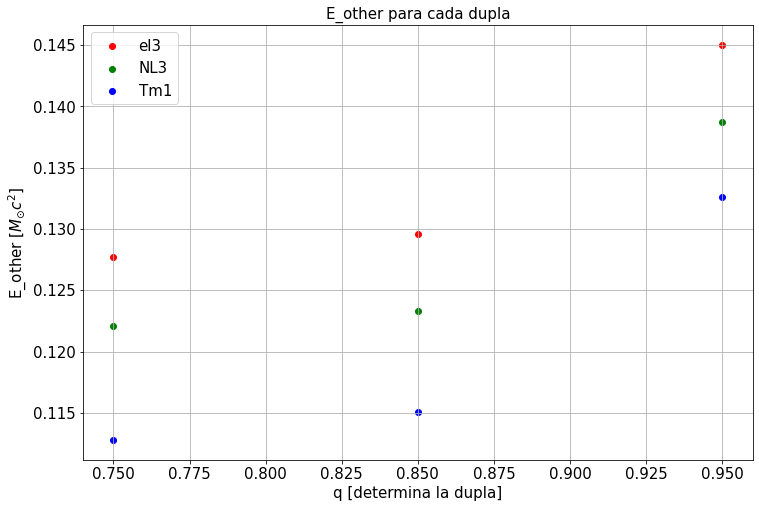

In [ ]:
qs=[0.95,0.85,0.75]

plt.figure(figsize=(12, 8))

plt.scatter(qs,E_other_9duplas[0:3], color='r', label='el3')
plt.scatter(qs,E_other_9duplas[3:6], color='g', label='NL3')
plt.scatter(qs,E_other_9duplas[6:9], color='b', label='Tm1')
plt.title('E_other para cada dupla', fontsize=15)
plt.xlabel('q [determina la dupla]', fontsize=15)
plt.ylabel('E_other [$M_{\odot}c^2$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

print('Observese que efectivamente a menor masa del disco mayor E other')

# E_other para las 9 duplas, (md=0 so deltaj=máximo) y jc=0.7
## Para ello debemos emplear únicamente el código que determina la masa del objeto central en función de las masas de los objetos en cuestión. Como no hay dependencia con la masa del disco, entonces tampoco lo hay con el Jmerger y por lo tanto el resultado es independiente de las e.o.s

In [ ]:
from scipy.optimize import brentq
import numpy as np

# Definir la función
def equation(mc, m11, Msun, q):
    return mc/Msun + 13* (mc**2)/(200*(Msun**2)) * (1 - (0.54/130)*(mc**3.4/Msun**3.4)) - (m11 + q*m11)/Msun - (13/200)*(m11**2 + q**2 * m11**2)/(Msun**2)

# Definir los valores de Msun
Msun = 1

# Resolver para gw17_1_m1
q = gw17_1_q
m11 = gw17_1_m1
mc_solution_1 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Resolver para gw17_2_m1
q = gw17_2_q
m11 = gw17_2_m1
mc_solution_2 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Resolver para gw17_3_m1
q = gw17_3_q
m11 = gw17_3_m1
mc_solution_3 = brentq(equation, 1/2, 5, args=(m11, Msun, q))

# Imprimir las soluciones
print(f"Solución para gw17_1_m1: mc = {mc_solution_1}")
print(f"Solución para gw17_2_m1: mc = {mc_solution_2}")
print(f"Solución para gw17_3_m1: mc = {mc_solution_3}")
print('Ojo, esto es para j=0.7 y sin masa del disco')

Solución para gw17_1_m1: mc = 2.5838724971968485
Solución para gw17_2_m1: mc = 2.59262858014567
Solución para gw17_3_m1: mc = 2.616314026391562
Ojo, esto es para j=0.7 y sin masa del disco


In [ ]:
Eother1=fEother(Mt1,mc_solution_1,0)
Eother2=fEother(Mt2,mc_solution_2,0)
Eother3=fEother(Mt3,mc_solution_3,0)

E_other_3duplas=[Eother1,Eother2,Eother3]
E_other_3duplas

[0.14612750280315145, 0.1453714198543299, 0.14368597360843793]

Observese que efectivamente a menor masa del disco mayor E other


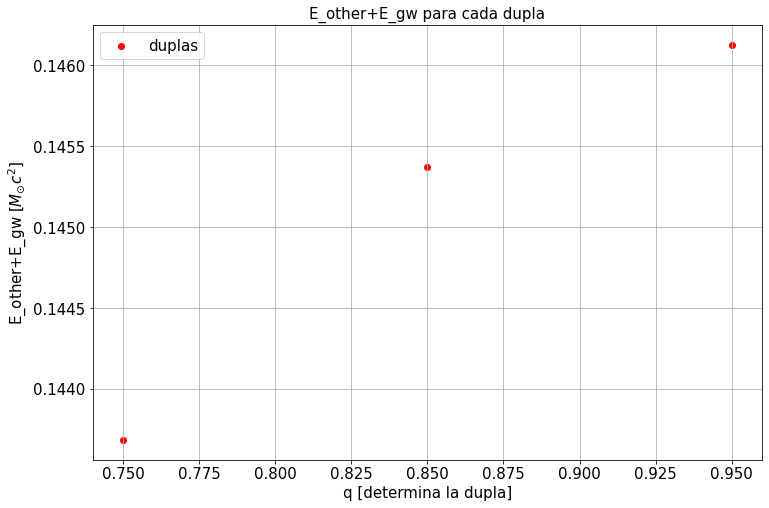

In [ ]:
qs=[0.95,0.85,0.75]

plt.figure(figsize=(12, 8))

plt.scatter(qs,E_other_3duplas, color='r', label='duplas')
plt.title('E_other+E_gw para cada dupla', fontsize=15)
plt.xlabel('q [determina la dupla]', fontsize=15)
plt.ylabel('E_other+E_gw [$M_{\odot}c^2$]', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

print('Observese que efectivamente a menor masa del disco mayor E other')

In [ ]:
# Puntos de corte en función de q (YAP)
# graficar los 3 griterios en una sola para q=1,0.8...(YAP)
# sol codigo brntq para resolver ecuas (YAP),
#(interp1d para interpolar mejor) (no deja evaluar cualquier array)(YAP)
# reproducir md vs mc (valores de mtotal definidos en universe y j=0.7)(YAP)

In [ ]:
#normalizar todo desde el inicio (Las funciones ahora si pasan a trabajar con números grandes unu sin embargo para relaciones de masa no hay lío)
#meditar porque la masa del disco no es libre?(porque depende de la isco?)
# mc vs mtotal con masa del disco (TM1 y GM1)(YAP)
#(replicar figura 2 md vs mc defino mtotal y q y mdisco defino el rango dado en las gráficas, se resuelve mc)(YAP)

In [ ]:
#Adimencionalizar como pueda y por medio del momento angular específico determinar las cotas de que debe tener la masa del disco
# en función de la ISCO. (YAP, falta adimensionalizar algunas parte, pero en lo fundamental vamos bien)
# Jugar con el balance energético (E_other) y realizar todo el análisis a GW170817
# Disminución de mdisk aumenta delta J y por lo tanto Egw
# Según lo que he aprendido ¿Qué se formó en gw170817?
# Probar con nuevas eos y mandar relacion a laura (YAP)
# fijar mchirp y variar q (YAP)
# estimar jmerger con las masas (YAP) y determinar resto de cosas (Pendiente)
# Estimar mc pero ahora para j=0 (YAP)(verificar que estos valores sean consistentes con los valores de las relaciones de las ecuaciones de estado)(YAP)
# Estimar Eother para cada Jmerger (YAP)(graficas de q vs E other (acá salen 9 puntos, suponemos que acá mdisk es cero es decir deltaj=máximo))
# Estimar lo mismo que antes pero mdisk será máximo (YAP)(deltaj=0) (Según APJ Eother está en el orden de 10^43)